In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import matplotlib.colors as colors  
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns


from sklearn import metrics 
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import  RobustScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn import linear_model

from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

import time

import collections
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("creditcard.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [6]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [7]:
col_list = list(df.columns)
print(col_list)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [8]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [9]:
df.shape

(284807, 31)

In [10]:
null_val = df.isnull().sum()
per_null = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([null_val, per_null], axis = 1, keys= ['total', 'percent'])

total  percent
Time        0      0.0
V1          0      0.0
V2          0      0.0
V3          0      0.0
V4          0      0.0
V5          0      0.0
V6          0      0.0
V7          0      0.0
V8          0      0.0
V9          0      0.0
V10         0      0.0
V11         0      0.0
V12         0      0.0
V13         0      0.0
V14         0      0.0
V15         0      0.0
V16         0      0.0
V17         0      0.0
V18         0      0.0
V19         0      0.0
V20         0      0.0
V21         0      0.0
V22         0      0.0
V23         0      0.0
V24         0      0.0
V25         0      0.0
V26         0      0.0
V27         0      0.0
V28         0      0.0
Amount      0      0.0
Class       0      0.0

In [11]:
## Observation: We can see that there is no missing value present in the dataframe.

In [12]:
#Distributions

In [13]:
classes = df['Class'].value_counts
classes

<bound method IndexOpsMixin.value_counts of 0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64>

In [14]:
classes = df['Class'].value_counts()
normal_trans = round(classes[0]/df['Class'].count()*100,2)
fraud_trans = round(classes[1]/df['Class'].count()*100,2)
print("non Fraudulent : {} %".format(normal_trans))
print("Fraudulent : {} %".format(fraud_trans))


non Fraudulent : 99.83 %
Fraudulent : 0.17 %


In [15]:
classes = df['Class'].value_counts()
normal_trans = classes[0]/df['Class'].count()*100
fraud_trans = classes[1]/df['Class'].count()*100
print("non Fraudulent : ",normal_trans, "\n","Fraudulent : ",fraud_trans)
imbalance = (fraud_trans/normal_trans)*100
print('Imbalance Percentage = ' + str(imbalance))

non Fraudulent :  99.82725143693798 
 Fraudulent :  0.1727485630620034
Imbalance Percentage = 0.173047500131896


<Figure size 2000x600 with 0 Axes>

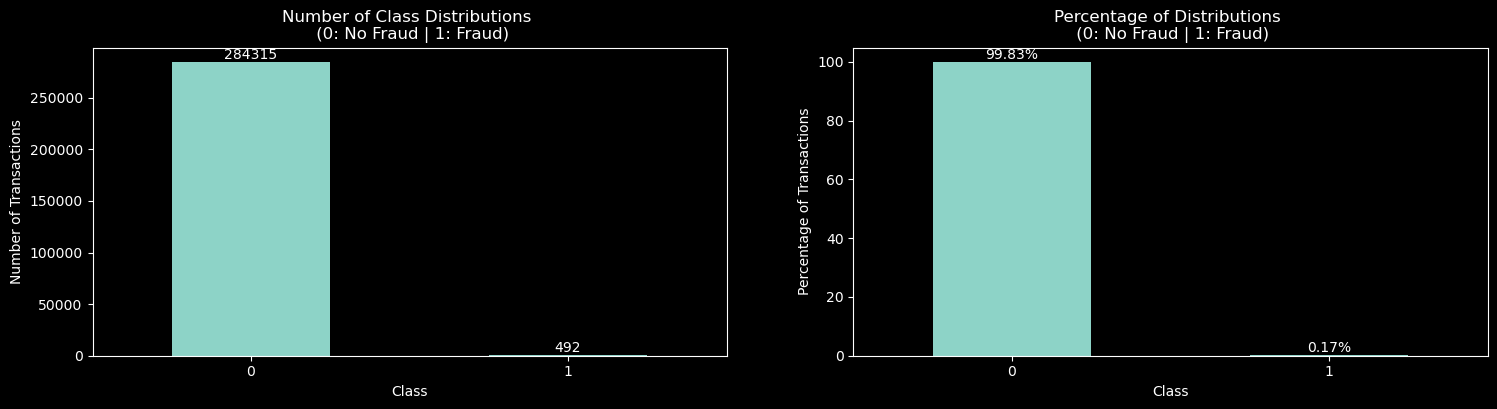

In [16]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(20,6), facecolor='m')

    fig, ax = plt.subplots(1, 2, figsize=(18,4))

    classes.plot(kind='bar', rot=0, ax=ax[0])
    ax[0].set_title('Number of Class Distributions \n (0: No Fraud | 1: Fraud)')
    ax[0].set_ylabel('Number of Transactions')
    ax[0].set_xlabel('Class')
    
    for i in ax[0].containers:
        ax[0].bar_label(i, label_type='edge', labels=i.datavalues.astype(int))

    (classes/df['Class'].count()*100).plot(kind='bar', rot=0, ax=ax[1])
    ax[1].set_title('Percentage of Distributions \n (0: No Fraud | 1: Fraud)')
    ax[1].set_ylabel('Percentage of Transactions')
    ax[1].set_xlabel('Class')
    
    for i in ax[1].containers:
        ax[1].bar_label(i, label_type='edge', labels=[f'{val:.2f}%' for val in i.datavalues])

    plt.show()

In [17]:
## Observation

#The dataset has very high class imbalance. Only 492 records are there among 284807 records which are labeld as fradudulent transaction.
#The percentage of distribution for majority class is 99.83% and minority class is 0.17%

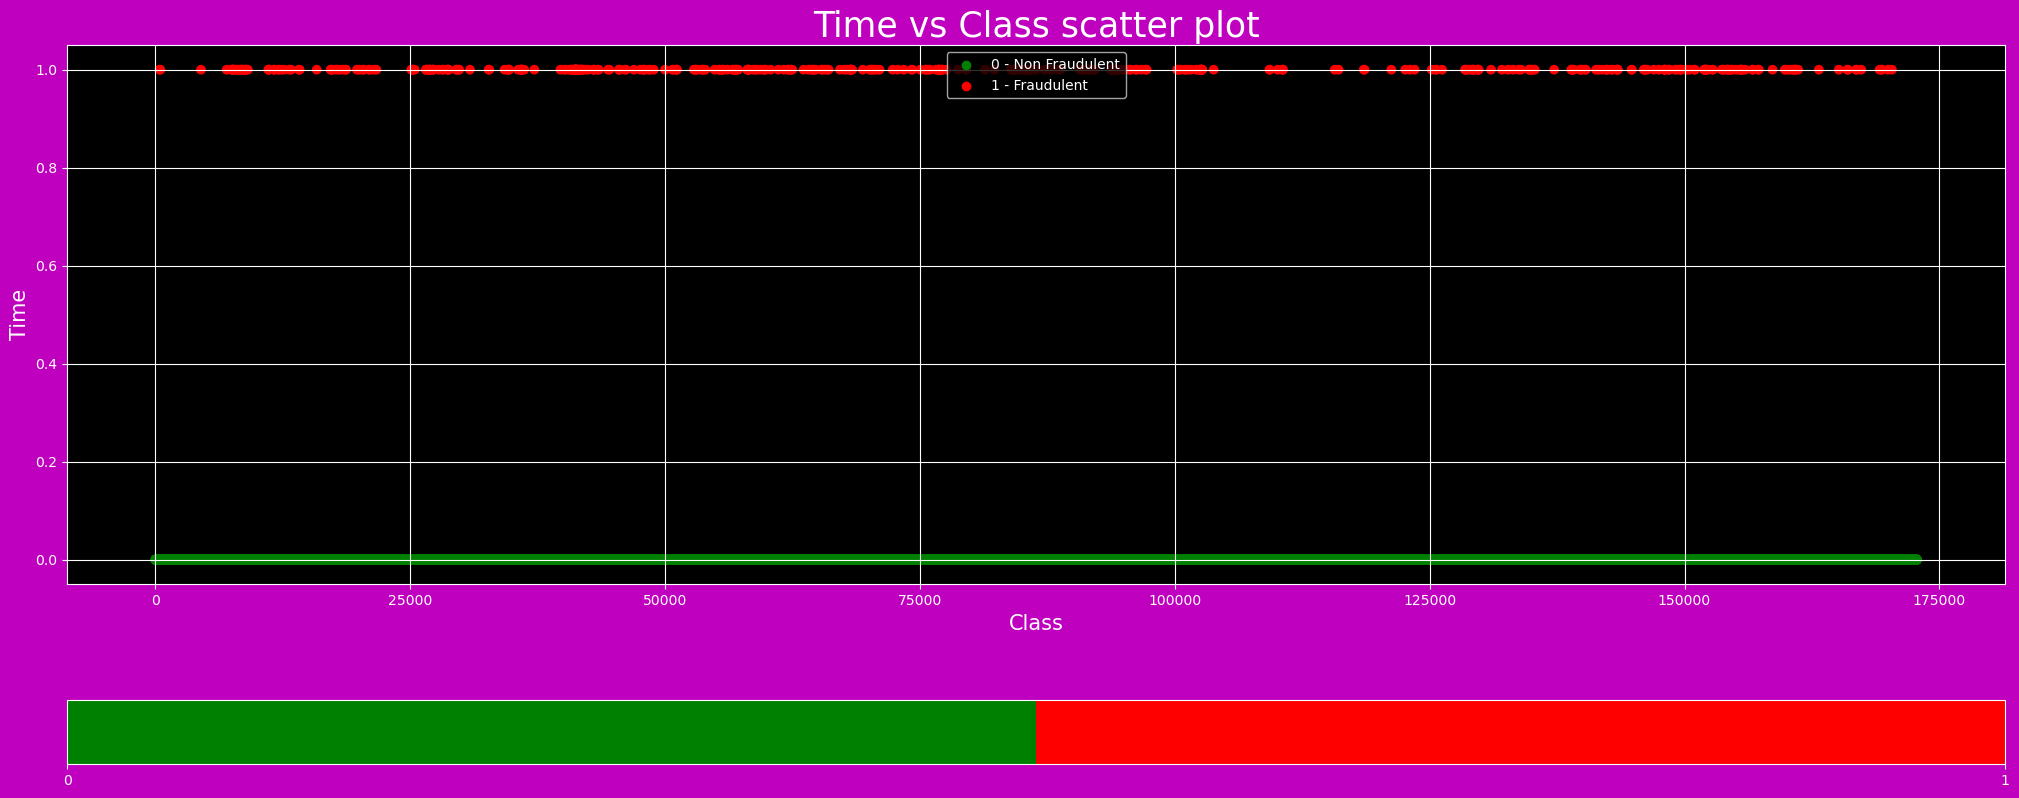

In [18]:
cmap = colors.ListedColormap(['green', 'red'])

with plt.style.context('dark_background'):
    plt.figure(figsize=(25,10), facecolor='m')

    # Use the cmap parameter to color-code the points
    plt.scatter(x=df["Time"], y=df["Class"], c=df["Class"], cmap=cmap)

    # Set the limits of the colorbar
    plt.colorbar(ticks=[0, 1], orientation='horizontal', aspect=30, pad = 0.15)

    plt.title("Time vs Class scatter plot", fontsize=25)
    plt.xlabel("Class", fontsize=15)
    plt.ylabel("Time", fontsize=15)
    plt.grid()

    # Create a legend with the two class labels
    legend_elements = [plt.scatter([],[], marker='o', color='green', label='0 - Non Fraudulent'),
                       plt.scatter([],[], marker='o', color='red', label='1 - Fraudulent')]
    plt.legend(handles=legend_elements, loc='upper center')

    plt.show()


In [19]:
##Observation

#There is not much insight can be drawn from the distribution of the fraudulent transaction based on time as fraudulent/non-fraudulent both transaction are distributed over time.

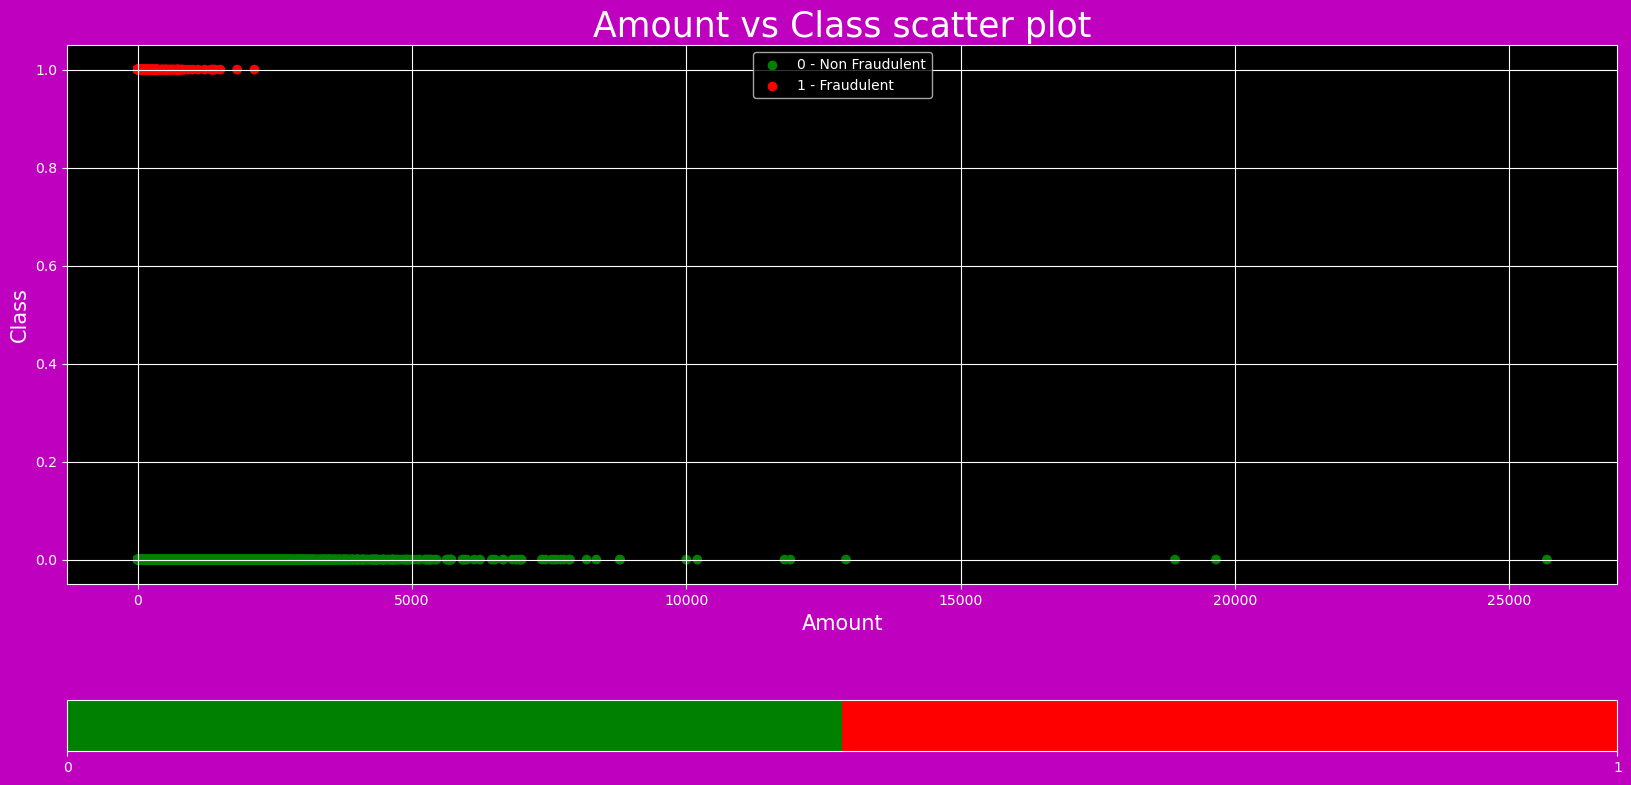

In [20]:
cmap = colors.ListedColormap(['green', 'red'])

with plt.style.context('dark_background'):
    plt.figure(figsize=(20,10), facecolor='m')

    # Use the cmap parameter to color-code the points
    plt.scatter(x=df["Amount"], y=df["Class"], c=df["Class"], cmap=cmap)

    # Set the limits of the colorbar
    plt.colorbar(ticks=[0, 1], orientation='horizontal', aspect=30, pad = 0.15)

    plt.title("Amount vs Class scatter plot", fontsize=25)
    plt.ylabel("Class", fontsize=15)
    plt.xlabel("Amount", fontsize=15)
    plt.grid()

    # Create a legend with the two class labels
    legend_elements = [plt.scatter([],[], marker='o', color='green', label='0 - Non Fraudulent'),
                       plt.scatter([],[], marker='o', color='red', label='1 - Fraudulent')]
    plt.legend(handles=legend_elements, loc='upper center')

    plt.show()

In [21]:
## Observation

#Clearly low amount transactions are more likely to be fraudulent than high amount transaction.

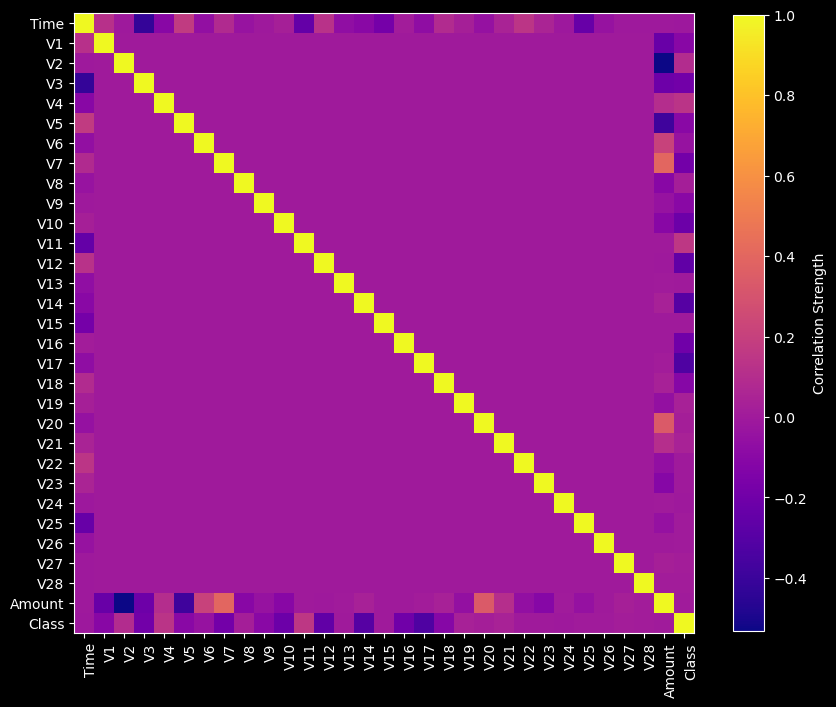

In [22]:
def corrplot(data):
    with plt.style.context('dark_background'):
      corr = data.corr()
      fig, ax = plt.subplots(figsize=(10, 10))
      im = ax.imshow(corr, cmap='plasma')
      ax.set_xticks(np.arange(len(data.columns)))
      ax.set_yticks(np.arange(len(data.columns)))
      ax.set_xticklabels(data.columns, rotation=90)
      ax.set_yticklabels(data.columns)
      plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")
      plt.colorbar(im, aspect=20, shrink = 0.80 , pad = 0.05, label='Correlation Strength')
      plt.show()

# plotting the correlation matrix using the defined function
corrplot(df)


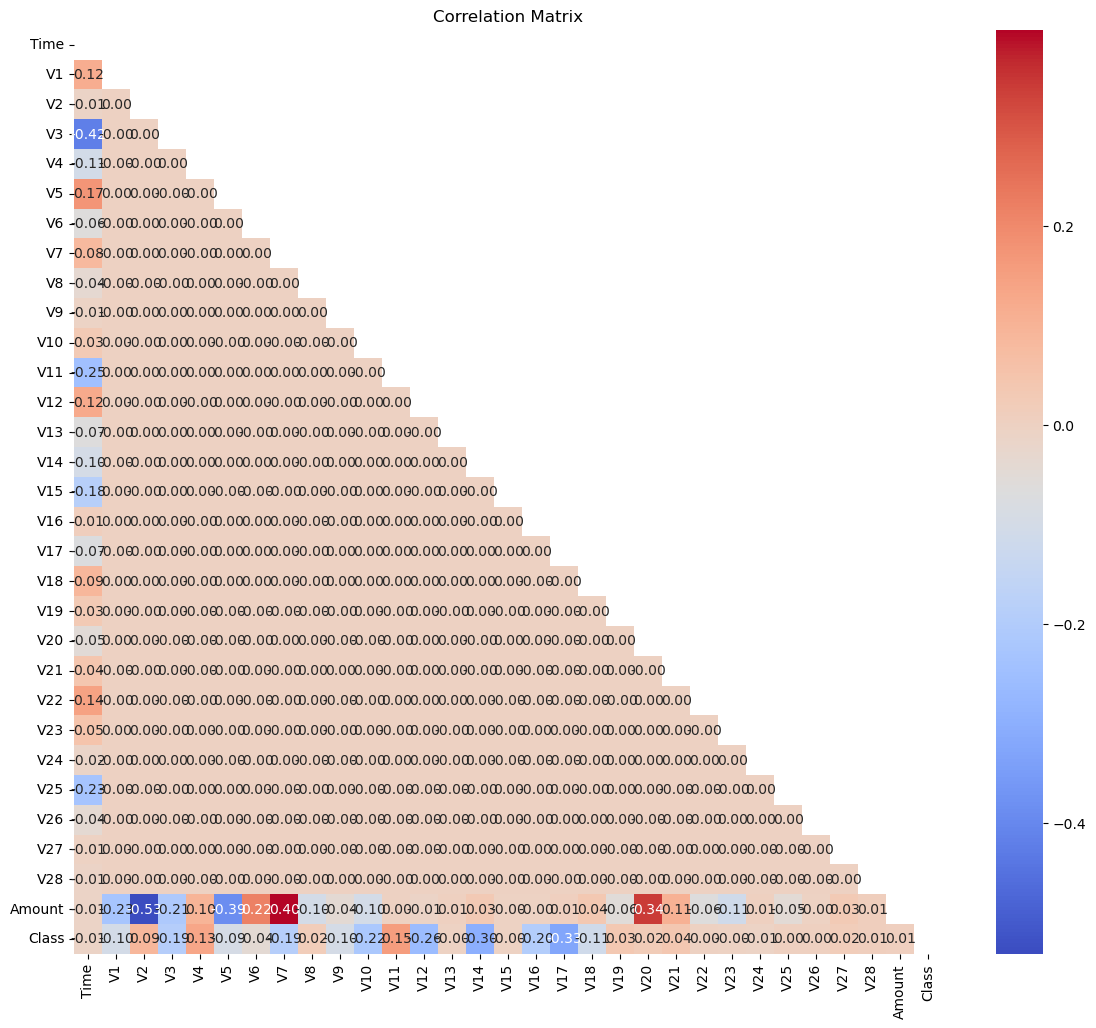

In [23]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(14, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", mask = mask)
plt.title('Correlation Matrix')
plt.show()

<Figure size 640x480 with 0 Axes>

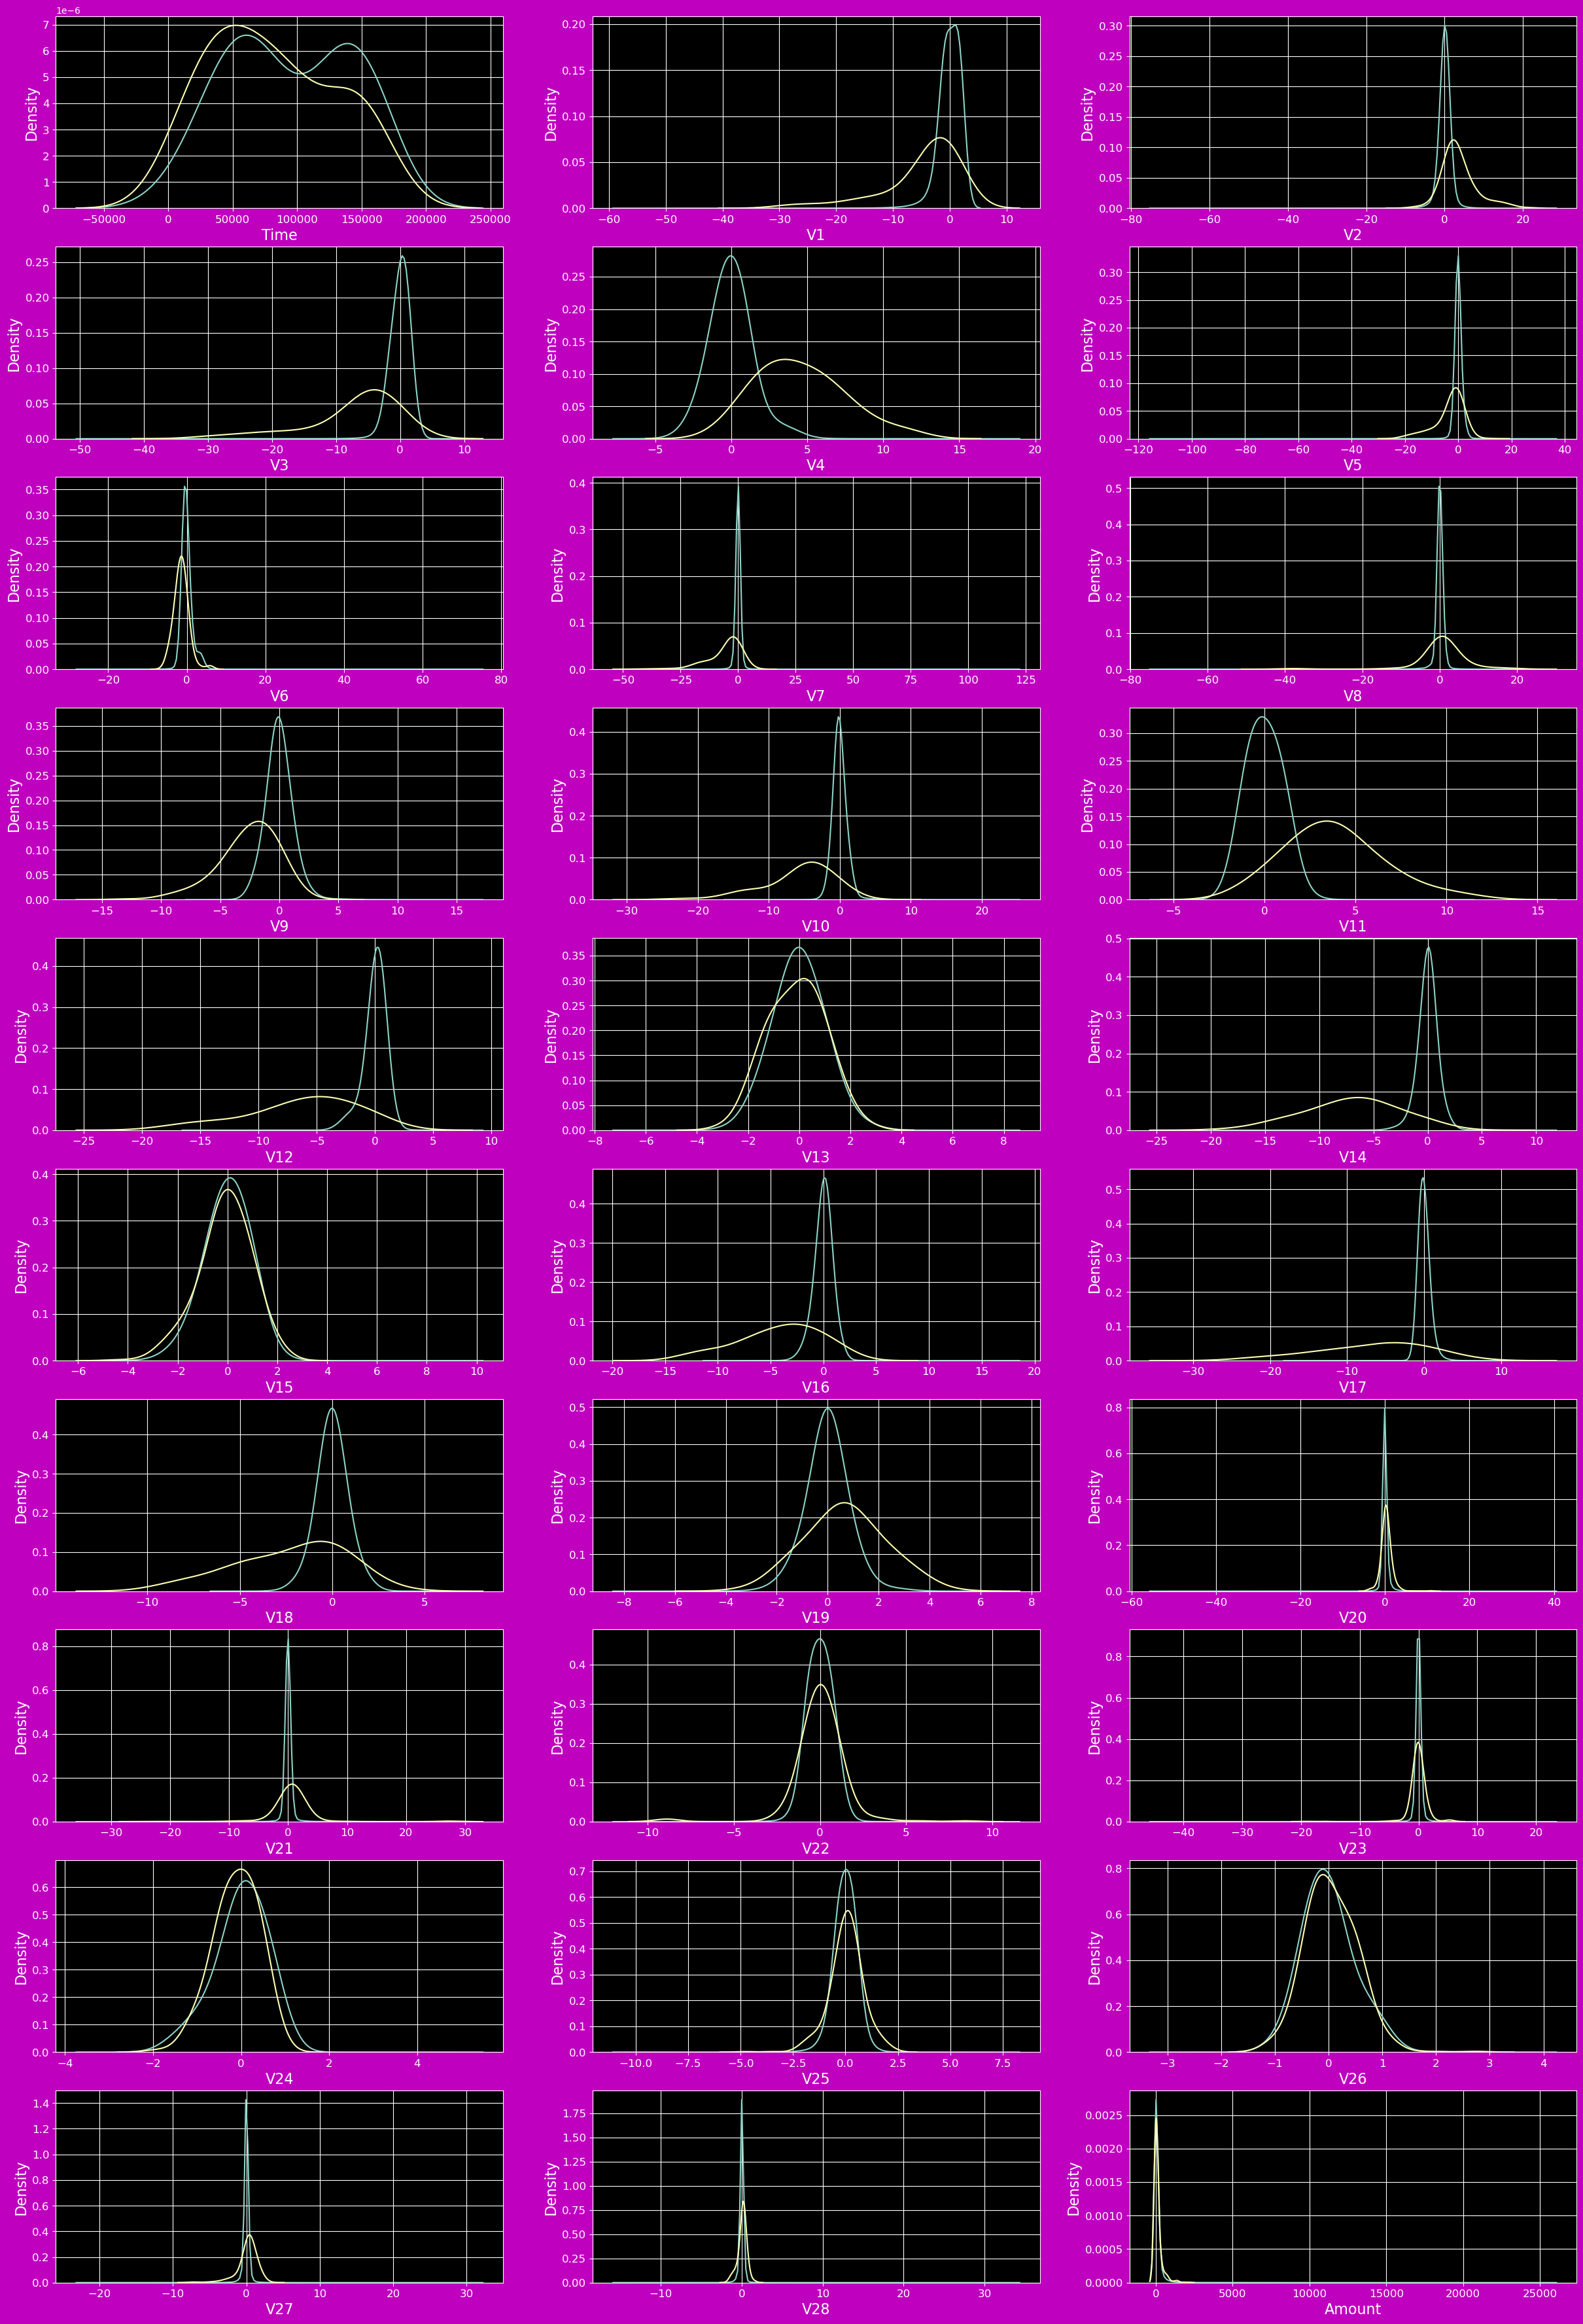

In [24]:
var = list(df.columns.values)
# dropping Class columns from the list
var.remove("Class")

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

with plt.style.context('dark_background'):

    plt.figure()
    fig, ax = plt.subplots(10,3,figsize=(30,45), facecolor='m');

    for feature in var:
        i += 1
        plt.subplot(10,3,i)
        sns.kdeplot(t0[feature], bw=0.5,label="0")
        sns.kdeplot(t1[feature], bw=0.5,label="1")
        plt.xlabel(feature, fontsize=16)
        plt.ylabel("Density", fontsize=16)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
        plt.grid()
    plt.show()

In [25]:
#We can see most of the features distributions are overlapping for both the fraud and non-fraud transactions.

In [26]:
#it suggests that detecting fraud based solely on those features may be challenging,
#and additional analysis, feature engineering, or modeling approaches may be necessary to improve detection performance.

In [27]:
#removing unimportant variables

In [28]:
df = df.drop("Time", axis = 1)
df.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4 -0.206010  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 30 columns]

In [29]:
#Splitting the data into train & test data
y= df["Class"]
X = df.drop("Class", axis = 1)
y.shape,X.shape

((284807,), (284807, 29))

In [30]:
# Spltting the into 80:20 train test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 29), (56962, 29), (227845,), (56962,))

In [31]:
# Checking the split of the class label
print(" Fraudulent Count for Full data : ",np.sum(y))
print("Fraudulent Count for Train data : ",np.sum(y_train))
print(" Fraudulent Count for Test data : ",np.sum(y_test))

 Fraudulent Count for Full data :  492
Fraudulent Count for Train data :  394
 Fraudulent Count for Test data :  98


In [32]:
# Save the testing set for evaluation
X_test_saved = X_test.copy()
y_test_saved = y_test.copy()
print("Saved X_test & y_test")

Saved X_test & y_test


In [33]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field
scaler = RobustScaler()

# Scaling the train data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Transforming the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

In [34]:
X_train.head()

V1        V2        V3        V4        V5        V6        V7  \
265518  1.946747 -0.752526 -1.355130 -0.661630  1.502822  4.024933 -1.479661   
180305  2.035149 -0.048880 -3.058693  0.247945  2.943487  3.298697 -0.002192   
42664  -0.991920  0.603193  0.711976 -0.992425 -0.825838  1.956261 -2.212603   
198723  2.285718 -1.500239 -0.747565 -1.668119 -1.394143 -0.350339 -1.427984   
82325  -0.448747 -1.011440  0.115903 -3.454854  0.715771 -0.147490  0.504347   

              V8        V9       V10  ...       V20       V21       V22  \
265518  1.139880  1.406819 -0.157403  ... -0.134435  0.076197  0.297537   
180305  0.674782  0.045826  0.284864  ... -0.227279  0.038628  0.228197   
42664  -5.037523  0.000772 -2.009561  ...  1.280856 -2.798352  0.109526   
198723  0.010010 -1.118447  1.756121  ... -0.490642 -0.139670  0.077013   
82325  -0.113817 -0.044782 -0.558955  ... -0.275297 -0.243245 -0.173298   

             V23       V24       V25       V26       V27       V28    Amount  
265518  0.307915  0.690980 -0.350316 -0.388907  0.077641 -0.032248 -0.204315  
180305  0.035542  0.707090  0.512885 -0.471198  0.002520 -0.069002 -0.264579  
42664  -0.436530 -0.932803  0.826684  0.913773  0.038049  0.185340  2.130828  
198723  0.208310 -0.538236 -0.278032 -0.162068  0.018045 -0.063005 -0.221294  
82325  -0.006692 -1.362383 -0.292234 -0.144622 -0.032580 -0.064194  0.892136  

[5 rows x 29 columns]

In [35]:
X_test.head()

V1        V2        V3        V4        V5        V6        V7  \
263020 -0.674466  1.408105 -1.110622 -1.328366  1.388996 -1.308439  1.885879   
11378  -2.829816 -2.765149  2.537793 -1.074580  2.842559 -2.153536 -1.795519   
147283 -3.576495  2.318422  1.306985  3.263665  1.127818  2.865246  1.444125   
219439  2.060386 -0.015382 -1.082544  0.386019 -0.024331 -1.074935  0.207792   
36939   1.209965  1.384303 -1.343531  1.763636  0.662351 -2.113384  0.854039   

              V8        V9       V10  ...       V20       V21       V22  \
263020 -0.614233  0.311652  0.650757  ...  0.394322  0.080084  0.810034   
11378  -0.250020  3.073504 -1.000418  ... -0.515765 -0.295555  0.109305   
147283 -0.718922  1.874046  7.398491  ...  2.034786 -1.060151  0.016867   
219439 -0.338140  0.455091  0.047859  ... -0.192024 -0.281684 -0.639426   
36939  -0.475963 -0.629658 -1.579654  ...  0.009083 -0.164015 -0.328294   

             V23       V24       V25       V26       V27       V28    Amount  
263020 -0.224327  0.707899 -0.135837  0.045102  0.533837  0.291319  0.013918  
11378  -0.813272  0.042996 -0.027660 -0.910247  0.110802 -0.511938 -0.141267  
147283 -0.132058 -1.483996 -0.296011  0.062823  0.552411  0.509764  0.752540  
219439  0.331818 -0.067584 -0.283675  0.203529 -0.063621 -0.060077 -0.292415  
36939  -0.154631  0.619449  0.818998 -0.330525  0.046884  0.104527 -0.285317  

[5 rows x 29 columns]

In [36]:
#Checking Skewness¶

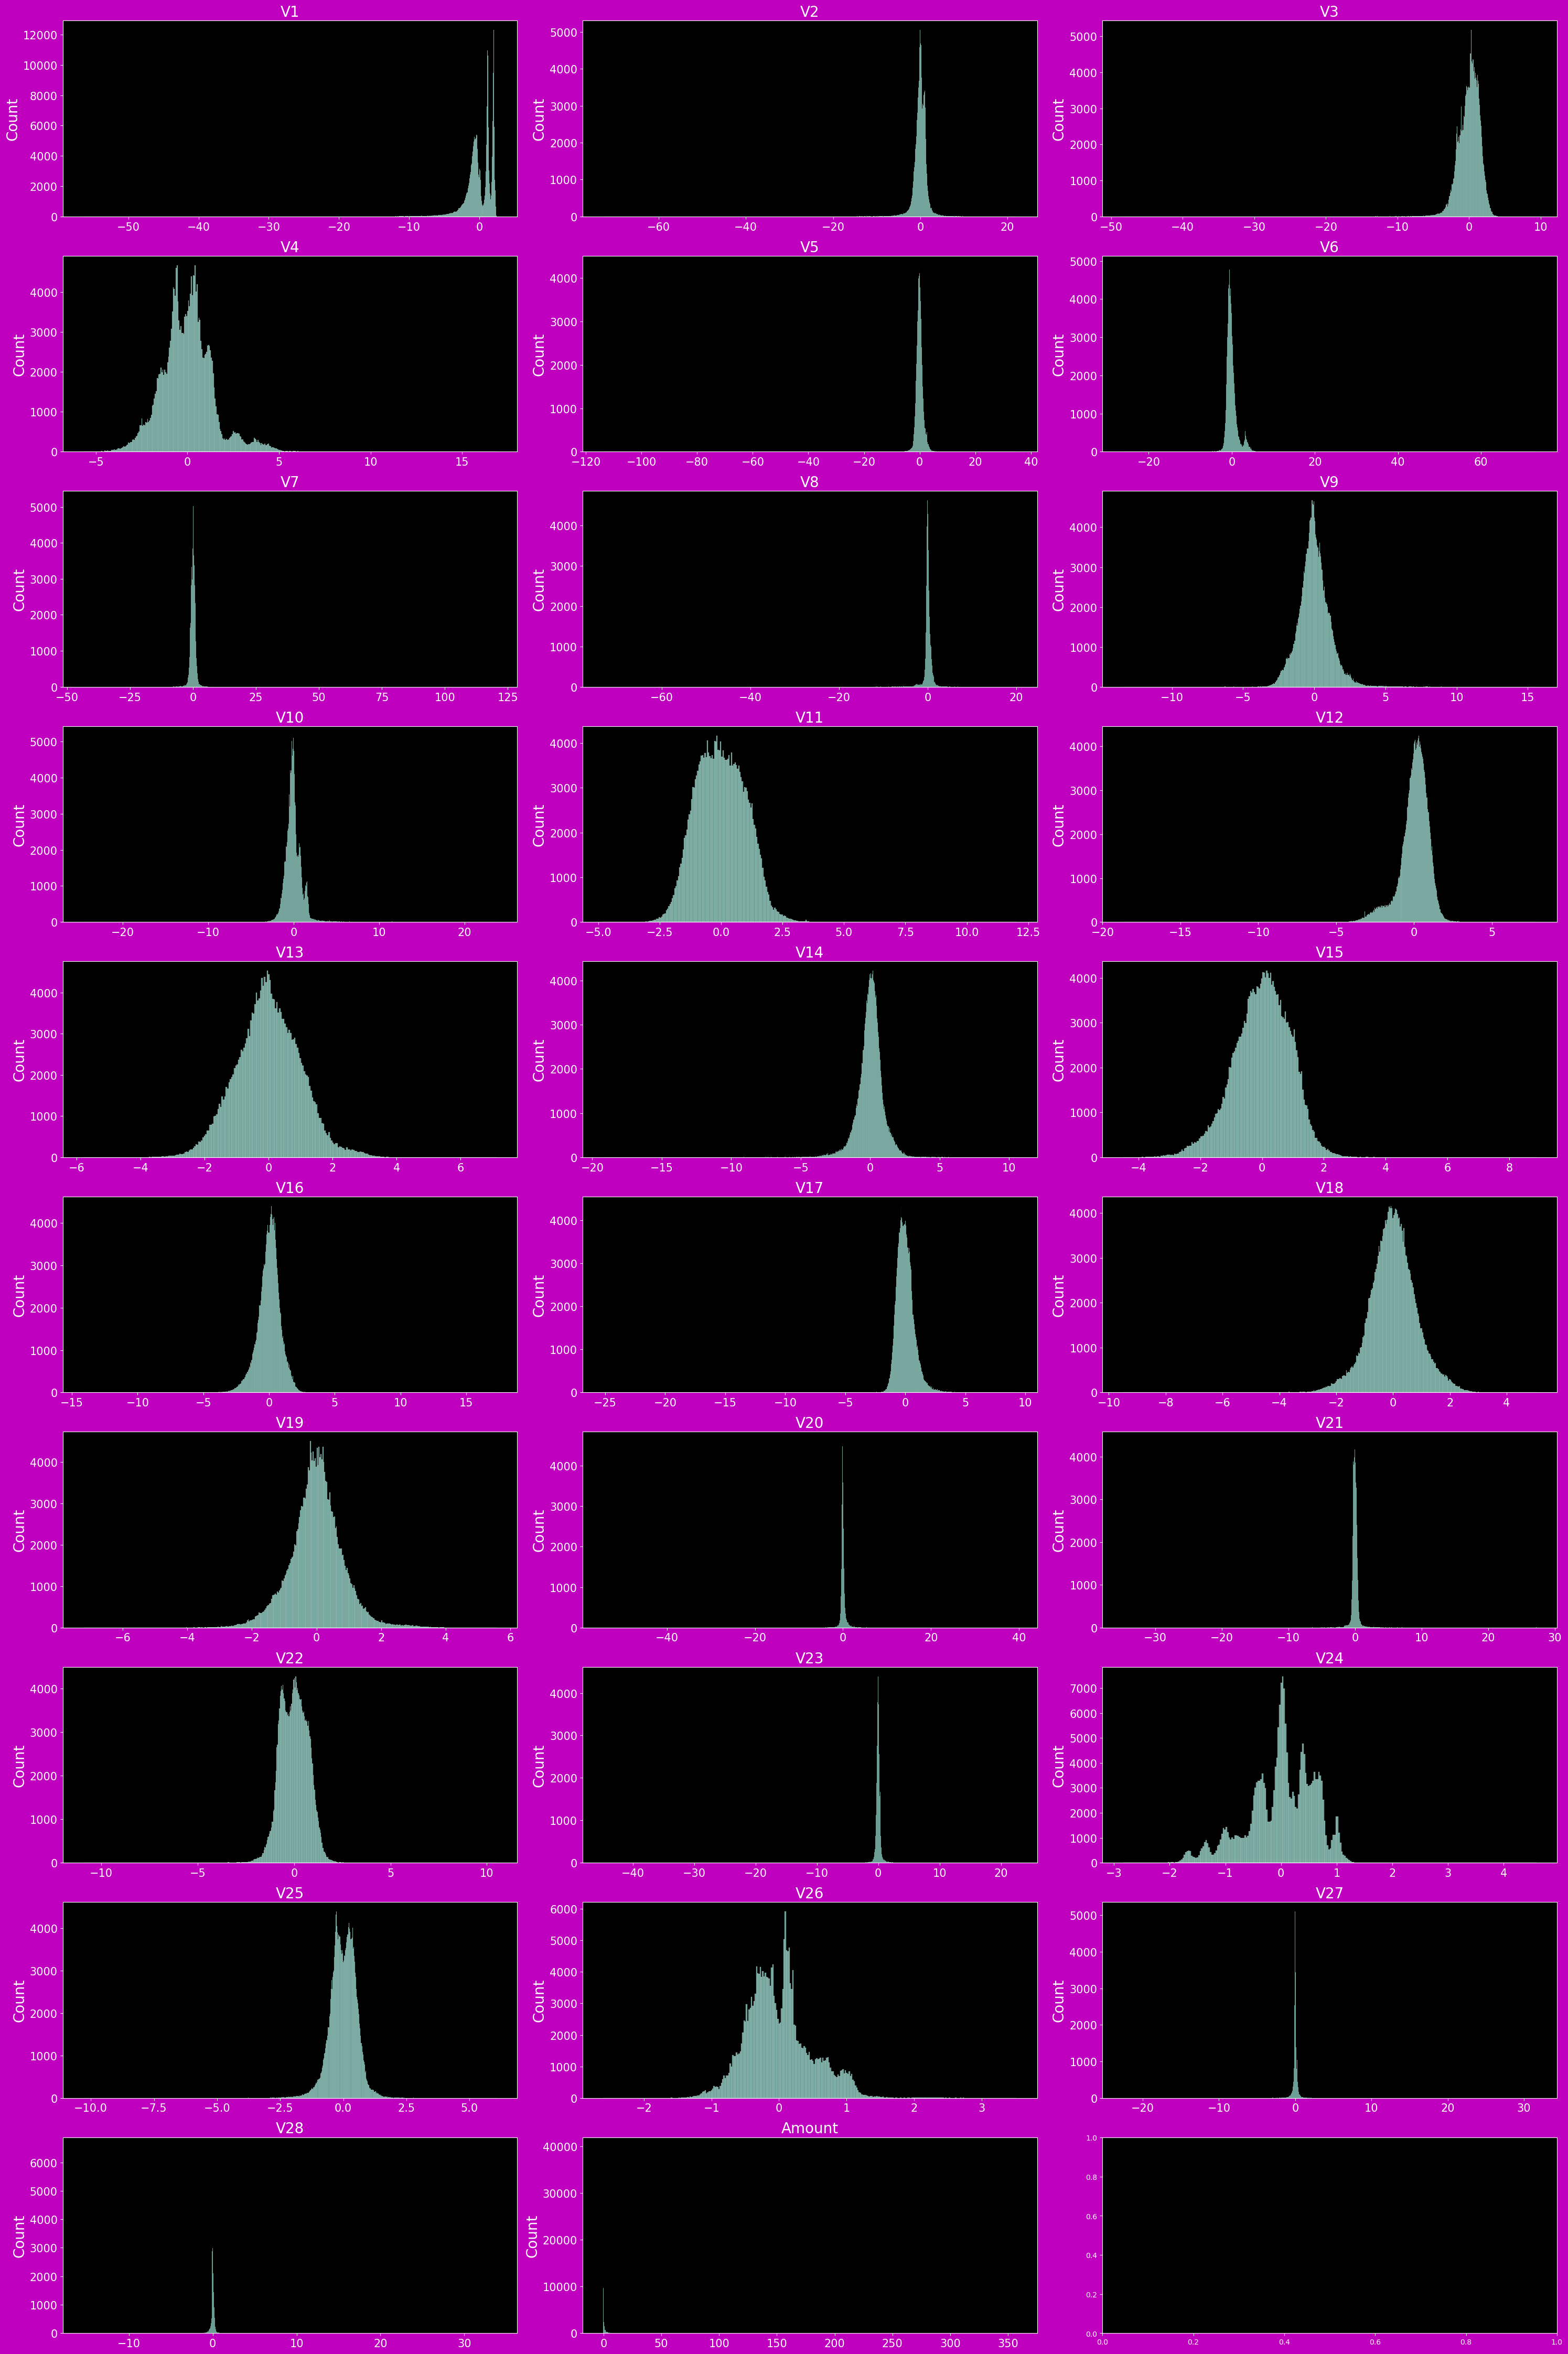

In [37]:

var = X_train.columns

with plt.style.context('dark_background'):
    fig, axes = plt.subplots(10, 3, figsize=(30, 45), facecolor='m')
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i < len(var):
            sns.histplot(X_train[var[i]], ax=ax)
            ax.set_title(var[i], fontsize=20) 
            ax.set_ylabel("Count", fontsize=20)  # set ylabel of the subplot
            ax.tick_params(axis='both', labelsize=15) 
            ax.set_xlabel('') # set empty string as x label of the subplot

    plt.tight_layout()
    plt.show()

Lot of features are highly skewed. So we will check the skewness using skew() and if the skewness is beyond -1 to 1, then we will use power transform to transform the data.

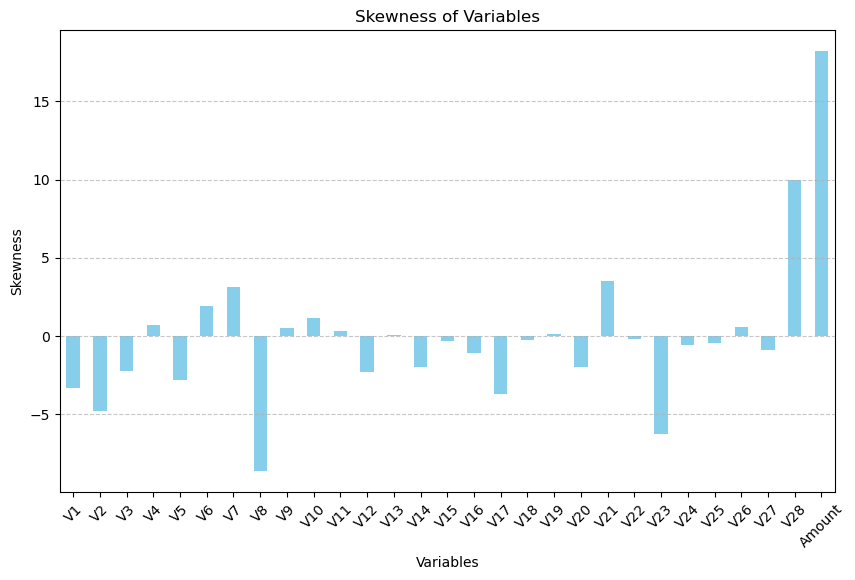

In [38]:
skewness = X_train.skew()

# Plot skewness
plt.figure(figsize=(10, 6))
skewness.plot(kind='bar', color='skyblue')
plt.title('Skewness of Variables')
plt.xlabel('Variables')
plt.ylabel('Skewness')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [39]:
var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp

Skewness
Features           
V1        -3.306334
V2        -4.779484
V3        -2.247962
V4         0.687574
V5        -2.786851
V6         1.937381
V7         3.152665
V8        -8.639485
V9         0.541869
V10        1.132688
V11        0.354102
V12       -2.286654
V13        0.064819
V14       -1.969112
V15       -0.308419
V16       -1.077909
V17       -3.733377
V18       -0.254948
V19        0.106133
V20       -1.960492
V21        3.490183
V22       -0.219171
V23       -6.258558
V24       -0.549854
V25       -0.436292
V26        0.574980
V27       -0.890209
V28        9.978409
Amount    18.193943

There is skewness present in the distribution of the above features:

Power Transformer package present in the preprocessing library provided by sklearn is used to make the distribution more gaussian

In [40]:
# Filtering the features which has skewness less than -1 and greater than +1
"""
This is a good way to identify which features may need to be transformed to improve model performance.
"""
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
skewed.tolist()

['V1',
 'V2',
 'V3',
 'V5',
 'V6',
 'V7',
 'V8',
 'V10',
 'V12',
 'V14',
 'V16',
 'V17',
 'V20',
 'V21',
 'V23',
 'V28',
 'Amount']

Treating Skewness¶
If there is skewness present in the distribution use:
Power Transformer package present in the preprocessing library provided by sklearn to make distribution more gaussian

In [41]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt= preprocessing.PowerTransformer(method='yeo-johnson', copy=True)  # creates an instance of the PowerTransformer class.
pt.fit(X_train)

X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)

y_train_pt = y_train
y_test_pt = y_test

In [42]:
print(X_train_pt.shape)
print(y_train_pt.shape)

(227845, 29)
(227845,)


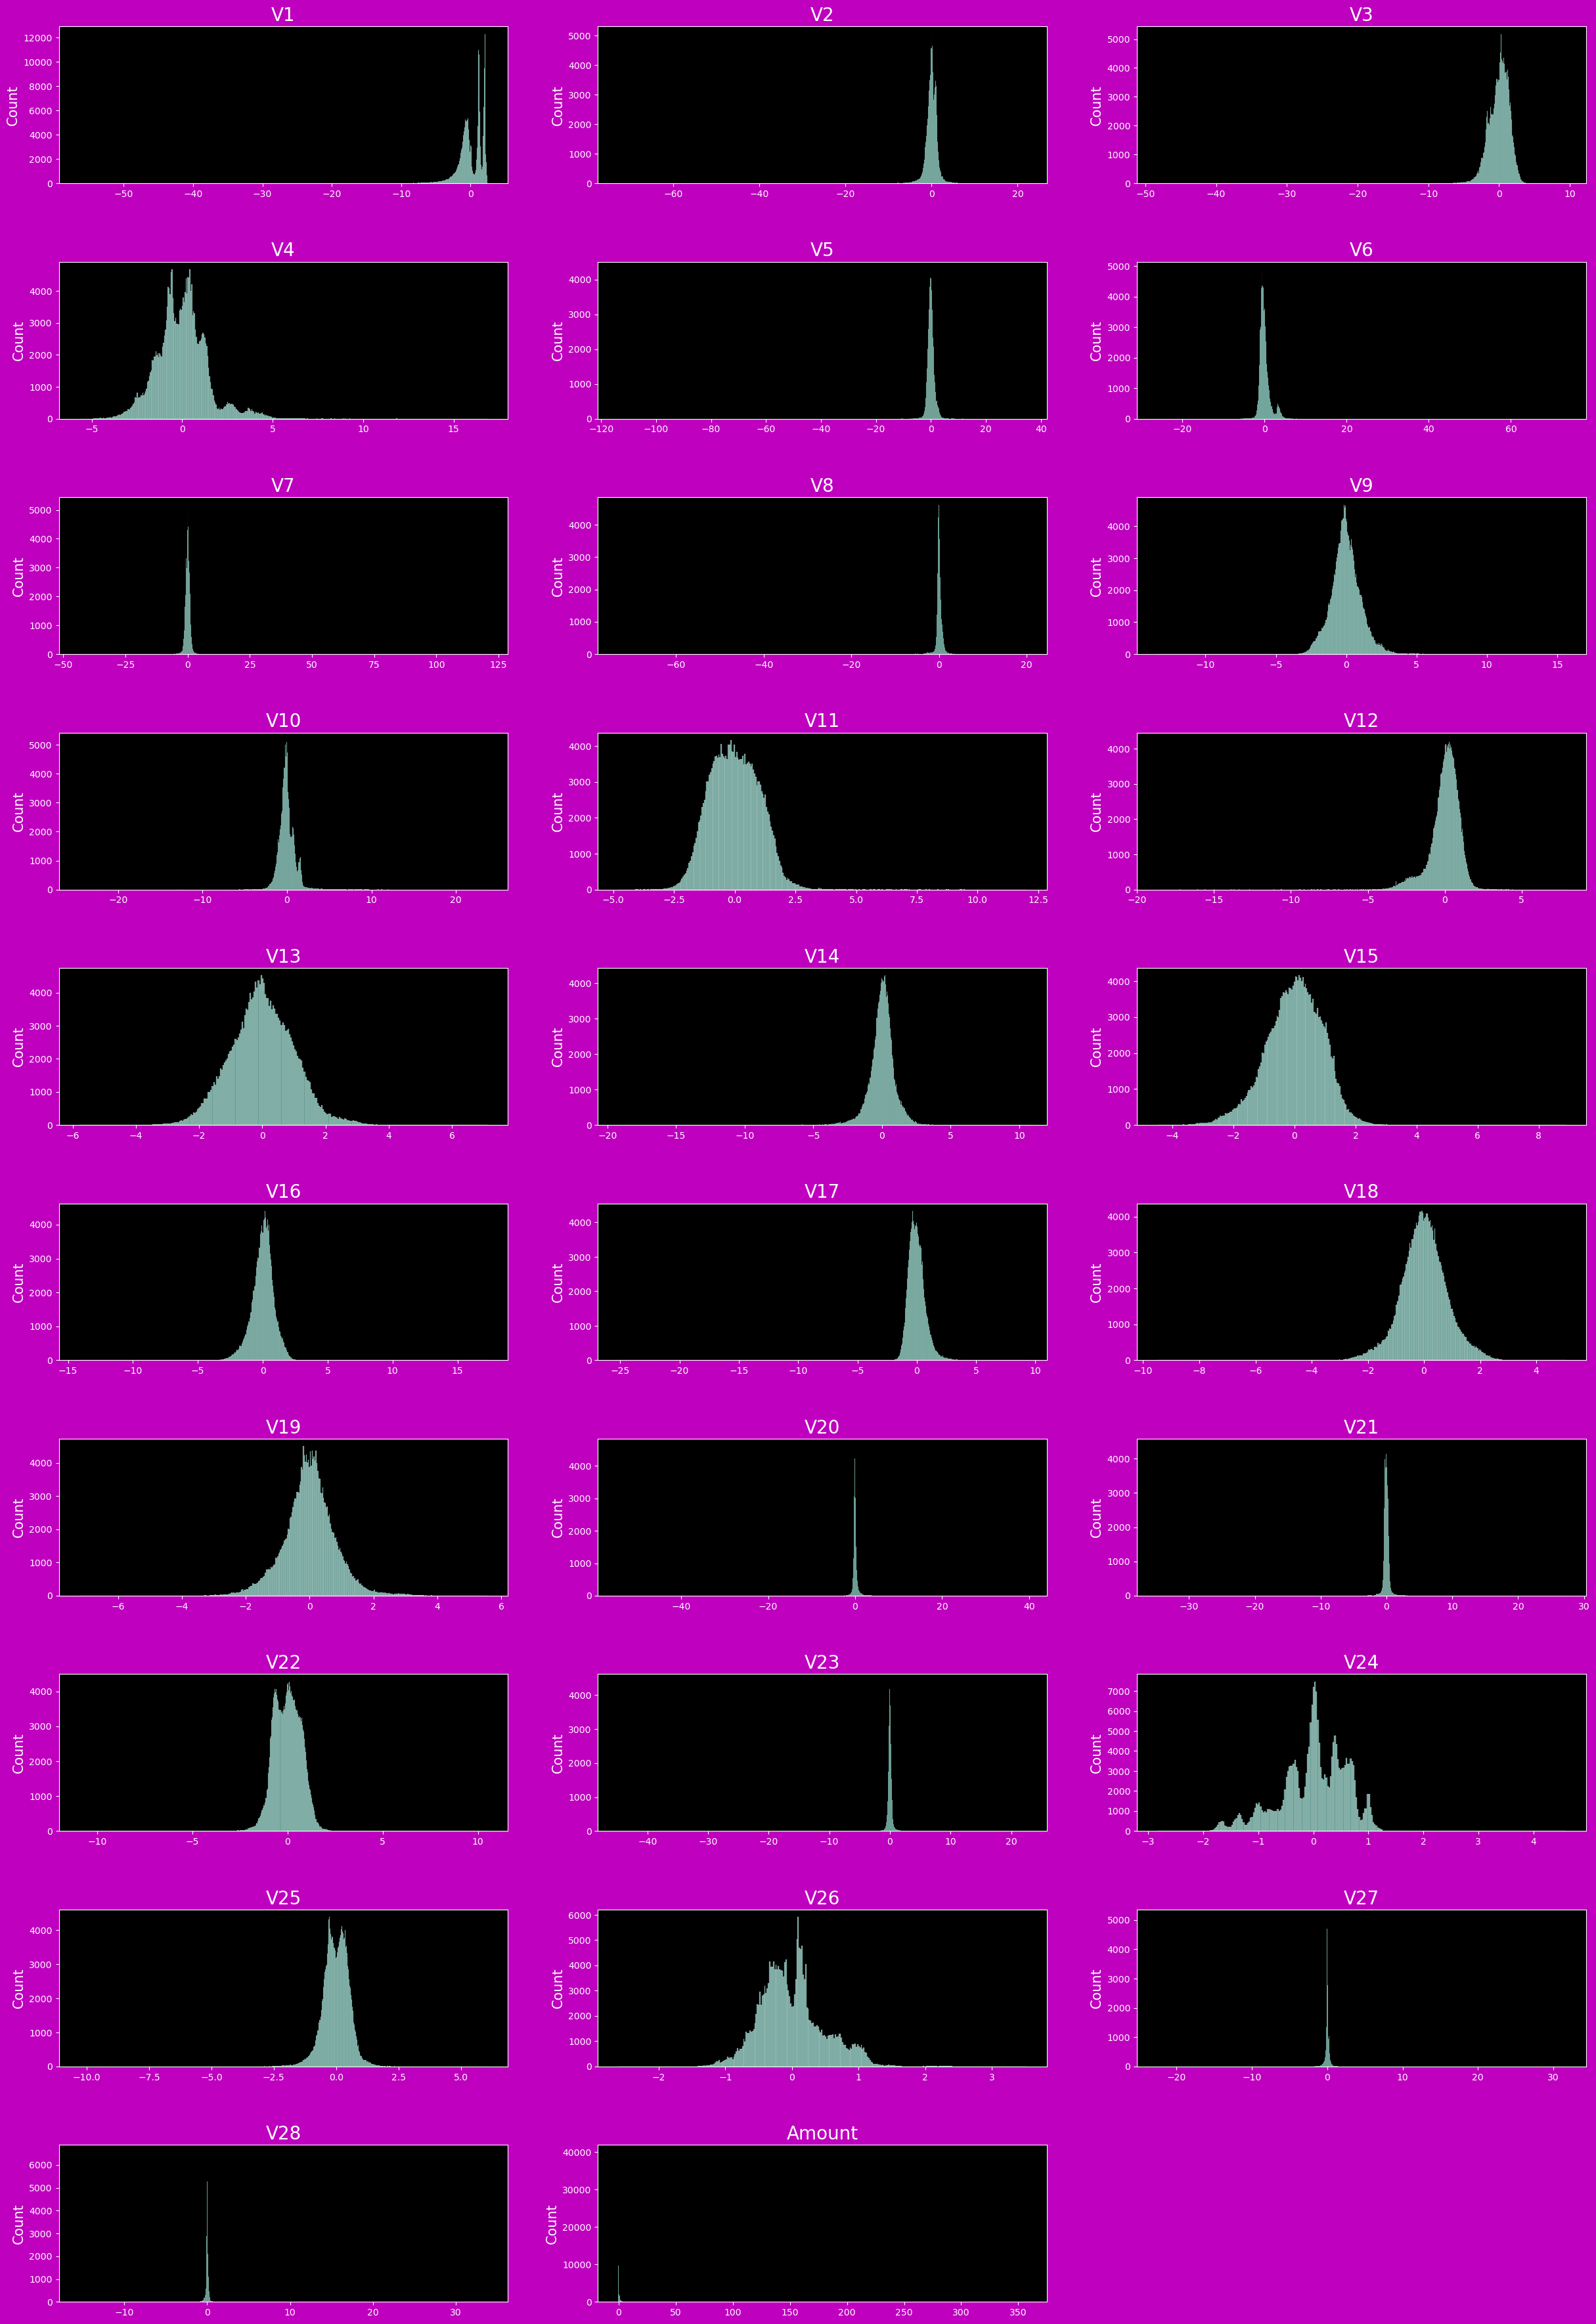

In [43]:
var = X_train.columns
with plt.style.context('dark_background'):
    fig = plt.figure(figsize=(30,45), facecolor='m') # create figure instance
    # fig.suptitle('Histograms of Variables', fontsize=30) # set main title of the figure
    i=0
    for col in var:
        i += 1
        ax = fig.add_subplot(10,3, i) # create subplot
        sns.histplot(X_train[col], ax=ax) # plot histogram
        ax.set_title(col, fontsize=20) # set title of the subplot
        ax.set_ylabel('Count', fontsize=15) # set ylabel of the subplot
        ax.set_xlabel('') # set empty string as x label of the subplot
    fig.subplots_adjust(hspace=0.5, wspace=0.2) # add horizontal and vertical space between subplots
    plt.show()

In [44]:
var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp

Skewness
Features           
V1        -3.306334
V2        -4.779484
V3        -2.247962
V4         0.687574
V5        -2.786851
V6         1.937381
V7         3.152665
V8        -8.639485
V9         0.541869
V10        1.132688
V11        0.354102
V12       -2.286654
V13        0.064819
V14       -1.969112
V15       -0.308419
V16       -1.077909
V17       -3.733377
V18       -0.254948
V19        0.106133
V20       -1.960492
V21        3.490183
V22       -0.219171
V23       -6.258558
V24       -0.549854
V25       -0.436292
V26        0.574980
V27       -0.890209
V28        9.978409
Amount    18.193943

There is skewness present in the distribution of the above features:

Power Transformer package present in the preprocessing library provided by sklearn is used to make the distribution more gaussian

In [45]:
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
skewed.tolist()

['V1',
 'V2',
 'V3',
 'V5',
 'V6',
 'V7',
 'V8',
 'V10',
 'V12',
 'V14',
 'V16',
 'V17',
 'V20',
 'V21',
 'V23',
 'V28',
 'Amount']

Treating Skewness

In [46]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt= preprocessing.PowerTransformer(method='yeo-johnson', copy=True)  # creates an instance of the PowerTransformer class.
pt.fit(X_train)

X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)

y_train_pt = y_train
y_test_pt = y_test

In [47]:
print(X_train_pt.shape)
print(y_train_pt.shape)

(227845, 29)
(227845,)


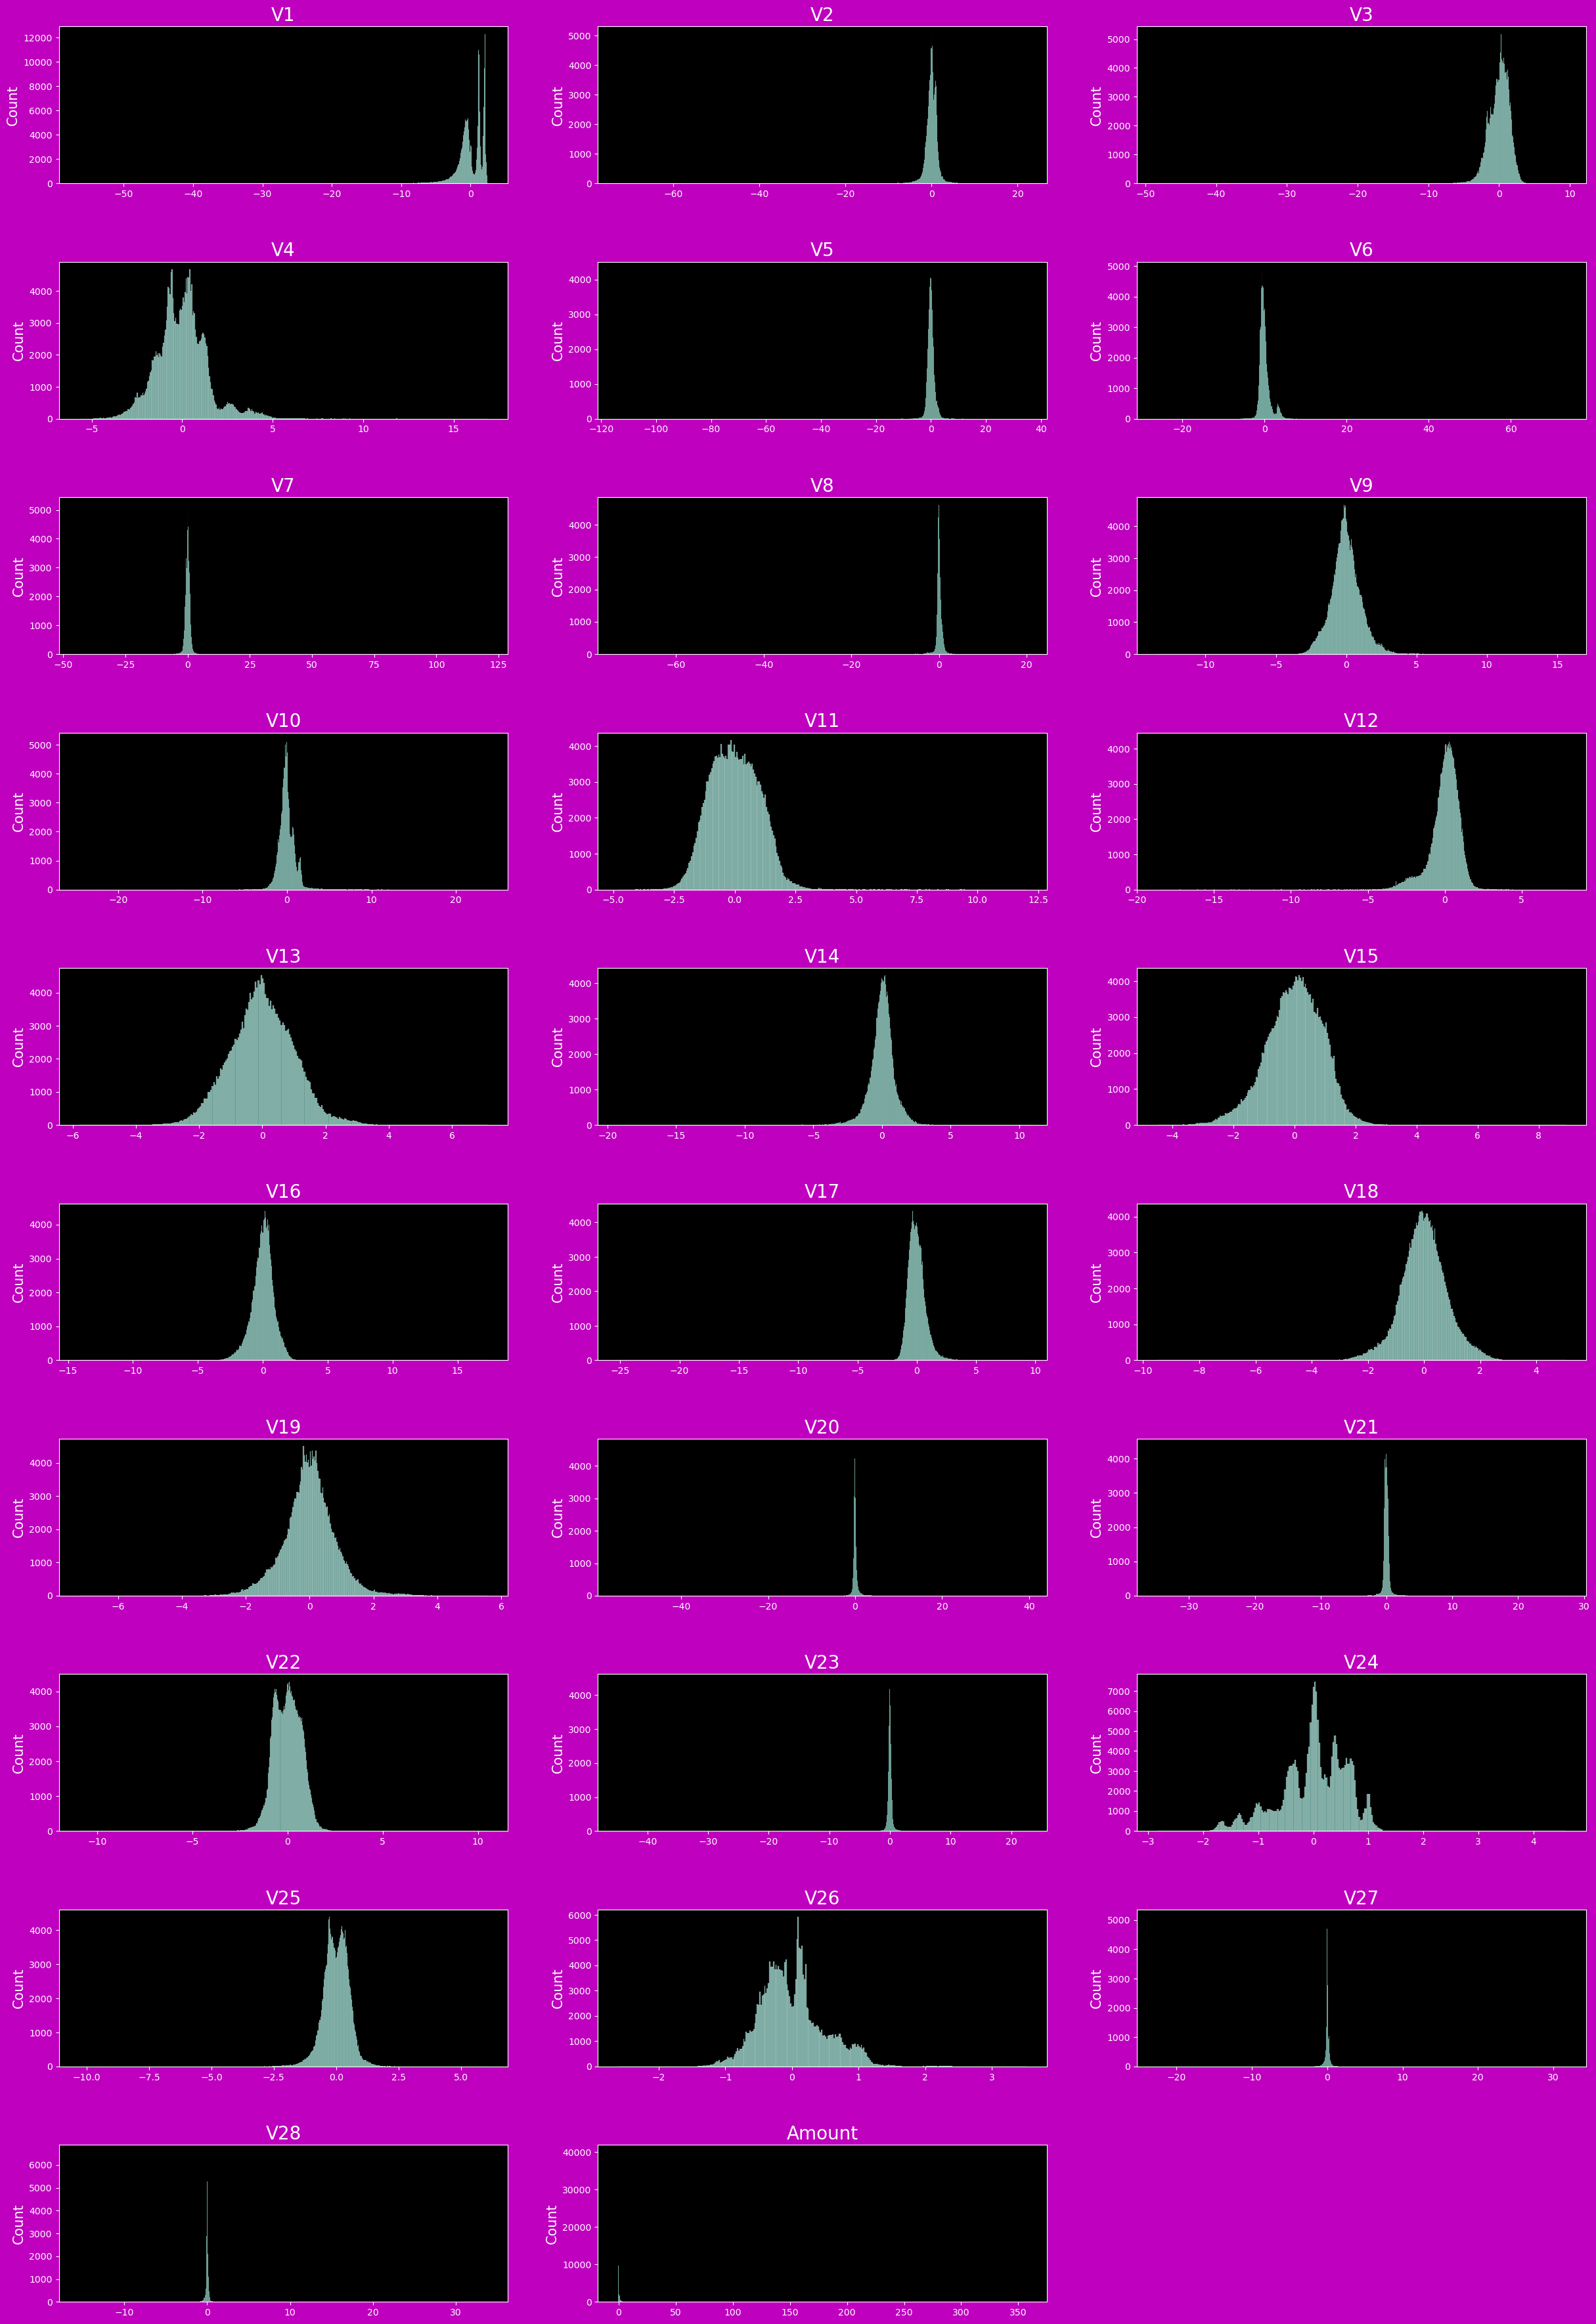

In [48]:
var = X_train.columns
with plt.style.context('dark_background'):
    fig = plt.figure(figsize=(30,45), facecolor='m') # create figure instance
    # fig.suptitle('Histograms of Variables', fontsize=30) # set main title of the figure
    i=0
    for col in var:
        i += 1
        ax = fig.add_subplot(10,3, i) # create subplot
        sns.histplot(X_train[col], ax=ax) # plot histogram
        ax.set_title(col, fontsize=20) # set title of the subplot
        ax.set_ylabel('Count', fontsize=15) # set ylabel of the subplot
        ax.set_xlabel('') # set empty string as x label of the subplot
    fig.subplots_adjust(hspace=0.5, wspace=0.2) # add horizontal and vertical space between subplots
    plt.show()

Model Building with imbalanced data¶

We are going to build models on below mentioned algorithms and we will compare for the best model. We are not building models on SVM, and KNN as these algorithms are computationaly expensive and need more computational resources specially for the SVM and KNN. Skipped models' process is computationally very expensive when we have very large data set. We do not have these resource available so we are skipping these models. Working with below models:

Logistic Regression
Decision Tree
Random Forest
XGBoost

- When the data is imbalanced or less, it is better to use K-Fold Cross Validation for evaluating the performance when the data set is randomly split into ‘k’ groups.
- Stratified K-Fold Cross Validation is an extension of K-Fold cross-validation, in which you rearrange the data to ensure that each fold is a good representative of all the strata of the data.

Metric selection on imbalance data¶

We are going to use ROC-AUC score as the evaluation metric for the model evaluation purpose. As the data is highly imbalanced and we have only 0.17% fraud cases in the whole data, accuracy will not be the right metric to evaluate the model.

In [49]:
# Class imbalance
y_train.value_counts()/y_train.shape

0    0.998271
1    0.001729
Name: Class, dtype: float64

perfom cross validation on the X_train & y_train to create:

- X_train_cv
- X_test_cv
- y_train_cv
- y_test_cv

In [50]:
# perfom cross validation on the X_train & y_train 
from sklearn.model_selection import StratifiedKFold

# Initialize StratifiedKFold cross-validator
# perform cross validation
skf = StratifiedKFold(n_splits=3, random_state=None, shuffle=False)
#  Shuffle is False because we need a constant best model when we use GridSearchCV

In general, taking the maximum ROC-AUC score may be appropriate if your goal is to select the best model. However, taking the mean ROC-AUC score is generally a more robust and reliable way to compare models, especially if you are using cross-validation to estimate performance.

The reason why taking the maximum ROC-AUC score may not be as reliable is that it can be sensitive to small fluctuations in the data or the model, which can lead to overfitting. For example, if you have a small dataset, taking the maximum ROC-AUC score may not be as reliable because the score can vary significantly depending on the particular set of examples that are included in each fold. Similarly, if you have a highly variable model (e.g., a model with high variance), taking the maximum ROC-AUC score may not be as reliable because it may be overly optimistic about the true performance of the model.

On the other hand, taking the mean ROC-AUC score can be more robust because it smooths out the variability in the data and the model. By taking the mean of the scores across multiple folds, you are more likely to get a reliable estimate of the true performance of the model. Additionally, taking the mean ROC-AUC score can be useful for model selection, as it allows you to compare models in a mor

======================================Logistic Regression Classifier:=======================================
C = 0.1 Penalty = L2
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 0.43312907218933105 seconds
Train: [     0      1      2 ... 227842 227843 227844] val: [ 75936  75937  75938 ... 153006 153116 153683]
Time elapsed: 0.43260741233825684 seconds
Train: [     0      1      2 ... 153006 153116 153683] val: [151894 151895 151896 ... 227842 227843 227844]
Time elapsed: 0.4080810546875 seconds
ROC-AUC Score for val data = 0.9797969874466093
Mean precision val score: 0.885478588591554
Mean recall val score: 0.6295975017349064
Mean f1 val score: 0.7341406860856002
------------------------------------------------------------------------------------------------------------
C = 0.5 Penalty = L2
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 0.4460809230

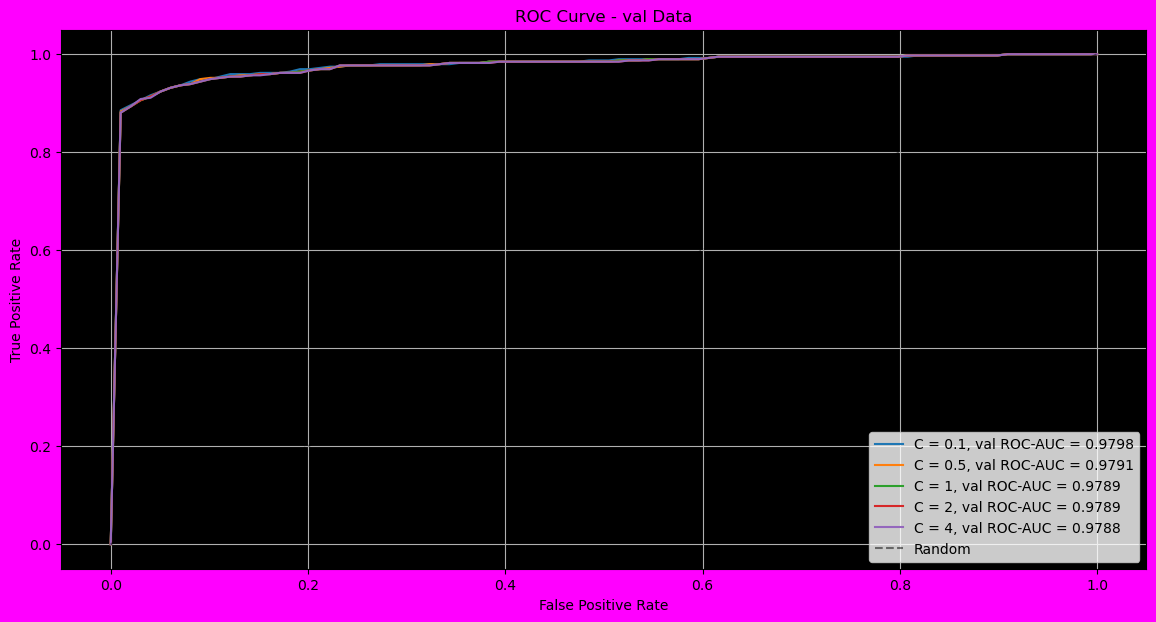

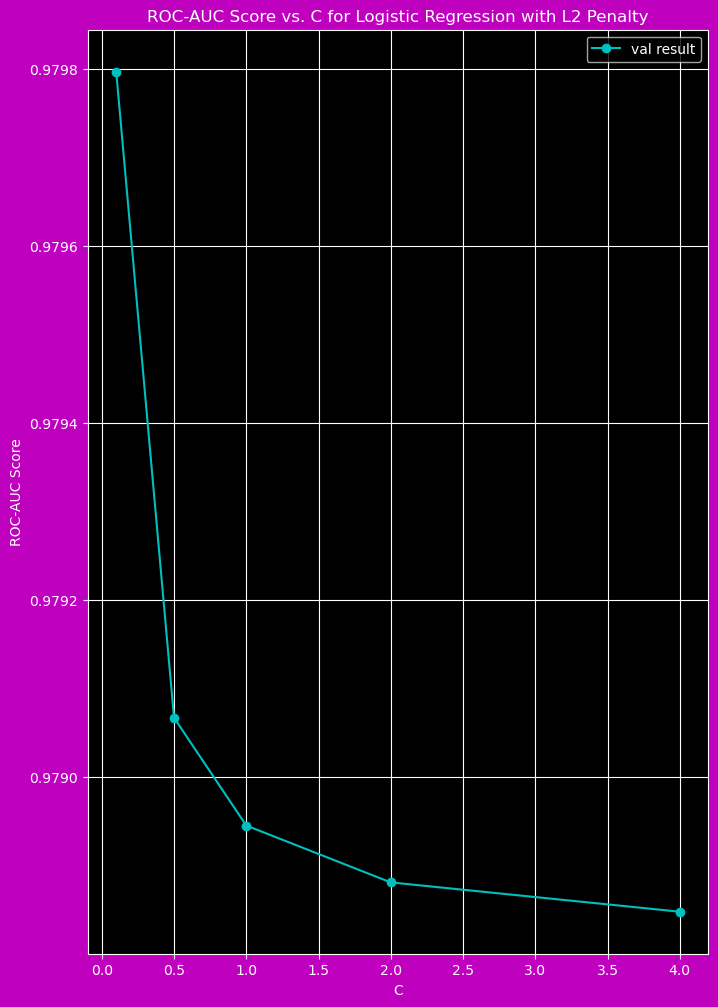





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of C: 
 [0.9797969874466093, 0.9790668817700007, 0.9789450373956186, 0.9788807735548114, 0.9788476359347289]
Best C: 0.1
Best Mean ROC-AUC score for val data: 0.9797969874466093
Mean precision val score for best C 0.885478588591554
Mean recall val score for best C 0.6295975017349064
Mean f1 val score for best C 0.7341406860856002




In [51]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp

print("============================================================================================================")

print("======================================Logistic Regression Classifier:=======================================")

# Define your values of C
C_values = [0.1, 0.5, 1, 2, 4]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for train and val data
mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig, ax2= plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Set facecolor to black for dark background
# Set background color for subplots
ax2.set_facecolor('black')

# Loop through each value of C
for c in C_values:
    print("C =", c, "Penalty = L2")
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Perform cross-validation    
    for train_index, val_index in skf.split(X_train_pt, y_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_train_pt[train_index], X_train_pt[val_index]
        y_train_cv, y_val_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[val_index]

        logreg_classifier = linear_model.LogisticRegression(penalty='l2', C=c)
        logreg_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = logreg_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)


        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)

        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))


        # precision_val.append(precision_score(y_val_cv, y_val_pred))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")
        
    # Calculate mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)

    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of C
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='C = ' + str(c) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("===============================Logistic Regression Has Run Successfully:====================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plot ROC curve for random classifier
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Set labels and title for ROC curves
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(C_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('C')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. C for Logistic Regression with L2 Penalty')
    # plt.xscale('log')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for train and val data for all values of C
print("Mean ROC-AUC scores for val data for all values of C: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_c = C_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best C:", best_c)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("Mean precision val score for best C", mean_precision_scores_val[best_index])
print("Mean recall val score for best C", mean_recall_scores_val[best_index])
print("Mean f1 val score for best C", mean_f1_scores_val[best_index])

print("============================================================================================================")
print("\n")

print("============================================================================================================")



B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score

In [52]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression parameters for Stratified K-fold cross vaidation
"""
This code performs hyperparameter tuning using K-fold cross-validation for logistic regression. 
The parameter grid being searched is defined in params, with C being the regularization parameter for logistic regression. 
folds is an object that defines how many folds should be used in cross-validation.
"""

params = {"C": [0.01, 0.1, 0.5], 'penalty': ['l1', 'l2']}

# Define the logistic regression classifier
logreg_classifier = linear_model.LogisticRegression()

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(logreg_classifier,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        pre_dispatch = 6, # prevents explosion of consumption of memory
                        return_train_score=True) 
# Fit the GridSearchCV object and perform hyperparameter tuning
model_GridSearch.fit(X_train_pt, y_train_pt)


end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Time taken: 7.87 seconds
Best ROC AUC score:  0.9812052138770543
Best hyperparameters:  {'C': 0.01, 'penalty': 'l2'}


In [53]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'C': 0.01, 'penalty': 'l1'} nan
{'C': 0.01, 'penalty': 'l2'} 0.9812052138770543
{'C': 0.1, 'penalty': 'l1'} nan
{'C': 0.1, 'penalty': 'l2'} 0.9797969874466093
{'C': 0.5, 'penalty': 'l1'} nan
{'C': 0.5, 'penalty': 'l2'} 0.9790668817700007

Rank of each hyperparameter combination:
1 {'C': 0.01, 'penalty': 'l1'}
2 {'C': 0.01, 'penalty': 'l2'}
3 {'C': 0.1, 'penalty': 'l1'}
4 {'C': 0.1, 'penalty': 'l2'}
5 {'C': 0.5, 'penalty': 'l1'}
6 {'C': 0.5, 'penalty': 'l2'}

Standard deviation of test scores:
{'C': 0.01, 'penalty': 'l1'} nan
{'C': 0.01, 'penalty': 'l2'} 0.007670919641509045
{'C': 0.1, 'penalty': 'l1'} nan
{'C': 0.1, 'penalty': 'l2'} 0.009179067053040193
{'C': 0.5, 'penalty': 'l1'} nan
{'C': 0.5, 'penalty': 'l2'} 0.009651062780020628


# SVM Classifier

In [54]:
"""
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp

print("============================================================================================================")

print("=============================================SVM Classifier:================================================")

# Define your values of C
C_values = [0.1, 1, 2]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for train and val data
mean_roc_auc_scores_train = []
mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), facecolor='fuchsia')  # Set facecolor to black for dark background
# Set background color for subplots
ax1.set_facecolor('black')
ax2.set_facecolor('black')

# Loop through each value of C
for c in C_values:
    print("C =", c, "Kernel = rbf")
    cv_scores_train = []
    cv_scores_val = []
    fprs_train = []
    tprs_train = []
    fprs_val = []
    tprs_val = []

    # Perform cross-validation
    for train_index, val_index in skf.split(X_train_pt, y_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_train_pt[train_index], X_train_pt[val_index]
        y_train_cv, y_val_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[val_index]

        # svm_classifier = svm.SVC(kernel='linear', C=c, probability=True)
        svm_classifier = svm.SVC(kernel='rbf', C=c, probability=True)
        svm_classifier.fit(X_train_cv, y_train_cv)

        y_train_pred = svm_classifier.predict_proba(X_train_cv)
        train_score = roc_auc_score(y_true=y_train_cv, y_score=y_train_pred[:, 1])
        cv_scores_train.append(train_score)

        y_val_pred = svm_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_train, tpr_train, _ = roc_curve(y_true=y_train_cv, y_score=y_train_pred[:, 1])
        tprs_train.append(interp(mean_fpr, fpr_train, tpr_train))
        tprs_train[-1][0] = 0.0
        fprs_train.append(fpr_train)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")
    # Calculate mean ROC-AUC scores for train and val data
    mean_roc_auc_train = np.mean(cv_scores_train)
    mean_roc_auc_scores_train.append(mean_roc_auc_train)

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    print("ROC-AUC Score for train data =", mean_roc_auc_train)
    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curves for train data
    ax1.plot(mean_fpr, np.mean(tprs_train, axis=0), linestyle='-', lw=2, label='C = {}, Train ROC-AUC = {:.4f}'.format(c, mean_roc_auc_train))

    # Plot ROC curves for val data
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='C = {}, val ROC-AUC = {:.4f}'.format(c, mean_roc_auc_val))

print("=========================================SVM Has Run Successfully:==========================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Set plot properties for train data
ax1.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', label='Random', alpha=0.8)
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.0])
ax1.set_xlabel('False Positive Rate', fontsize=12)
ax1.set_ylabel('True Positive Rate', fontsize=12)
ax1.set_title('ROC Curve - Train Data', fontsize=14)
ax1.legend(loc="lower right")
ax1.grid(True)  # Add grid to the plot

# Set plot properties for val data
ax2.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', label='Random', alpha=0.8)
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.0])
ax2.set_xlabel('False Positive Rate', fontsize=12)
ax2.set_ylabel('True Positive Rate', fontsize=12)
ax2.set_title('ROC Curve - val Data', fontsize=14)
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(C_values, mean_roc_auc_scores_train, 'yo-')
    plt.plot(C_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('C')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. C for SVM')
    # plt.xscale('log')
    plt.legend(['train result', 'val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for train and val data for all values of C
print("Mean ROC-AUC scores for train data for all values of C: \n", mean_roc_auc_scores_train)
print("Mean ROC-AUC scores for val data for all values of C: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_c = C_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best C:", best_c)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)



print("============================================================================================================")
print("\n")
print("============================================================================================================")
"""

'\nimport matplotlib.pyplot as plt\nimport numpy as np\nfrom sklearn import svm\nfrom sklearn.model_selection import StratifiedKFold\nfrom sklearn.metrics import roc_auc_score\nfrom scipy import interp\n\nprint("============================================================================================================")\n\nprint("=============================================SVM Classifier:================================================")\n\n# Define your values of C\nC_values = [0.1, 1, 2]\n\n# Initialize lists to store mean ROC-AUC scores and mean false positive rates for train and val data\nmean_roc_auc_scores_train = []\nmean_roc_auc_scores_val = []\nmean_fpr = np.linspace(0, 1, 100)\n\n# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))\nfig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), facecolor=\'fuchsia\')  # Set facecolor to black for dark background\n# Set background color for subplots\nax1.set_facecolor(\'black\')\nax2.set_facecolor(\'black\')\n\n# Loop through each

B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score

In [55]:
"""
from sklearn import svm

params = {"C": [0.01, 0.1], 'kernel': ['rbf'], 'gamma': ['auto']}

# Define the SVM classifier
svm_classifier = svm.SVC()

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(svm_classifier,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        pre_dispatch = 6, # prevents explosion of consumption of memory
                        return;']]_train_score=True) 

# Fit the GridSearchCV object and perform hyperparameter tuning
model_GridSearch.fit(X_train_pt, y_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)
"""

'\nfrom sklearn import svm\n\nparams = {"C": [0.01, 0.1], \'kernel\': [\'rbf\'], \'gamma\': [\'auto\']}\n\n# Define the SVM classifier\nsvm_classifier = svm.SVC()\n\nstart_time = time.time()\n\n# Create a GridSearchCV object with stratified Cross validation\nmodel_GridSearch = GridSearchCV(svm_classifier,\n                        param_grid = params, \n                        scoring= \'roc_auc\', \n                        cv = skf, \n                        n_jobs=-1, # using 100% of CPU\n                        verbose = 1,\n                        pre_dispatch = 6, # prevents explosion of consumption of memory\n                        return;\']]_train_score=True) \n\n# Fit the GridSearchCV object and perform hyperparameter tuning\nmodel_GridSearch.fit(X_train_pt, y_train_pt)\n\nend_time = time.time()\nprint("Time taken: {:.2f} seconds".format(end_time - start_time))\n\n# Print the evaluation result by choosing a evaluation metric\nprint(\'Best ROC AUC score: \', model_GridSearch.be

# 4. Decision Tree

==============================================Decision Tree:================================================
Max Depth = 1
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 0.704596996307373 seconds
Train: [     0      1      2 ... 227842 227843 227844] val: [ 75936  75937  75938 ... 153006 153116 153683]
Time elapsed: 0.7001385688781738 seconds
Train: [     0      1      2 ... 153006 153116 153683] val: [151894 151895 151896 ... 227842 227843 227844]
Time elapsed: 0.6481051445007324 seconds
ROC-AUC Score for val data = 0.8260369152950421
Mean precision val score: 0.7687499999999999
Mean recall val score: 0.6524211581463489
Mean f1 val score: 0.7037697164558141
------------------------------------------------------------------------------------------------------------
Max Depth = 2
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 1.2306509017944336 second

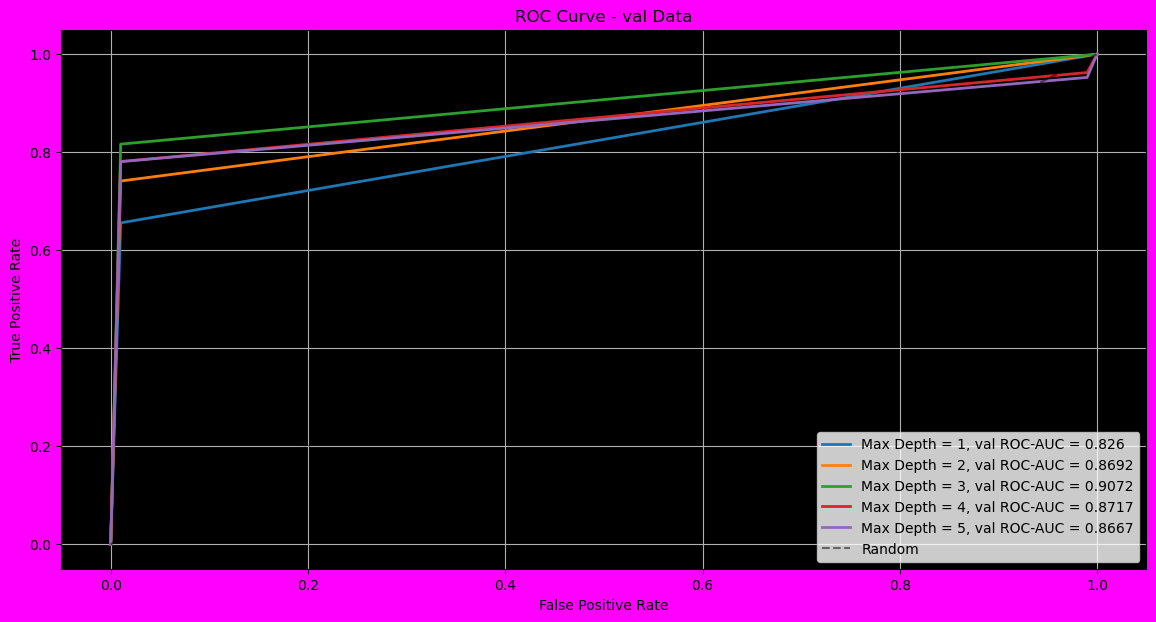

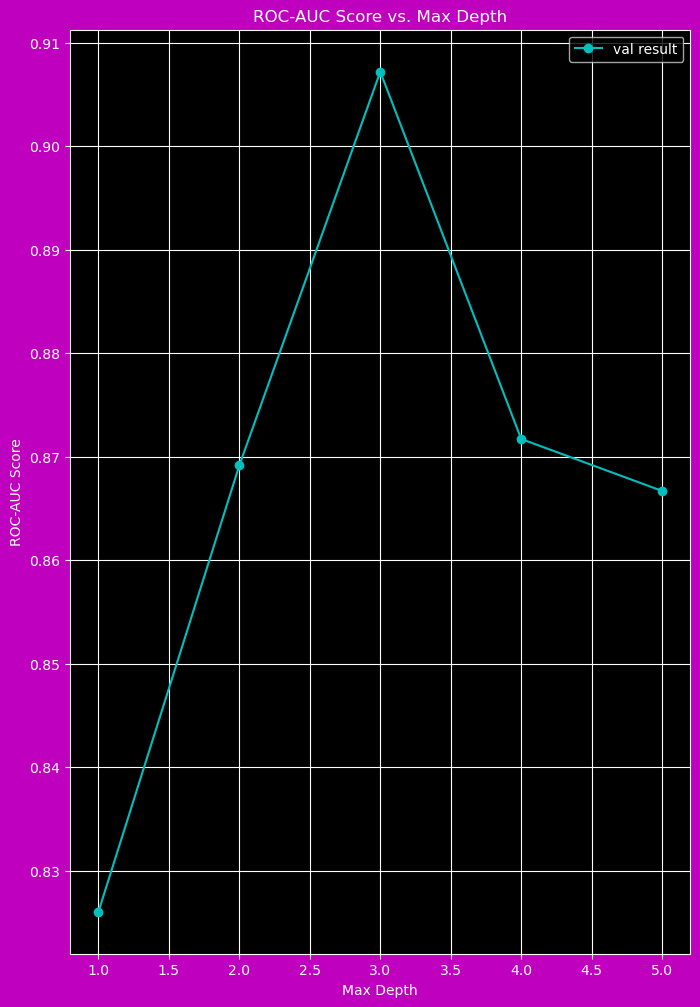





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of Max Depth: 
 [0.8260369152950421, 0.869181657800751, 0.9072074172906813, 0.8717184736475915, 0.86669995444886]
Best Max Depth: 3
Best Mean ROC-AUC score for val data: 0.9072074172906813
Mean precision val score for best C 0.8293379738051869
Mean recall val score for best C 0.7183090446449225
Mean f1 val score for best C 0.7692937154692389




In [56]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp

print("============================================================================================================")

print("==============================================Decision Tree:================================================")


# Define your values of max_depth
max_depth_values = [1, 2, 3, 4, 5]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for val data
mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2= plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Set facecolor to black for dark background
# Set background color for subplots
ax2.set_facecolor('black')

# Loop through each value of max_depth
for max_depth in max_depth_values:
    print("Max Depth =", max_depth)
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []


    # Perform cross-validation
    for train_index, val_index in skf.split(X_train_pt, y_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_train_pt[train_index], X_train_pt[val_index]
        y_train_cv, y_val_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[val_index]

        # Create a decision tree classifier with the specified max_depth value
        dt_classifier = DecisionTreeClassifier(max_depth=max_depth)
        dt_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = dt_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)
        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculate mean ROC-AUC scores for val data
    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of C
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='Max Depth = ' + str(max_depth) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("==================================Decision Tree Has Run Successfully:======================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plot ROC curve for random classifier
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Set labels and title for ROC curves
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(max_depth_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('Max Depth')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. Max Depth')
    # plt.xscale('log')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for val data for all values of Max Depth
print("Mean ROC-AUC scores for val data for all values of Max Depth: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_max_depth = max_depth_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best Max Depth:", best_max_depth)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("Mean precision val score for best C", mean_precision_scores_val[best_index])
print("Mean recall val score for best C", mean_recall_scores_val[best_index])
print("Mean f1 val score for best C", mean_f1_scores_val[best_index])


print("============================================================================================================")
print("\n")
print("============================================================================================================")

B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score

- setting a maximum depth for the tree is a form of regularization that can help prevent overfitting. However, setting the maximum depth too low may result in underfitting and reduced model performance. Therefore, the optimal value of max_depth depends on the complexity of the problem and the available data.

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import time

# Define the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define the parameters to be tuned
params = {'max_depth': [2, 3, 4],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4],
          'criterion': ['gini', 'entropy']}

# Create a GridSearchCV object with stratified cross-validation
start_time = time.time()
model_GridSearch = GridSearchCV(dt_classifier,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        return_train_score=True) 
 
# Fit the GridSearchCV object and perform hyperparameter tuning
model_GridSearch.fit(X_train_pt, y_train_pt)

end_time = time.time()

# Print the time taken to fit the model
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing an evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Time taken: 43.21 seconds
Best ROC AUC score:  0.9337472016466822
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [58]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)


Mean test scores:
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2} 0.869181657800751
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 5} 0.869181657800751
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 10} 0.869181657800751
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2} 0.869181657800751
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 5} 0.869181657800751
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 10} 0.869181657800751
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 2} 0.869181657800751
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 5} 0.869181657800751
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 10} 0.869181657800751
{'criterion': 'gini', 'max_depth': 3, 'min_samples_l

# 5. Random Forest

A. Finidng a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization

================================================Random Forest:==============================================
n_estimators = 10
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 9.92358112335205 seconds
Train: [     0      1      2 ... 227842 227843 227844] val: [ 75936  75937  75938 ... 153006 153116 153683]
Time elapsed: 11.64857530593872 seconds
Train: [     0      1      2 ... 153006 153116 153683] val: [151894 151895 151896 ... 227842 227843 227844]
Time elapsed: 10.926708936691284 seconds
ROC-AUC Score for train data = 0.9999992720321389
ROC-AUC Score for val data = 0.9273134848953234
------------------------------------------------------------------------------------------------------------
n_estimators = 50
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 53.96654224395752 seconds
Train: [     0      1      2 ... 227842 227843 227844] val: [ 75936 

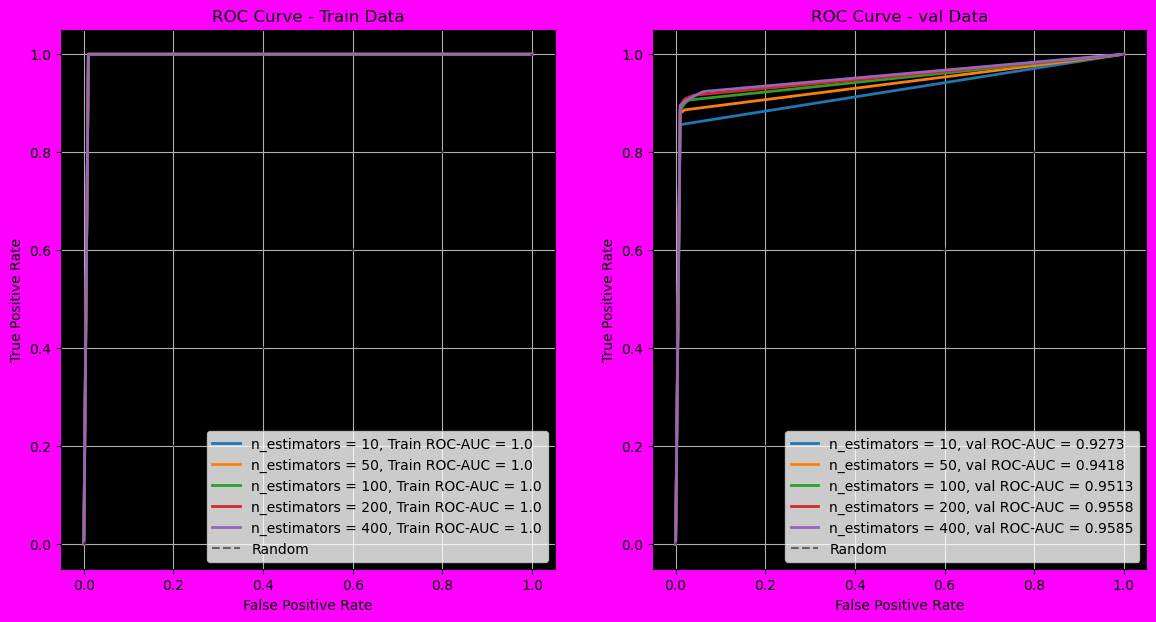

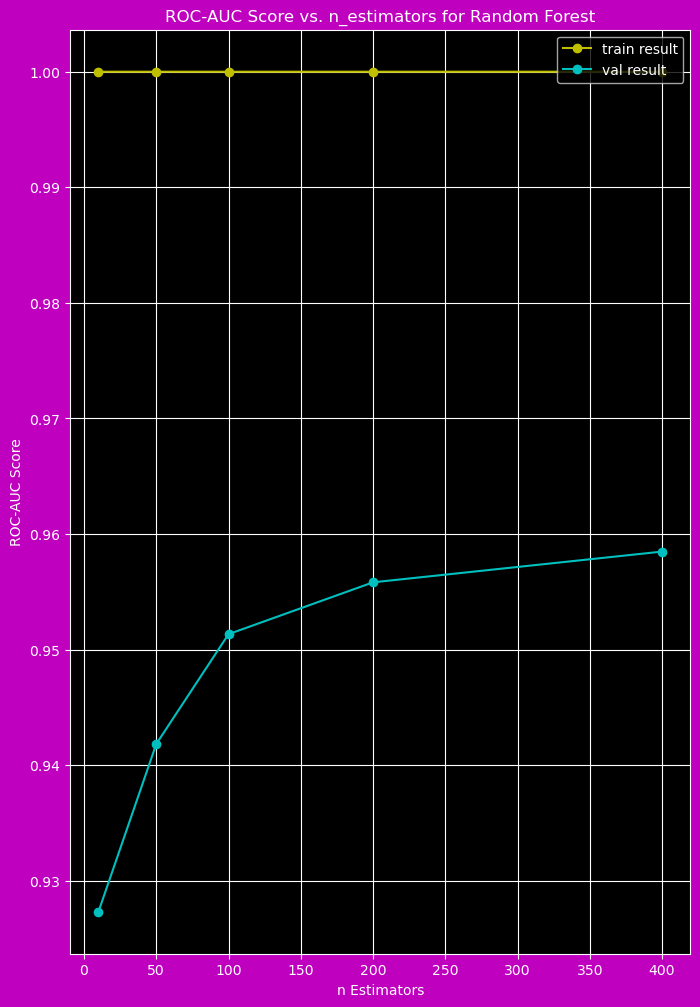





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for train data for all values of n Estimators: 
 [0.9999992720321389, 1.0, 1.0, 1.0, 1.0]
Mean ROC-AUC scores for val data for all values of n Estimators: 
 [0.9273134848953234, 0.941827197794396, 0.9513313642275182, 0.9558165560939088, 0.9584769724439853]
Best n Estimators: 400
Best Mean ROC-AUC score for val data: 0.9584769724439853




In [59]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
from sklearn.ensemble import RandomForestClassifier




print("============================================================================================================")

print("================================================Random Forest:==============================================")

# Define your values of n_estimators
n_values = [10, 50, 100, 200, 400]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for train and val data
mean_roc_auc_scores_train = []
mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), facecolor='fuchsia')  # Set facecolor to black for dark background
# Set background color for subplots
ax1.set_facecolor('black')
ax2.set_facecolor('black')


# Loop through each value of n_estimators
for n in n_values:
    print("n_estimators =", n)
    cv_scores_train = []
    cv_scores_val = []
    fprs_train = []
    tprs_train = []
    fprs_val = []
    tprs_val = []

    # Perform cross-validation
    for train_index, val_index in skf.split(X_train_pt, y_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_train_pt[train_index], X_train_pt[val_index]
        y_train_cv, y_val_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[val_index]

        rf_classifier = RandomForestClassifier(n_estimators=n)
        rf_classifier.fit(X_train_cv, y_train_cv)

        y_train_pred = rf_classifier.predict_proba(X_train_cv)
        train_score = roc_auc_score(y_true=y_train_cv, y_score=y_train_pred[:, 1])
        cv_scores_train.append(train_score)

        y_val_pred = rf_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_train, tpr_train, _ = roc_curve(y_true=y_train_cv, y_score=y_train_pred[:, 1])
        tprs_train.append(interp(mean_fpr, fpr_train, tpr_train))
        tprs_train[-1][0] = 0.0
        fprs_train.append(fpr_train)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")
        
    # Calculate mean ROC-AUC scores for train and val data
    mean_roc_auc_train = np.mean(cv_scores_train)
    mean_roc_auc_scores_train.append(mean_roc_auc_train)

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    print("ROC-AUC Score for train data =", mean_roc_auc_train)
    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of C
    ax1.plot(mean_fpr, np.mean(tprs_train, axis=0), linestyle='-', lw=2, label='n_estimators = ' + str(n) + ', Train ROC-AUC = ' + str(round(mean_roc_auc_train, 4)))
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='n_estimators = ' + str(n) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("=================================Random Forest Has Run Successfully:========================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plot ROC curve for random classifier
ax1.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Set labels and title for ROC curves
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve - Train Data')
ax1.legend(loc="lower right")
ax1.grid(True)  # Add grid to the plot

ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(n_values, mean_roc_auc_scores_train, 'yo-')
    plt.plot(n_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('n Estimators')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. n_estimators for Random Forest')
    # plt.xscale('log')
    plt.legend(['train result', 'val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for train and val data for all values of n Estimators
print("Mean ROC-AUC scores for train data for all values of n Estimators: \n", mean_roc_auc_scores_train)
print("Mean ROC-AUC scores for val data for all values of n Estimators: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_n_estimators = n_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best n Estimators:", best_n_estimators)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)



print("============================================================================================================")
print("\n")
print("============================================================================================================")

B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameters grid for tuning
params = {
    "n_estimators": [500],
    "min_samples_split": [5, 7],
    }

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(rf_classifier,
                        param_grid=params, 
                        scoring='roc_auc', 
                        cv=skf, 
                        n_jobs=-1,
                        verbose=1,
                        # pre_dispatch=6, 
                        return_train_score=True)

# Fit the GridSearchCV object and perform hyperparameter tuning
model_GridSearch.fit(X_train_pt, y_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)


Fitting 3 folds for each of 2 candidates, totalling 6 fits
Time taken: 1550.16 seconds
Best ROC AUC score:  0.9630175398305609
Best hyperparameters:  {'min_samples_split': 7, 'n_estimators': 500}


In [61]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)


Mean test scores:
{'min_samples_split': 5, 'n_estimators': 500} 0.9600106144933299
{'min_samples_split': 7, 'n_estimators': 500} 0.9630175398305609

Rank of each hyperparameter combination:
1 {'min_samples_split': 5, 'n_estimators': 500}
2 {'min_samples_split': 7, 'n_estimators': 500}

Standard deviation of test scores:
{'min_samples_split': 5, 'n_estimators': 500} 0.0071433838322713175
{'min_samples_split': 7, 'n_estimators': 500} 0.014283037988168755


6. XGBoost

A. Finidng a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization

============================================XGBoost Classifier:=============================================
Learning Rate = 0.001
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 0.4565753936767578 seconds
Train: [     0      1      2 ... 227842 227843 227844] val: [ 75936  75937  75938 ... 153006 153116 153683]
Time elapsed: 0.46057748794555664 seconds
Train: [     0      1      2 ... 153006 153116 153683] val: [151894 151895 151896 ... 227842 227843 227844]
Time elapsed: 0.44007396697998047 seconds
ROC-AUC Score for val data = 0.9441294063186202
Mean precision val score: 0.0
Mean recall val score: 0.0
Mean f1 val score: 0.0
------------------------------------------------------------------------------------------------------------
Learning Rate = 0.01
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 0.4715843200683594 seconds
Train: [     0      1    

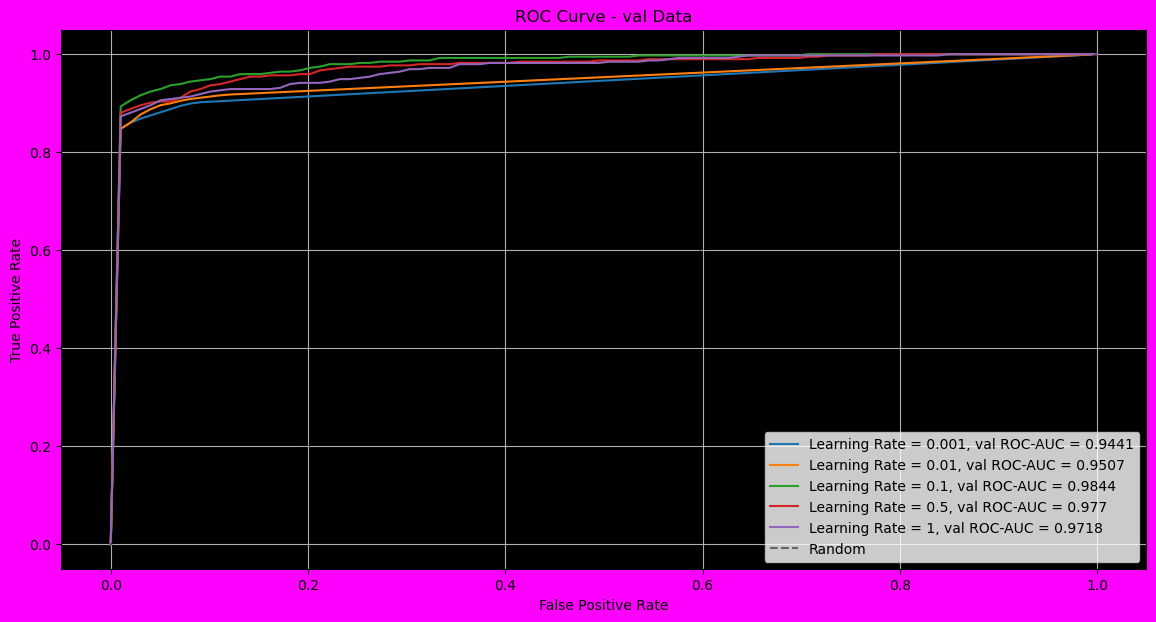

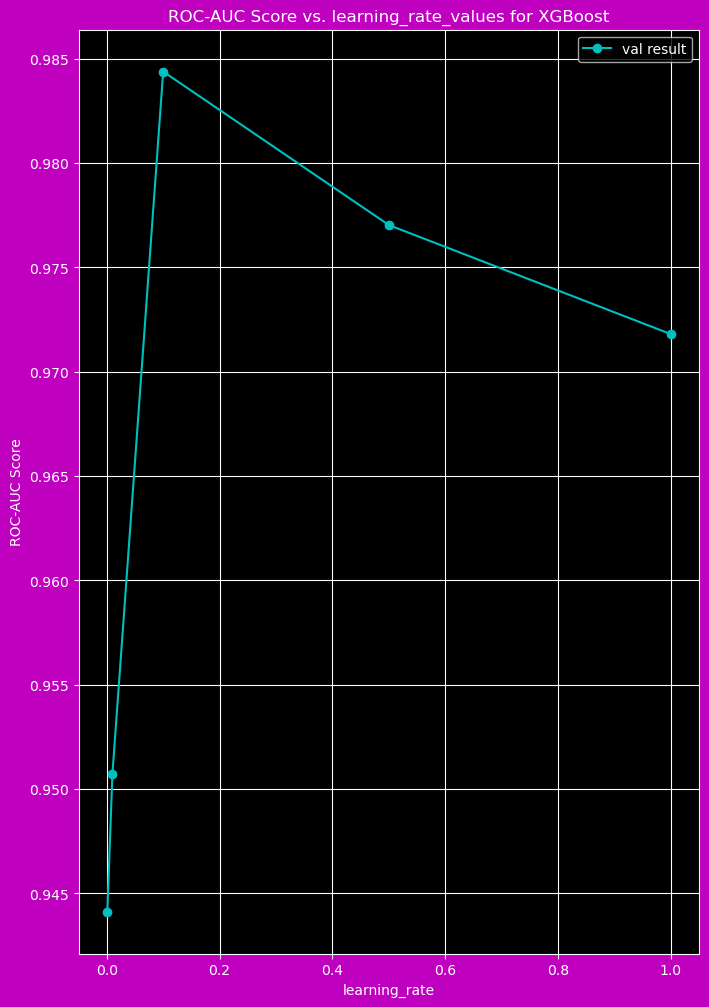





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of Learning Rate: 
 [0.9441294063186202, 0.9507214043848534, 0.9843822435706877, 0.9770282556774679, 0.9717990771651946]
Best Learning Rate : 0.1
Best Mean ROC-AUC score for val data: 0.9843822435706877
Mean precision val score for best C 0.922420634920635
Mean recall val score for best C 0.7868571208265864
Mean f1 val score for best C 0.8485760384345137




In [62]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
import xgboost as xgb

print("============================================================================================================")

print("============================================XGBoost Classifier:=============================================")


# Define your values of C
learning_rate_values = [0.001, 0.01, 0.1, 0.5, 1]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for val data
mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Set facecolor to black for dark background
# Set background color for subplots
ax2.set_facecolor('black')

# Loop through each value of C
for learning_rate in learning_rate_values:
    print("Learning Rate =", learning_rate)
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Perform cross-validation
    for train_index, val_index in skf.split(X_train_pt, y_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_train_pt[train_index], X_train_pt[val_index]
        y_train_cv, y_val_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[val_index]

        xgb_classifier = xgb.XGBClassifier(learning_rate = learning_rate, n_estimators=100, max_depth=3, gamma=0, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', reg_alpha=0.005, reg_lambda=1, random_state=42)
        xgb_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = xgb_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)

        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")
        
    # Calculate mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of C
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='Learning Rate = ' + str(learning_rate) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("=====================================XGBoost Has Run Successfully:==========================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plot ROC curve for random classifier
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Set labels and title for ROC curves
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(learning_rate_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('learning_rate')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. learning_rate_values for XGBoost')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for val data for all values of learning_rate_values
print("Mean ROC-AUC scores for val data for all values of Learning Rate: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_learning_rate = learning_rate_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best Learning Rate :", best_learning_rate)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("Mean precision val score for best C", mean_precision_scores_val[best_index])
print("Mean recall val score for best C", mean_recall_scores_val[best_index])
print("Mean f1 val score for best C", mean_f1_scores_val[best_index])


print("============================================================================================================")
print("\n")
print("============================================================================================================")

B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score

In [63]:
#Best Learning Rate : 0.1
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold

params = {
    'learning_rate': [0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 0.9],
}

# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc') # As the number of classes are 2

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(xgb_classifier, 
                        param_grid=params, 
                        scoring='roc_auc', 
                        cv=skf, 
                        n_jobs=-1, 
                        verbose=1, 
                        return_train_score=True)

# Fit the GridSearchCV object and perform hyperparameter tuning
model_GridSearch.fit(X_train_pt, y_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# print the evaluation result by choosing an evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Time taken: 13.29 seconds
Best ROC AUC score:  0.9835201260497678
Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.7}


In [64]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} 0.982702128119914
{'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.7} 0.9835201260497678
{'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.9} 0.9822449799639249
{'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.5} 0.9824771506482223
{'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.7} 0.9795080825114776
{'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.9} 0.9786927396236905
{'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.5} 0.9818957435995855
{'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.7} 0.9820154584738642
{'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.9} 0.9784259310965945

Rank of each hyperparameter combination:
1 {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5}
2 {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.7}
3 {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.9}
4 {'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.5}
5 {'learning_rate': 0

# Final Observation on Imbalanced Dataset

A. CROSS VALIDATION -  ROC-AUC Score of the models and best hyperparameters on Imbalanced data

svm.SVC {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} =

0.9565173998635063
DecisionTreeClassifier {'criterion': 'entropy', '': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} =

Best Mean ROC-AUC score for val data: 0.9337472016466822
Mean precision val score for best max_depth: 0.8480952241800844
Mean recall val score for best max_depth: 0.71578379211967
Mean f1 val score for best max_depth: 0.7752315571186218
RandomForestClassifier {'min_samples_split': 5, 'n_estimators': 500} =

0.9646808744238831
XGBClassifier {'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.5} =

Best Mean ROC-AUC score for val data: 0.9859738836378374
Mean precision val score for best Learning Rate: 0.9233400094242072
Mean recall val score for best Learning Rate: 0.779204256303493
Mean f1 val score for best Learning Rate: 0.8448234879500908


# Evaluation over Test Set

In [65]:
X_test_saved.head()

V1        V2        V3        V4        V5        V6        V7  \
263020 -0.674466  1.408105 -1.110622 -1.328366  1.388996 -1.308439  1.885879   
11378  -2.829816 -2.765149  2.537793 -1.074580  2.842559 -2.153536 -1.795519   
147283 -3.576495  2.318422  1.306985  3.263665  1.127818  2.865246  1.444125   
219439  2.060386 -0.015382 -1.082544  0.386019 -0.024331 -1.074935  0.207792   
36939   1.209965  1.384303 -1.343531  1.763636  0.662351 -2.113384  0.854039   

              V8        V9       V10  ...       V20       V21       V22  \
263020 -0.614233  0.311652  0.650757  ...  0.394322  0.080084  0.810034   
11378  -0.250020  3.073504 -1.000418  ... -0.515765 -0.295555  0.109305   
147283 -0.718922  1.874046  7.398491  ...  2.034786 -1.060151  0.016867   
219439 -0.338140  0.455091  0.047859  ... -0.192024 -0.281684 -0.639426   
36939  -0.475963 -0.629658 -1.579654  ...  0.009083 -0.164015 -0.328294   

             V23       V24       V25       V26       V27       V28  Amount  
263020 -0.224327  0.707899 -0.135837  0.045102  0.533837  0.291319   23.00  
11378  -0.813272  0.042996 -0.027660 -0.910247  0.110802 -0.511938   11.85  
147283 -0.132058 -1.483996 -0.296011  0.062823  0.552411  0.509764   76.07  
219439  0.331818 -0.067584 -0.283675  0.203529 -0.063621 -0.060077    0.99  
36939  -0.154631  0.619449  0.818998 -0.330525  0.046884  0.104527    1.50  

[5 rows x 29 columns]

In [66]:
y_test_saved.head()

263020    0
11378     0
147283    0
219439    0
36939     0
Name: Class, dtype: int64

In [67]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field
scaler = RobustScaler()

# Transforming the test data
X_test_saved[["Amount"]] = scaler.fit_transform(X_test_saved[["Amount"]])

In [68]:
X_test_saved.head()

V1        V2        V3        V4        V5        V6        V7  \
263020 -0.674466  1.408105 -1.110622 -1.328366  1.388996 -1.308439  1.885879   
11378  -2.829816 -2.765149  2.537793 -1.074580  2.842559 -2.153536 -1.795519   
147283 -3.576495  2.318422  1.306985  3.263665  1.127818  2.865246  1.444125   
219439  2.060386 -0.015382 -1.082544  0.386019 -0.024331 -1.074935  0.207792   
36939   1.209965  1.384303 -1.343531  1.763636  0.662351 -2.113384  0.854039   

              V8        V9       V10  ...       V20       V21       V22  \
263020 -0.614233  0.311652  0.650757  ...  0.394322  0.080084  0.810034   
11378  -0.250020  3.073504 -1.000418  ... -0.515765 -0.295555  0.109305   
147283 -0.718922  1.874046  7.398491  ...  2.034786 -1.060151  0.016867   
219439 -0.338140  0.455091  0.047859  ... -0.192024 -0.281684 -0.639426   
36939  -0.475963 -0.629658 -1.579654  ...  0.009083 -0.164015 -0.328294   

             V23       V24       V25       V26       V27       V28    Amount  
263020 -0.224327  0.707899 -0.135837  0.045102  0.533837  0.291319  0.014079  
11378  -0.813272  0.042996 -0.027660 -0.910247  0.110802 -0.511938 -0.142897  
147283 -0.132058 -1.483996 -0.296011  0.062823  0.552411  0.509764  0.761228  
219439  0.331818 -0.067584 -0.283675  0.203529 -0.063621 -0.060077 -0.295791  
36939  -0.154631  0.619449  0.818998 -0.330525  0.046884  0.104527 -0.288610  

[5 rows x 29 columns]

In [69]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=1, min_samples_split=2)   
clf.fit(X_train_pt, y_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved, y_score=y_pred_proba[:, 1])
print("Decision Tree Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved, y_pred)
preci_sion = precision_score(y_test_saved, y_pred)
re_call = recall_score(y_test_saved, y_pred)
# print the results
print("Decision Tree Classifier F1-Score on Test Set =", f1)
print("Decision Tree Classifier Precision on Test Set =", preci_sion)
print("Decision Tree Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

print("============================================================================================================")


Decision Tree Classifier ROC-AUC Score on Test Set = 0.9314465304973987
Decision Tree Classifier F1-Score on Test Set = 0.8200000000000001
Decision Tree Classifier Precision on Test Set = 0.803921568627451
Decision Tree Classifier Recall on Test Set = 0.8367346938775511
Time taken: 3.14 seconds


In [70]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = XGBClassifier(learning_rate=0.1, max_depth=3, subsample=0.5, objective='binary:logistic', eval_metric='auc') 
clf.fit(X_train_pt, y_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved, y_score=y_pred_proba[:, 1])
print("XGBOOST Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved, y_pred)
preci_sion = precision_score(y_test_saved, y_pred)
re_call = recall_score(y_test_saved, y_pred)
# print the results
print("XGBOOST Classifier F1-Score on Test Set =", f1)
print("XGBOOST Classifier Precision on Test Set =", preci_sion)
print("XGBOOST Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

XGBOOST Classifier ROC-AUC Score on Test Set = 0.9698374496112456
XGBOOST Classifier F1-Score on Test Set = 0.8241206030150754
XGBOOST Classifier Precision on Test Set = 0.8118811881188119
XGBOOST Classifier Recall on Test Set = 0.8367346938775511
Time taken: 0.68 seconds


In [71]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = RandomForestClassifier(min_samples_split=5, n_estimators=500)  
clf.fit(X_train_pt, y_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved, y_score=y_pred_proba[:, 1])
print("Random Forest Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved, y_pred)
preci_sion = precision_score(y_test_saved, y_pred)
re_call = recall_score(y_test_saved, y_pred)
# print the results
print("Random Forest Classifier F1-Score on Test Set =", f1)
print("Random Forest Classifier Precision on Test Set =", preci_sion)
print("Random Forest Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

print("============================================================================================================")

Random Forest Classifier ROC-AUC Score on Test Set = 0.963734542424173
Random Forest Classifier F1-Score on Test Set = 0.8200000000000001
Random Forest Classifier Precision on Test Set = 0.803921568627451
Random Forest Classifier Recall on Test Set = 0.8367346938775511
Time taken: 855.28 seconds


Print the important features of the best model to understand the dataset¶
This will not give much explanation on the already transformed dataset
But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 12
3rd Top var = 14


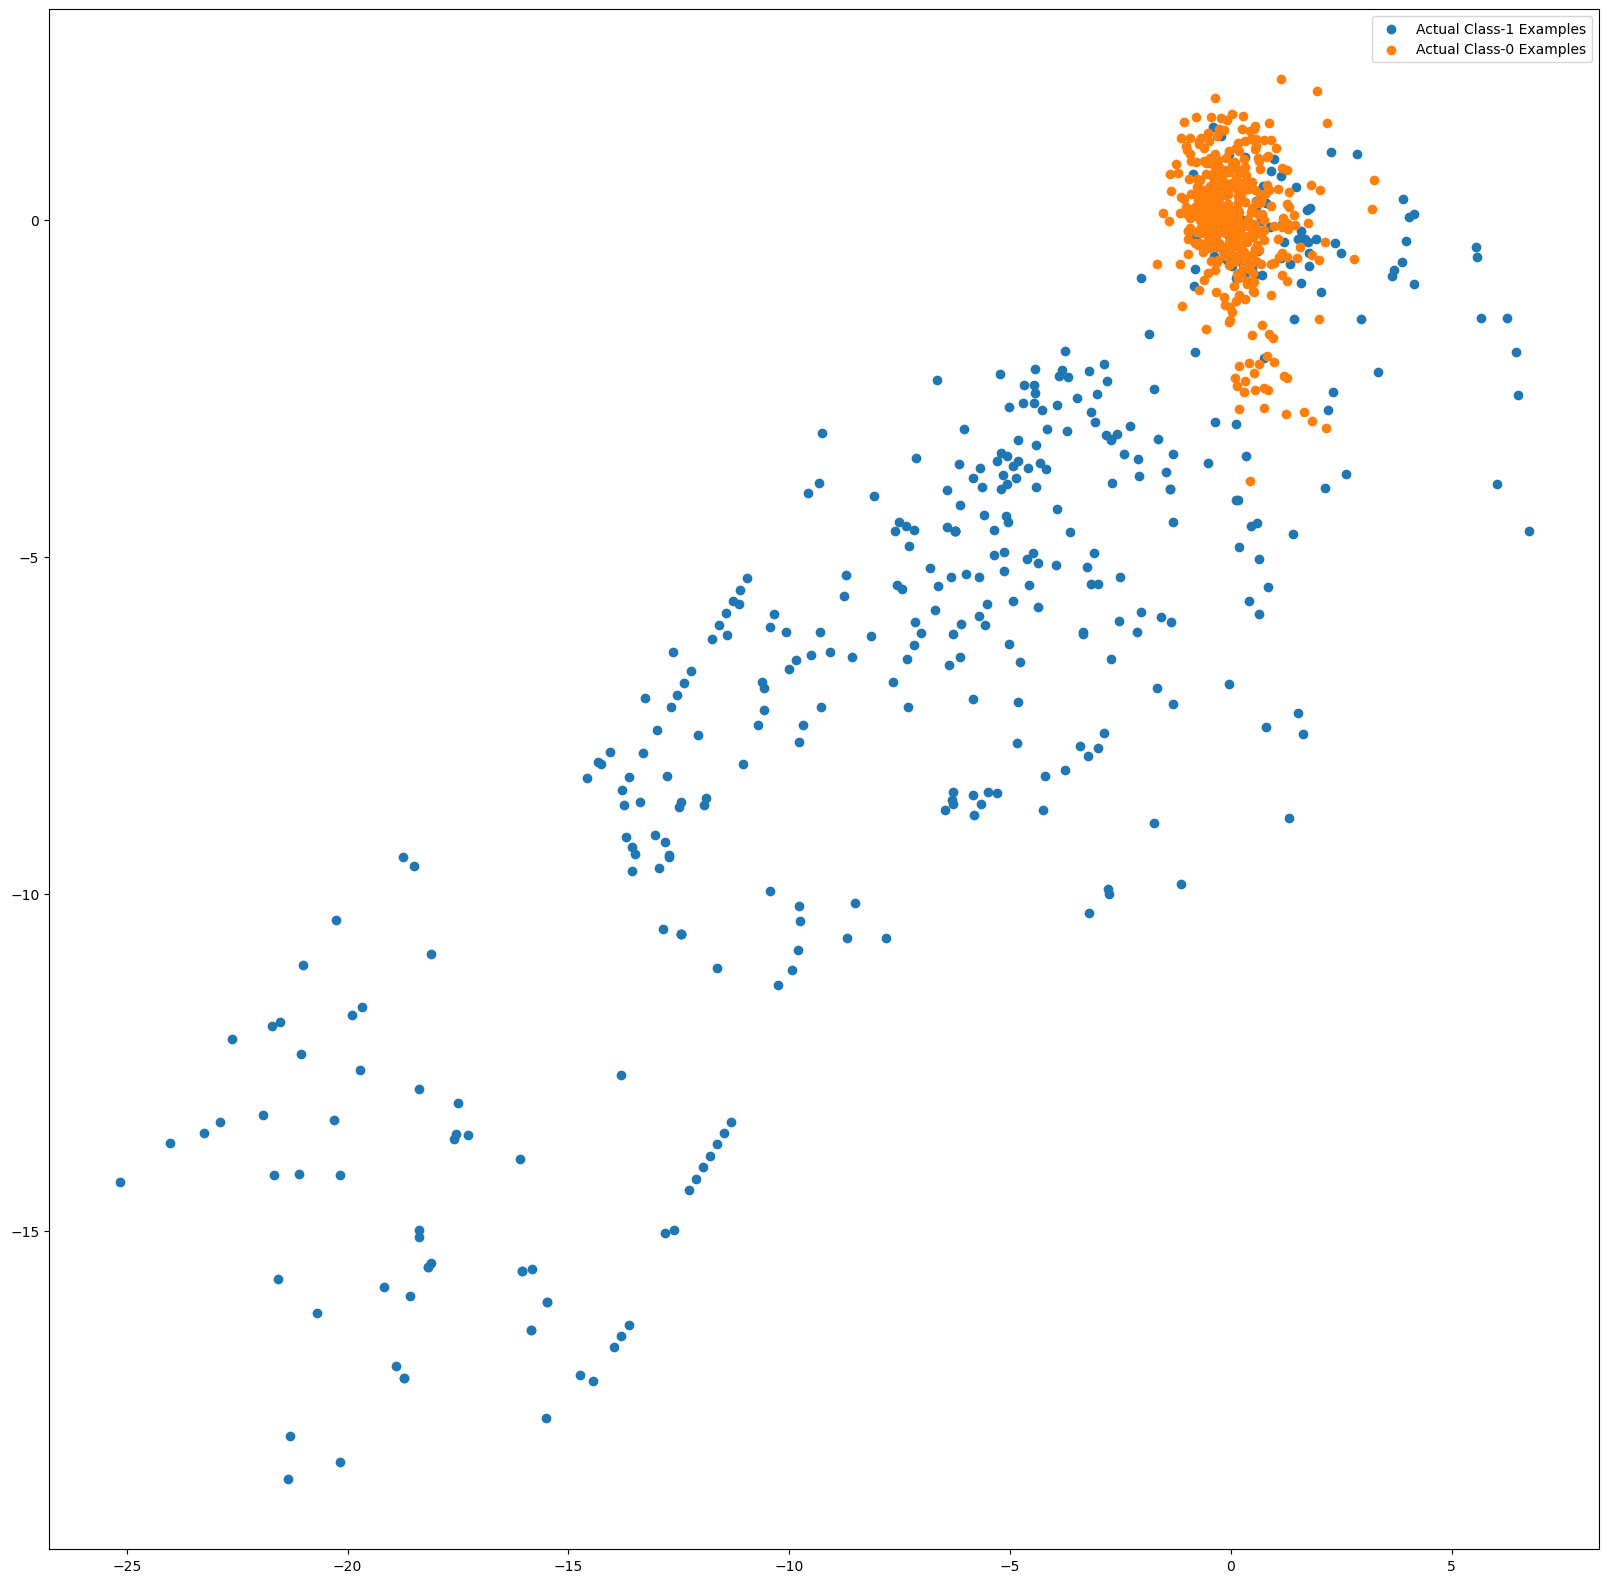

In [72]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

# Model building with balancing Classes

Why can't we use accuracy for imbalanced dataset?

- Accuracy is not a good metric for imbalanced datasets.
- This model would receive a very good accuracy score as it predicted correctly for the majority of observations, but this hides the true performance of the model which is objectively not good as it only predicts for one class
- Don't use accuracy score as a metric with imbalanced datasets (will be usually high and misleading), instead use f1-score, precision/recall score or confusion matrix


- In undersampling, you select fewer data points from the majority class for your model building process to balance both classes.
- In oversampling, you assign weights to randomly chosen data points from the minority class. This is done so that the algorithm can focus on this class while optimising the loss function.
- SMOTE is a process using which you can generate new data points that lie vectorially between two data points that belong to the minority class.
- ADASYN is similar to SMOTE, with a minor change in the sense that the number of synthetic samples that it will add will have a density distribution. The aim here is to create synthetic data for minority examples that are harder to learn rather than the easier ones.

Perform class balancing with :¶
I. Random Oversampling

II. SMOTE

### After evaluation on the raw data set, the class imbalance has been handled using at least two of the techniques to balance both train and test data sets.

In [73]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

In [74]:
from imblearn.over_sampling import RandomOverSampler

# Define the RandomOverSampler
ros = RandomOverSampler(sampling_strategy='minority', random_state=42)

# Resample the training data using RandomOverSampler
X_ros_train_pt, y_ros_train_pt = ros.fit_resample(X_train_pt, y_train_pt)

Print the class distribution after applying Random Oversampling

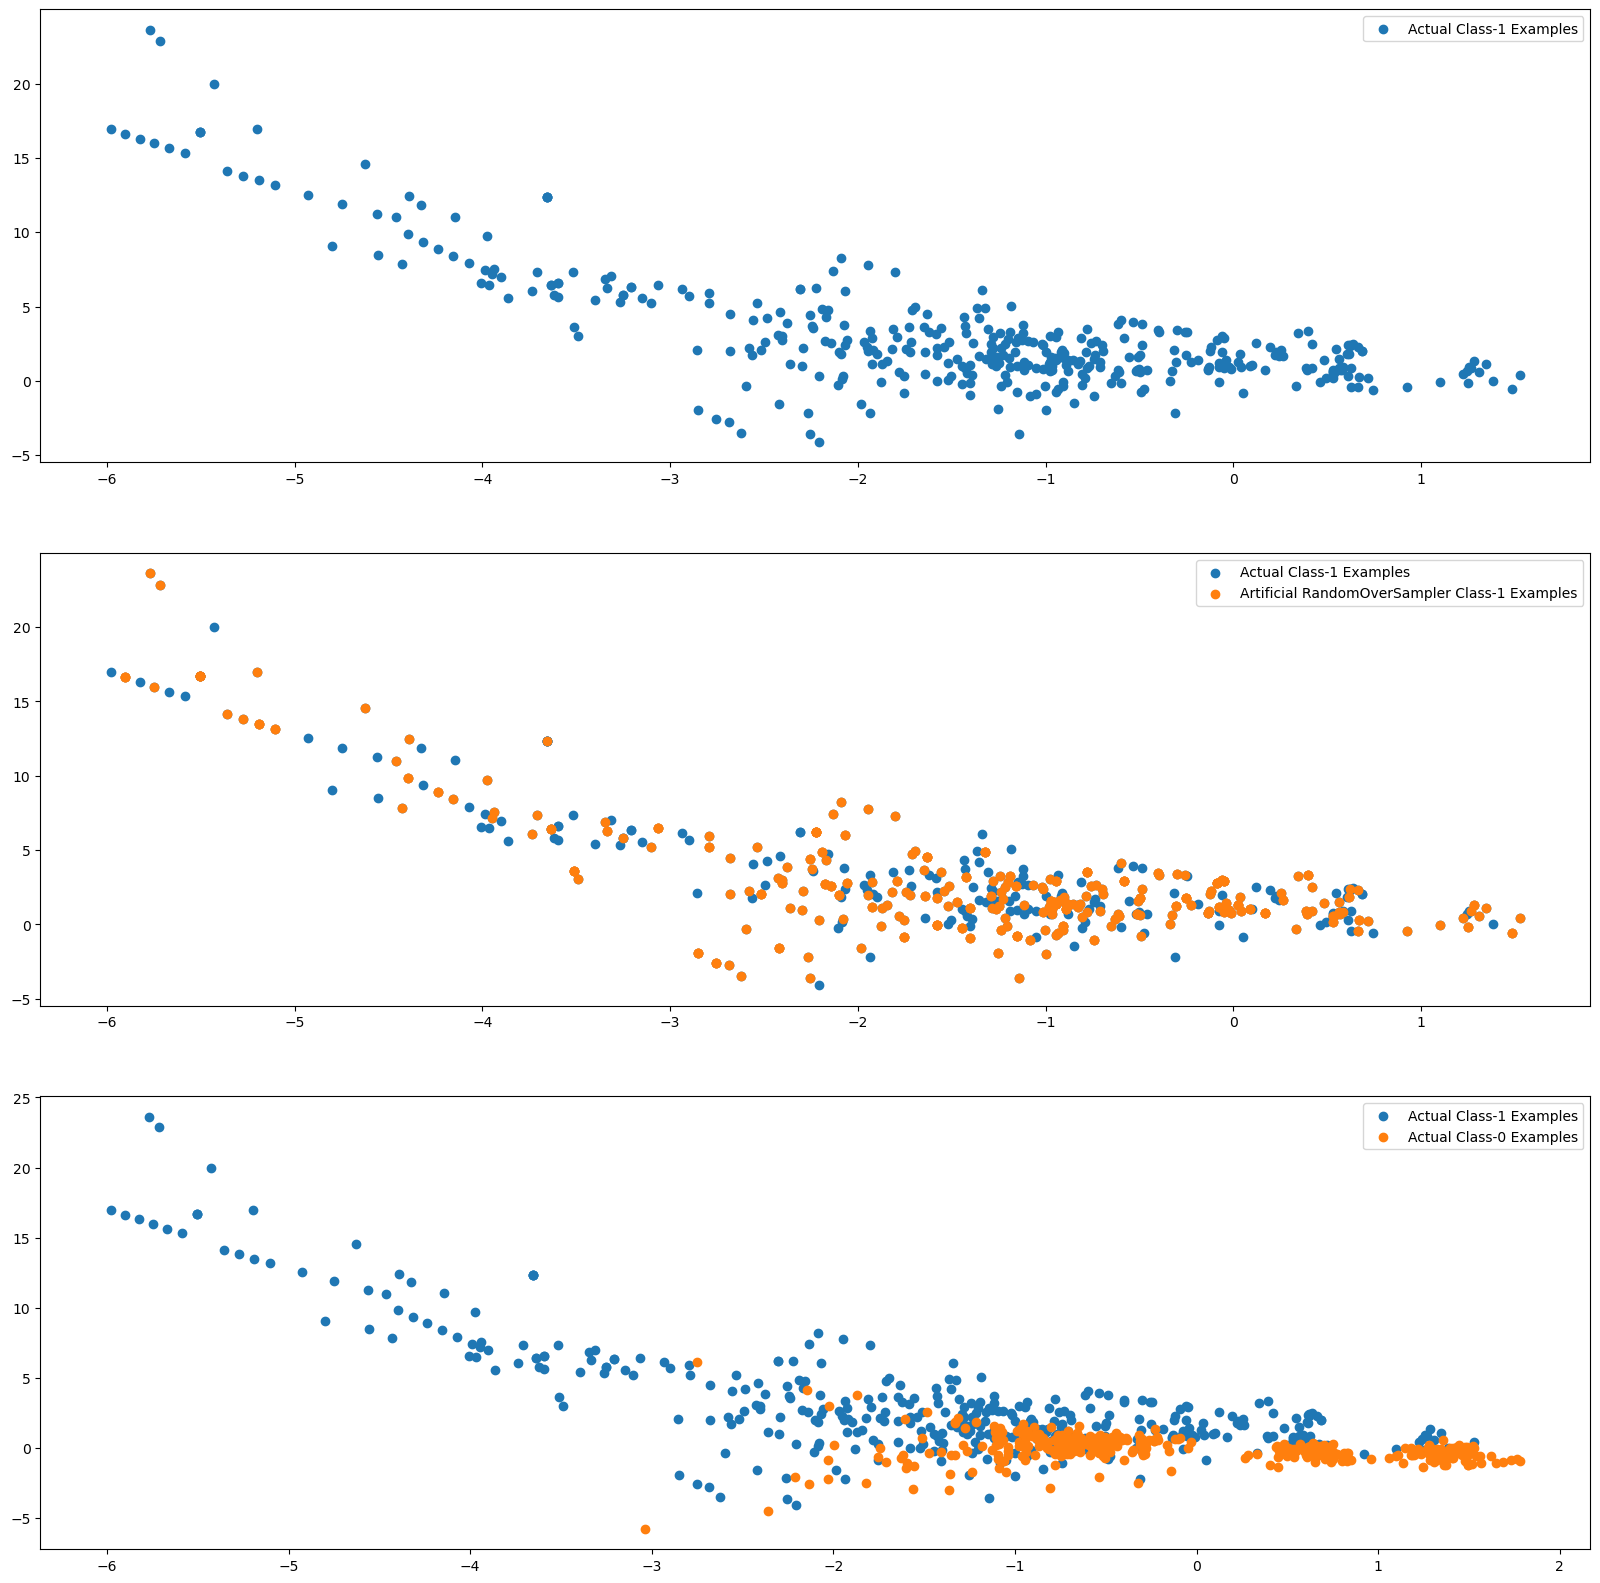

In [75]:
import warnings
warnings.filterwarnings("ignore")

# Artificial minority samples and corresponding minority labels from RandomOverSampler are appended
# below X_train_pt and y_train_pt respectively
# So to exclusively get the artificial minority samples from RandomOverSampler, we do
X_ros_train_pt_1 = X_ros_train_pt[X_train_pt.shape[0]:]

X_train_pt_1 = np.array(X_train_pt)[np.where(y_train_pt==1.0)]
X_train_pt_0 = np.array(X_train_pt)[np.where(y_train_pt==0.0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_ros_train_pt_1[:X_train_pt_1.shape[0], 0], X_ros_train_pt_1[:X_train_pt_1.shape[0], 1],
            label='Artificial RandomOverSampler Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_pt_0[:X_train_pt_1.shape[0], 0], X_train_pt_0[:X_train_pt_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

SOME MORE VISUALIZATION

- Check the distribution of your target variable: We use value_counts() method to check the distribution of your target variable.
- y_ros_train_pt is your target variable, we can use the following code to check the distribution of its values:

In [76]:
print(y_ros_train_pt.value_counts())

0    227451
1    227451
Name: Class, dtype: int64


<Axes: xlabel='Class', ylabel='count'>

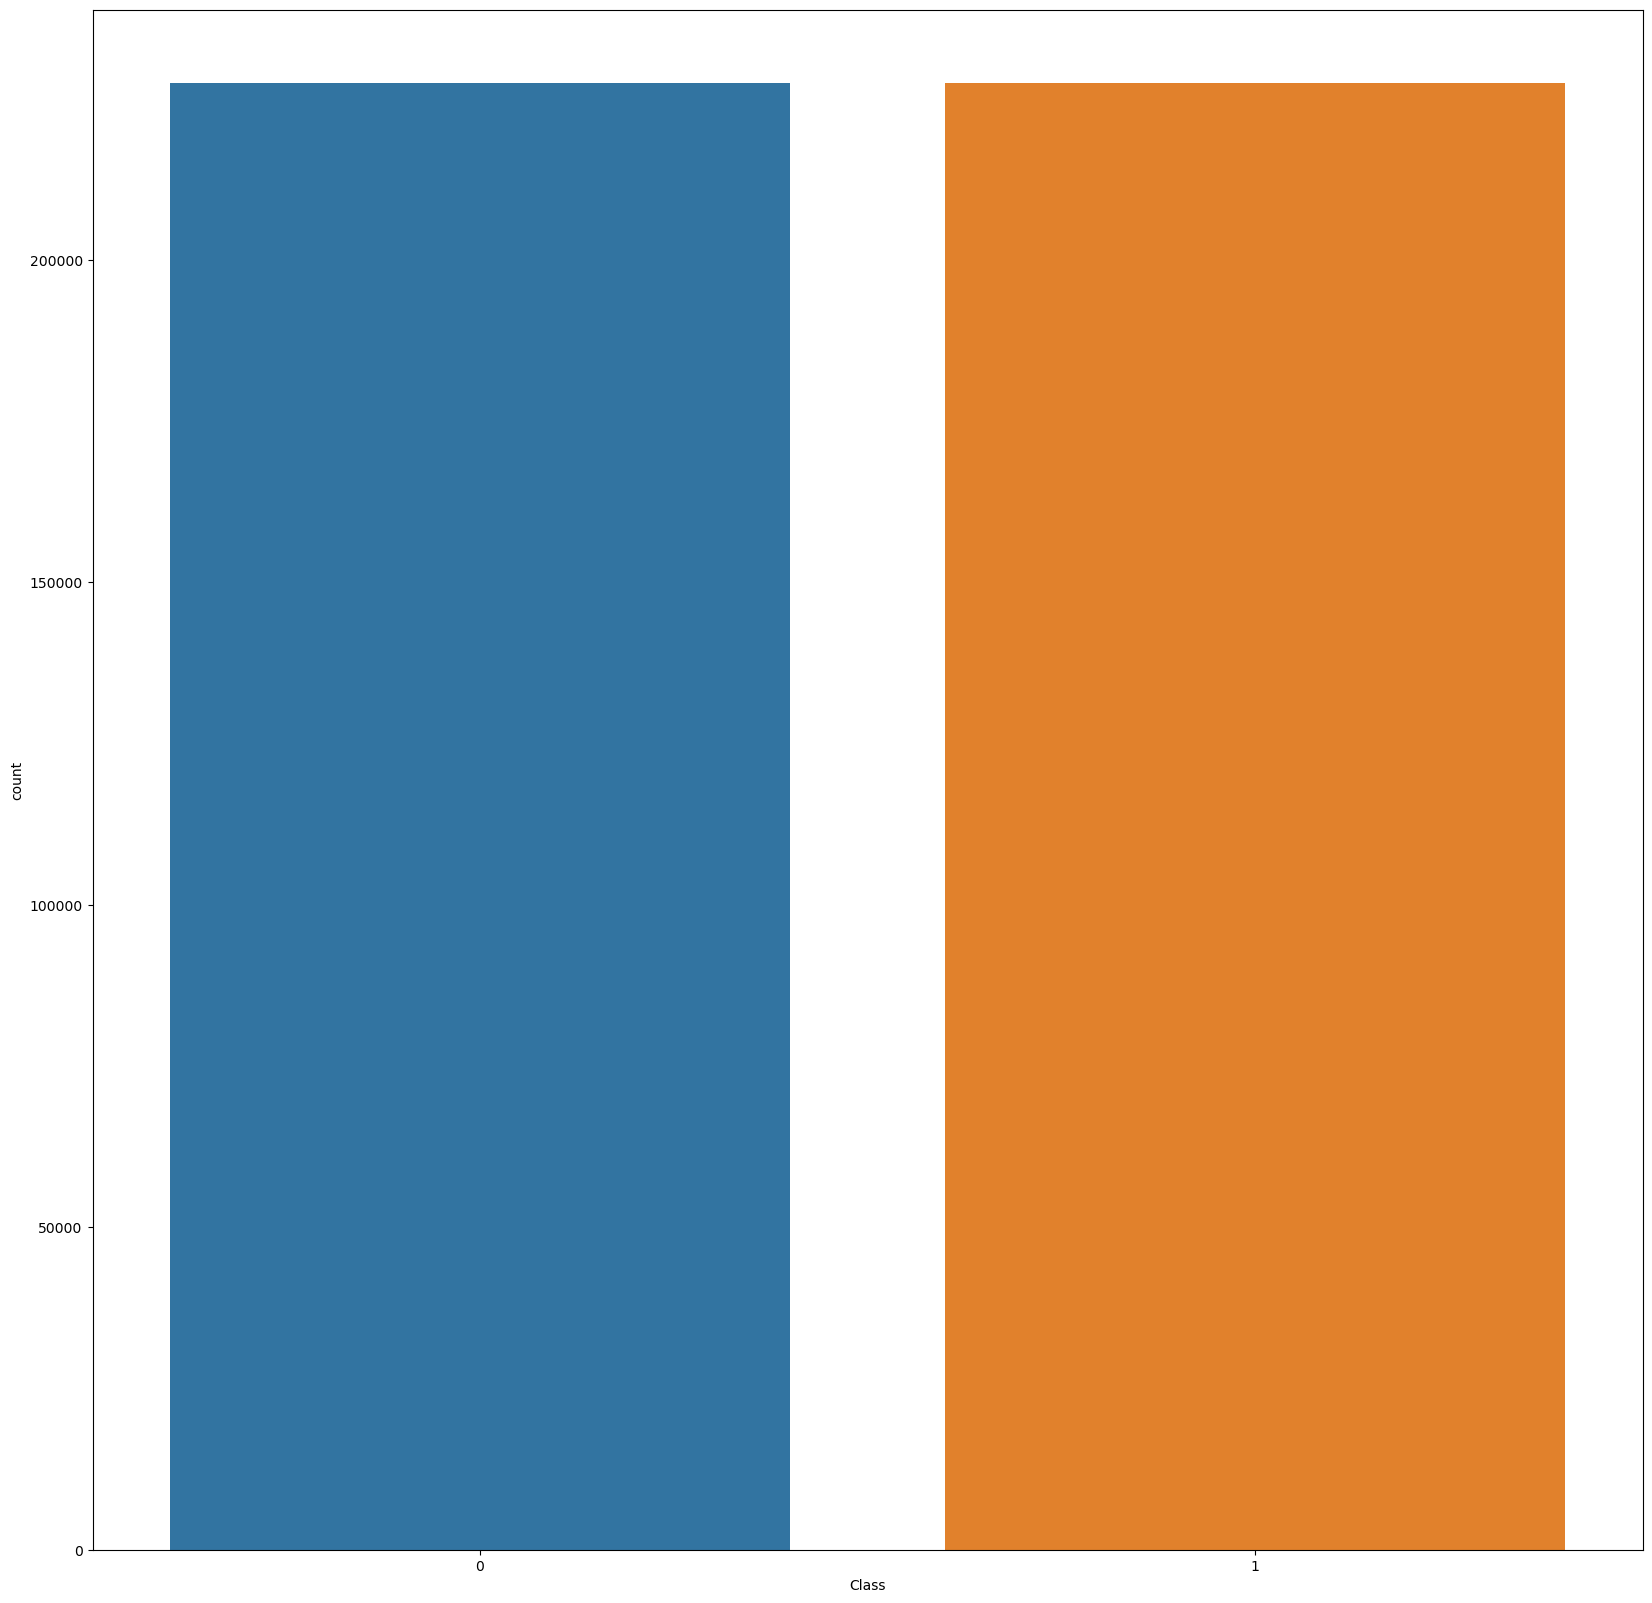

In [77]:
import seaborn as sns

sns.countplot(x=y_ros_train_pt)

(array([2.00000e+00, 1.20000e+01, 6.89000e+03, 8.64000e+03, 1.93390e+04,
        2.41990e+04, 7.23550e+04, 1.64576e+05, 9.98080e+04, 5.90810e+04]),
 array([-8.47181275, -7.43814201, -6.40447126, -5.37080052, -4.33712977,
        -3.30345903, -2.26978828, -1.23611754, -0.20244679,  0.83122396,
         1.8648947 ]),
 <BarContainer object of 10 artists>)

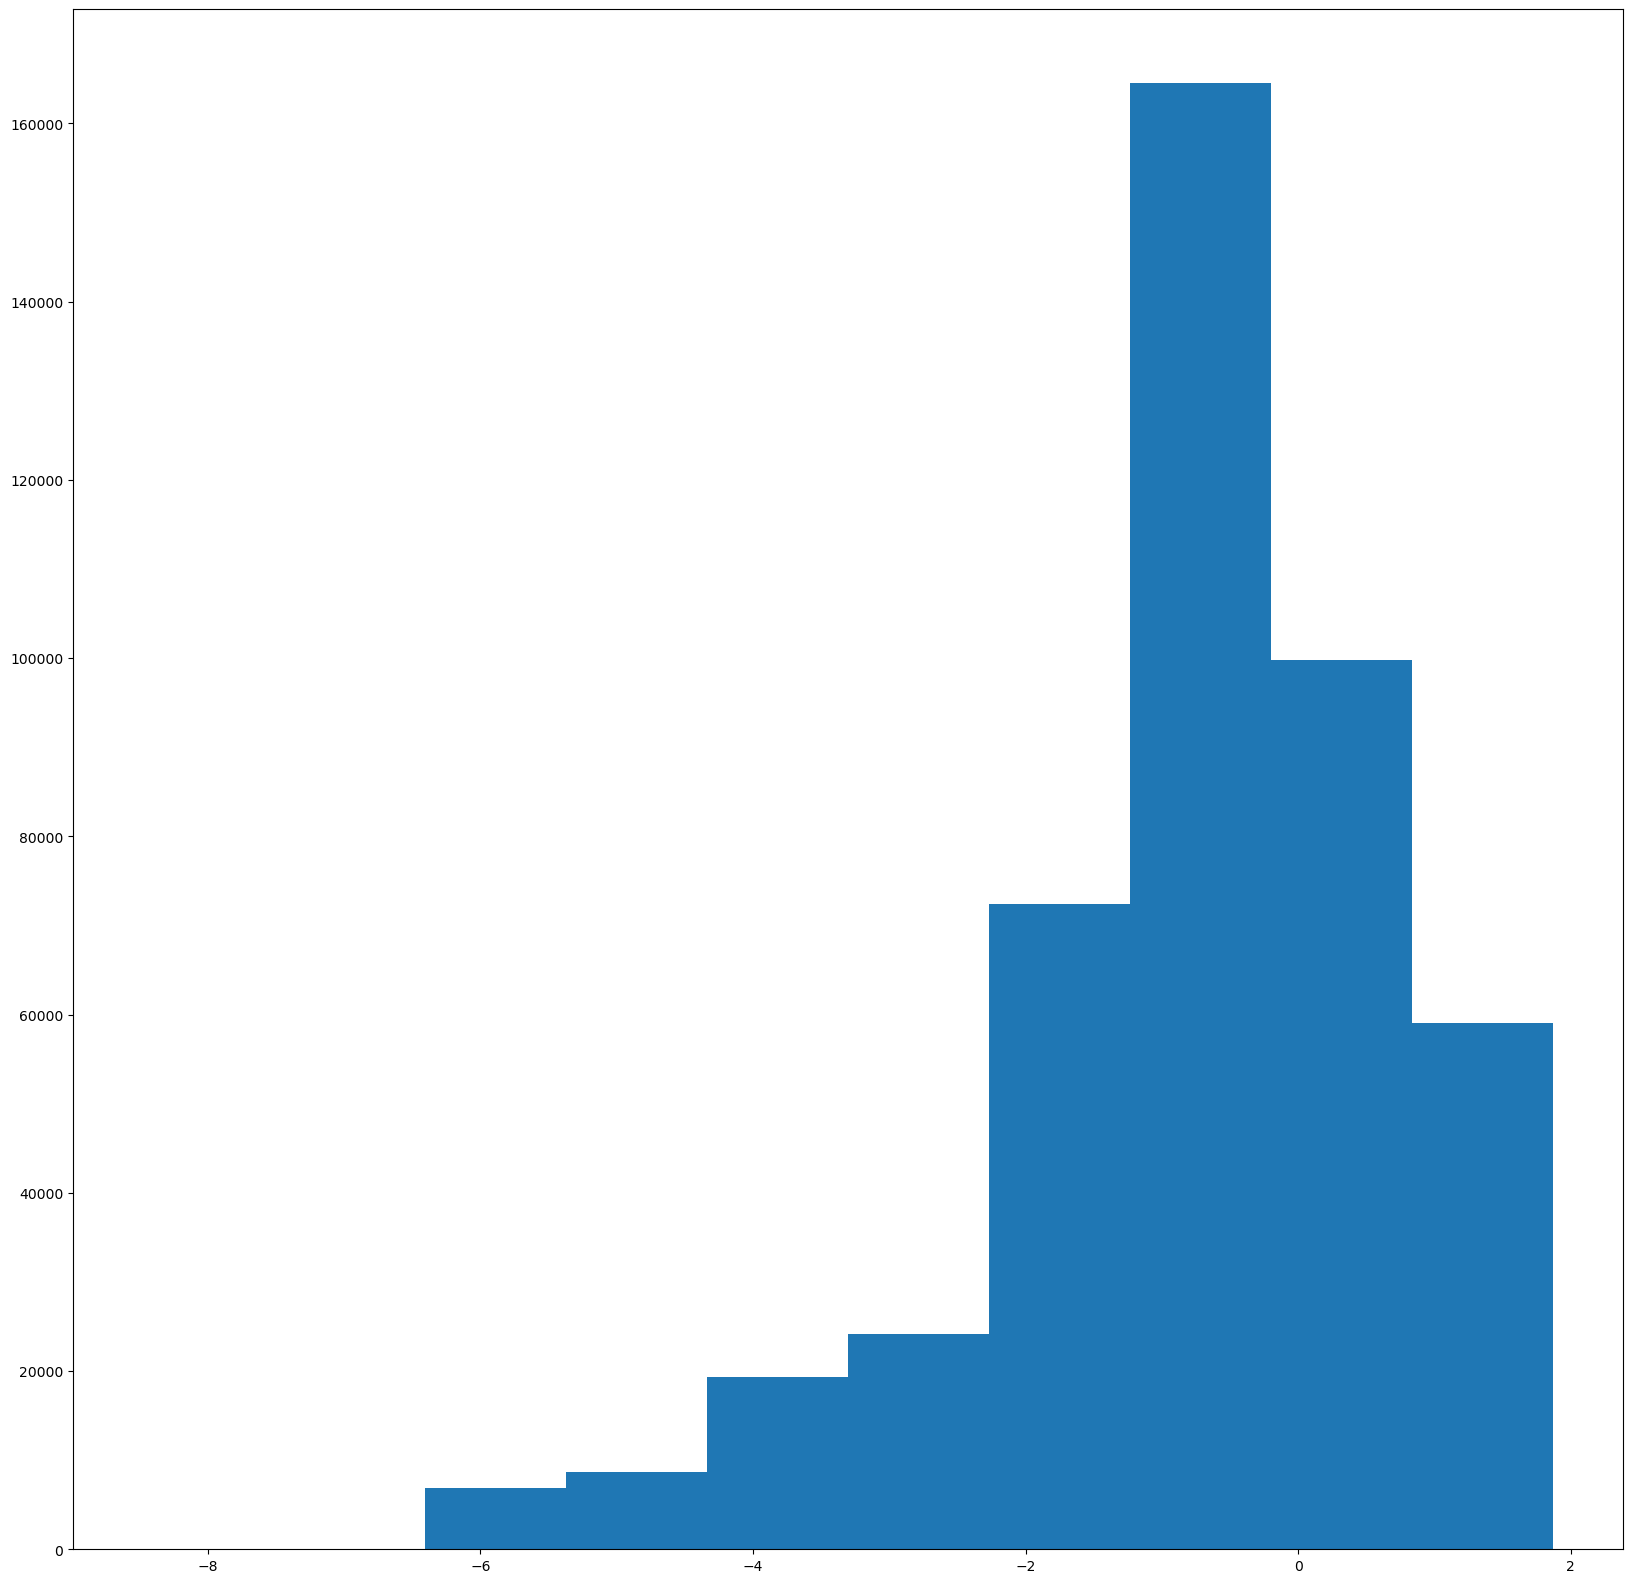

In [78]:
import matplotlib.pyplot as plt

plt.hist(X_ros_train_pt[:,0])

# 4. Decision Tree

A. Finidng a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization

==============================================Decision Tree:================================================
Max Depth = 1
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 0.886216402053833 seconds
Train: [     0      1      2 ... 454899 454900 454901] val: [ 75936  75937  75938 ... 379082 379083 379084]
Time elapsed: 0.9035491943359375 seconds
Train: [     0      1      2 ... 379082 379083 379084] val: [151894 151895 151896 ... 454899 454900 454901]
Time elapsed: 0.9066107273101807 seconds
ROC-AUC Score for val data = 0.9211016878360613
Mean precision val score: 0.9678135262862111
Mean recall val score: 0.8711766490364958
Mean f1 val score: 0.9169555972886232
------------------------------------------------------------------------------------------------------------
Max Depth = 2
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 1.55066776275

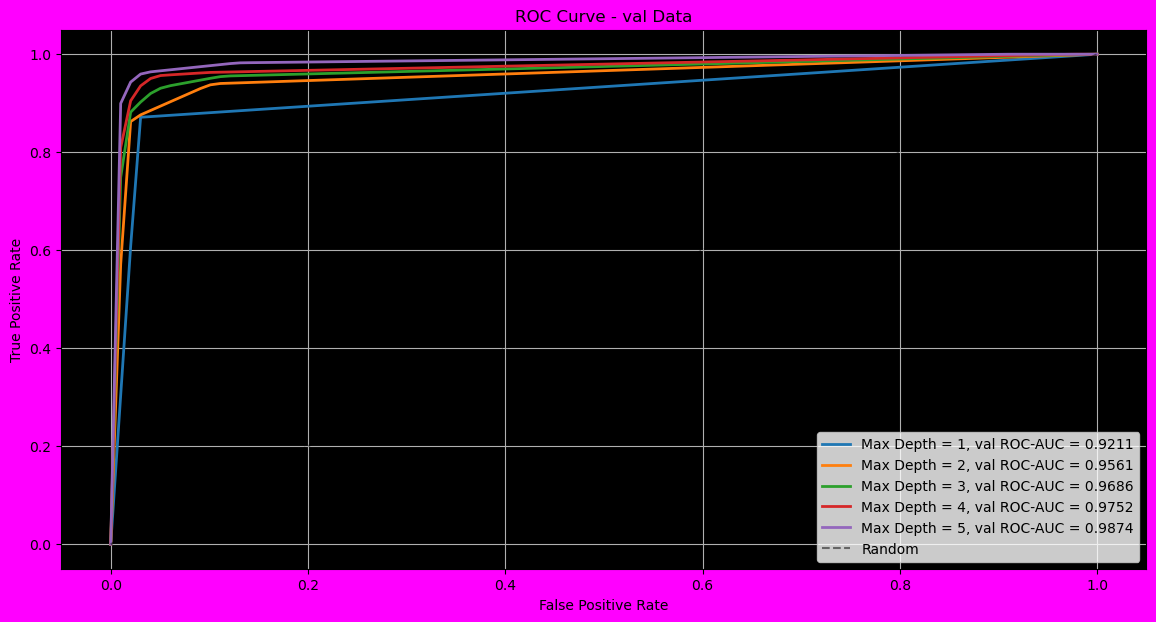

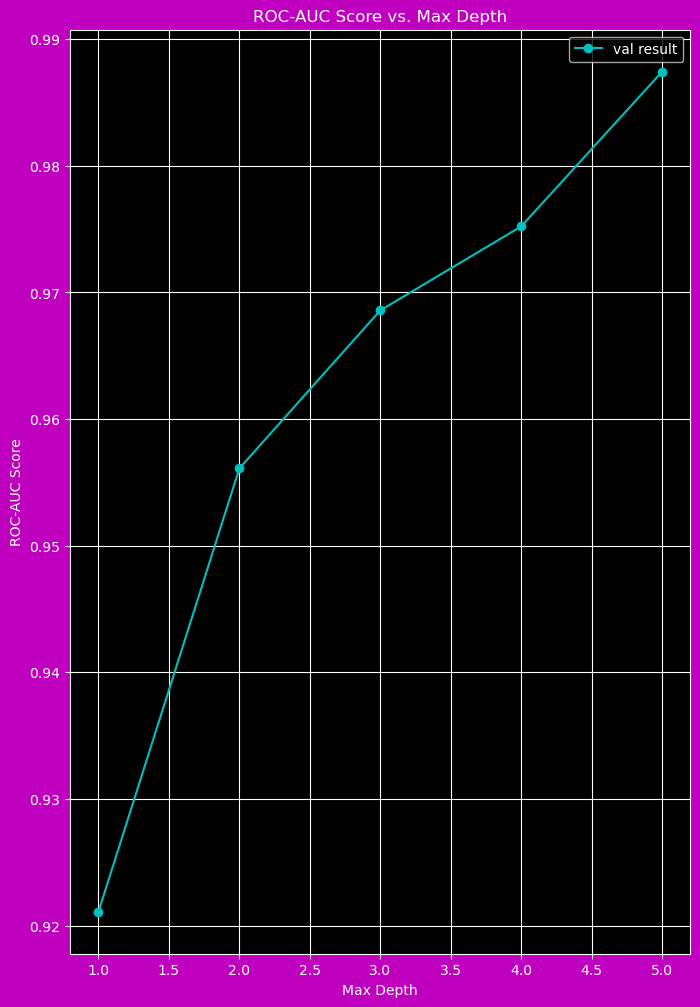





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of Max Depth: 
 [0.9211016878360613, 0.9561066498470479, 0.9685818111129348, 0.9752145303990369, 0.9874290209144636]
Best Max Depth: 5
Best Mean ROC-AUC score for val data: 0.9874290209144636
Mean precision val score for best Max Depth: 0.9736125554386047
Mean recall val score for best Max Depth: 0.9558410382895657
Mean f1 val score for best Max Depth: 0.964631942249586




In [79]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp

print("============================================================================================================")

print("==============================================Decision Tree:================================================")


# Define your values of max_depth
max_depth_values = [1, 2, 3, 4, 5]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for val data
mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2= plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Set facecolor to black for dark background
# Set background color for subplots
ax2.set_facecolor('black')

# Loop through each value of max_depth
for max_depth in max_depth_values:
    print("Max Depth =", max_depth)
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []


    # Perform cross-validation
    for train_index, val_index in skf.split(X_ros_train_pt, y_ros_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_ros_train_pt[train_index], X_ros_train_pt[val_index]
        y_train_cv, y_val_cv = y_ros_train_pt.iloc[train_index], y_ros_train_pt.iloc[val_index]

        # Create a decision tree classifier with the specified max_depth value
        dt_classifier = DecisionTreeClassifier(max_depth=max_depth)
        dt_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = dt_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)
        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculate mean ROC-AUC scores for val data
    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of C
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='Max Depth = ' + str(max_depth) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("==================================Decision Tree Has Run Successfully:======================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plot ROC curve for random classifier
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Set labels and title for ROC curves
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(max_depth_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('Max Depth')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. Max Depth')
    # plt.xscale('log')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for val data for all values of Max Depth
print("Mean ROC-AUC scores for val data for all values of Max Depth: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_max_depth = max_depth_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best Max Depth:", best_max_depth)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("Mean precision val score for best Max Depth:", mean_precision_scores_val[best_index])
print("Mean recall val score for best Max Depth:", mean_recall_scores_val[best_index])
print("Mean f1 val score for best Max Depth:", mean_f1_scores_val[best_index])


print("============================================================================================================")
print("\n")
print("============================================================================================================")

B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import time

# Define the parameters to be tuned
params = {'max_depth': [4, 5, 6],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4],
          'criterion': ['gini', 'entropy']}

# Define the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

start_time = time.time()

# Create a GridSearchCV object with stratified cross-validation
start_time = time.time()
model_GridSearch = GridSearchCV(dt_classifier,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        return_train_score=True) 
 
# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_ros_train_pt, y_ros_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Time taken: 91.33 seconds
Best ROC AUC score:  0.9981460788751075
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [81]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2} 0.9752145303990369
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5} 0.9752145303990369
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 10} 0.9752145303990369
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2} 0.9752145303990369
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5} 0.9752145303990369
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 10} 0.9752145303990369
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2} 0.9752145303990369
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 5} 0.9752145303990369
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 10} 0.9752145303990369
{'criterion': 'gini', 'max_depth': 5, 'min_

# 5. Random Forest

A. Finidng a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization

================================================Random Forest:==============================================
n_estimators = 10
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 8.967915534973145 seconds
Train: [     0      1      2 ... 454899 454900 454901] val: [ 75936  75937  75938 ... 379082 379083 379084]
Time elapsed: 8.75298810005188 seconds
Train: [     0      1      2 ... 379082 379083 379084] val: [151894 151895 151896 ... 454899 454900 454901]
Time elapsed: 8.968132734298706 seconds
ROC-AUC Score for val data = 0.9999846120702921
------------------------------------------------------------------------------------------------------------
n_estimators = 50
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 43.001635789871216 seconds
Train: [     0      1      2 ... 454899 454900 454901] val: [ 75936  75937  75938 ... 379082 379083 379084

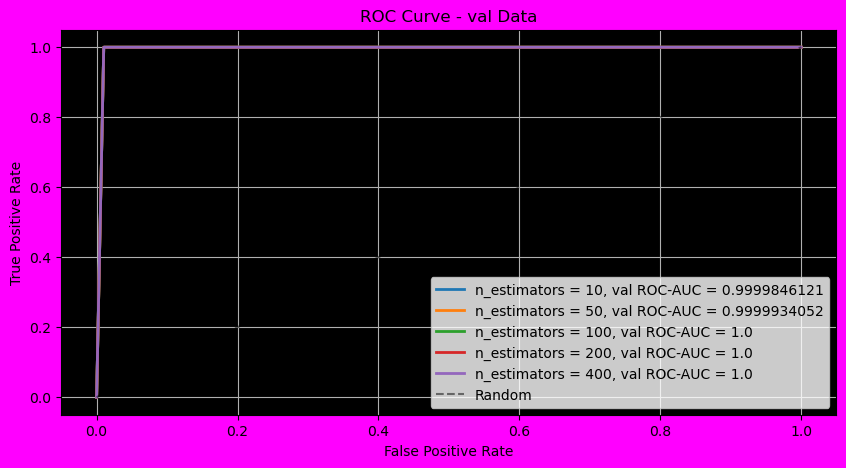

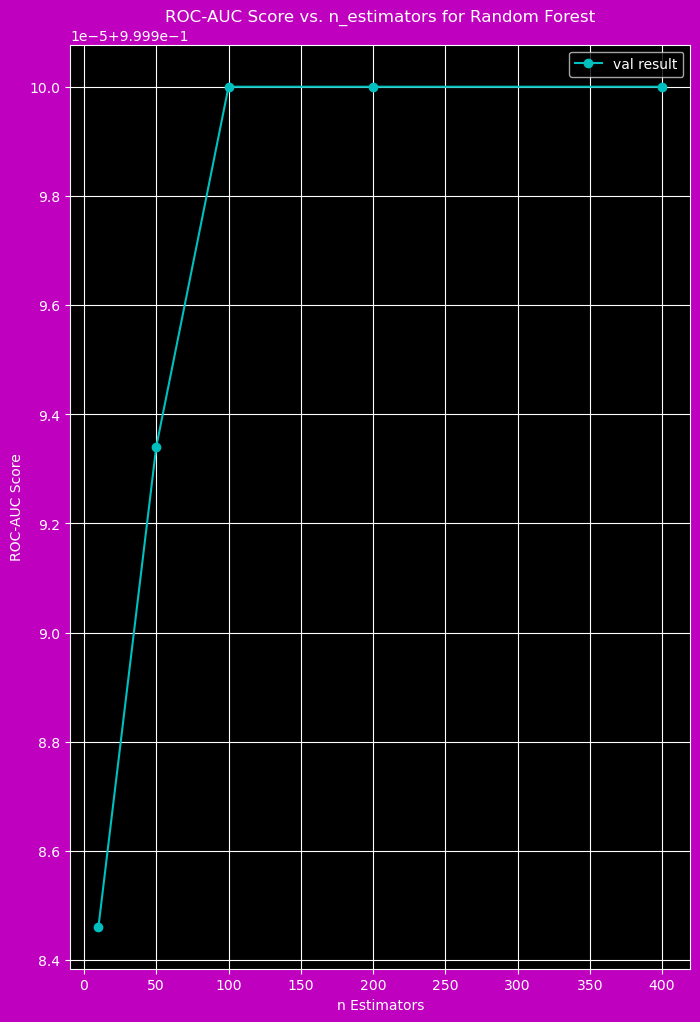





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of n Estimators: 
 [0.9999846120702921, 0.9999934051729823, 1.0, 1.0, 1.0]
Best n Estimators: 400
Best Mean ROC-AUC score for val data: 0.9874290209144636
------------------------------------------------------------------------------------------------------------
=======================================Hyperparameter Tuning over:==========================================
------------------------------------------------------------------------------------------------------------




In [82]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
from sklearn.ensemble import RandomForestClassifier

print("============================================================================================================")

print("================================================Random Forest:==============================================")

# Define your values of n_estimators
n_values = [10, 50, 100, 200, 400]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for val data
mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='fuchsia')  # Set facecolor to black for dark background
ax2.set_facecolor('black')

# Loop through each value of n_estimators
for n in n_values:
    print("n_estimators =", n)
    cv_scores_val = []
    fprs_val = []
    tprs_val = []
        
    # Perform cross-validation
    for train_index, val_index in skf.split(X_ros_train_pt, y_ros_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_ros_train_pt[train_index], X_ros_train_pt[val_index]
        y_train_cv, y_val_cv = y_ros_train_pt.iloc[train_index], y_ros_train_pt.iloc[val_index]

        rf_classifier = RandomForestClassifier(n_estimators=n)
        rf_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = rf_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculate mean ROC-AUC scores for val data
    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of n_estimators
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='n_estimators = ' + str(n) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 10)))


print("=================================Random Forest Has Run Successfully:========================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plot ROC curve for random classifier
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs n_estimators
    plt.plot(n_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('n Estimators')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. n_estimators for Random Forest')
    # plt.xscale('log')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for val data for all values of n Estimators
print("Mean ROC-AUC scores for val data for all values of n Estimators: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
if 1 in np.unique(mean_roc_auc_scores_val):
    best_n_estimators = n_values[-1]
else:
    best_index = np.argmax(mean_roc_auc_scores_val)
    best_n_estimators = n_values[best_index]
    best_mean_roc_auc = mean_roc_auc_scores_val[best_index]


print("Best n Estimators:", best_n_estimators)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)


print("------------------------------------------------------------------------------------------------------------")
print("=======================================Hyperparameter Tuning over:==========================================")
print("------------------------------------------------------------------------------------------------------------")

print("\n")
print("============================================================================================================")

B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

# Define the parameters to be tuned
params = {
    "n_estimators": [500],
    "min_samples_split": [5, 7]
    }
# Define the Random Forest classifier
rf_classifier = RandomForestClassifier()

start_time = time.time()

# Create a GridSearchCV object with stratified cross-validation
start_time = time.time()
model_GridSearch = GridSearchCV(rf_classifier,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        return_train_score=True) 
 
# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_ros_train_pt, y_ros_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Time taken: 1327.41 seconds
Best ROC AUC score:  1.0
Best hyperparameters:  {'min_samples_split': 5, 'n_estimators': 500}


In [84]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)


Mean test scores:
{'min_samples_split': 5, 'n_estimators': 500} 1.0
{'min_samples_split': 7, 'n_estimators': 500} 1.0

Rank of each hyperparameter combination:
1 {'min_samples_split': 5, 'n_estimators': 500}
2 {'min_samples_split': 7, 'n_estimators': 500}

Standard deviation of test scores:
{'min_samples_split': 5, 'n_estimators': 500} 0.0
{'min_samples_split': 7, 'n_estimators': 500} 0.0


# 6. XGBoost

A. Finidng a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization

============================================XGBoost Classifier:=============================================
Learning Rate = 0.001
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 0.9119687080383301 seconds
Train: [     0      1      2 ... 454899 454900 454901] val: [ 75936  75937  75938 ... 379082 379083 379084]
Time elapsed: 0.91546630859375 seconds
Train: [     0      1      2 ... 379082 379083 379084] val: [151894 151895 151896 ... 454899 454900 454901]
Time elapsed: 0.9120292663574219 seconds
ROC-AUC Score for val data = 0.9811782462928078
Mean precision val score: 0.9728425904342443
Mean recall val score: 0.9229328514713059
Mean f1 val score: 0.9472181196085968
------------------------------------------------------------------------------------------------------------
Learning Rate = 0.01
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed:

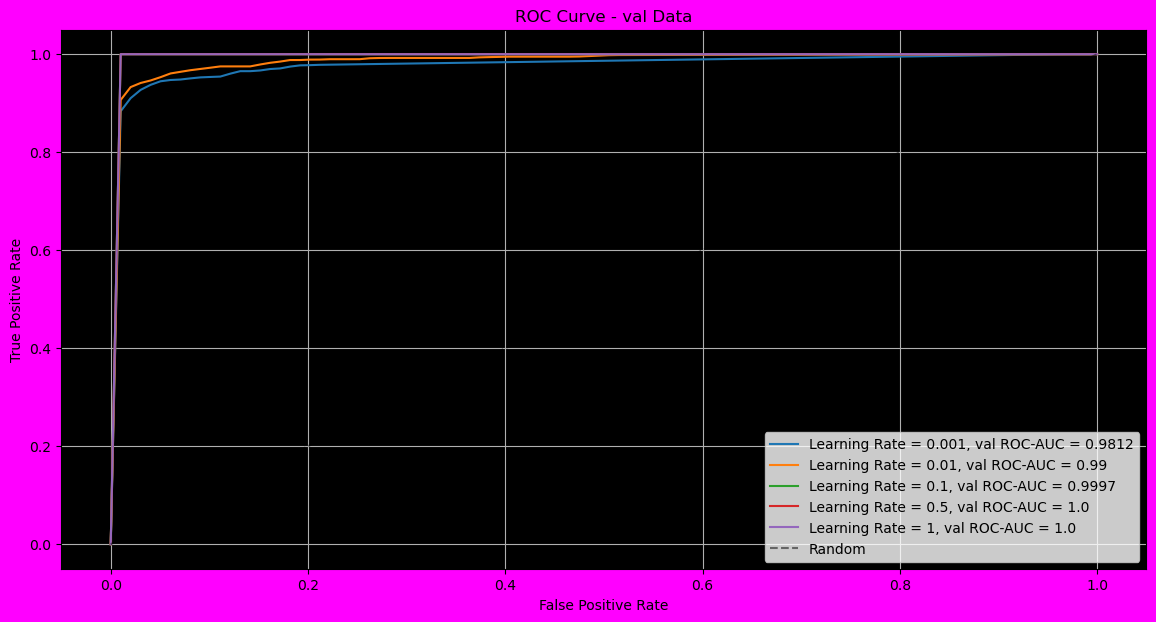

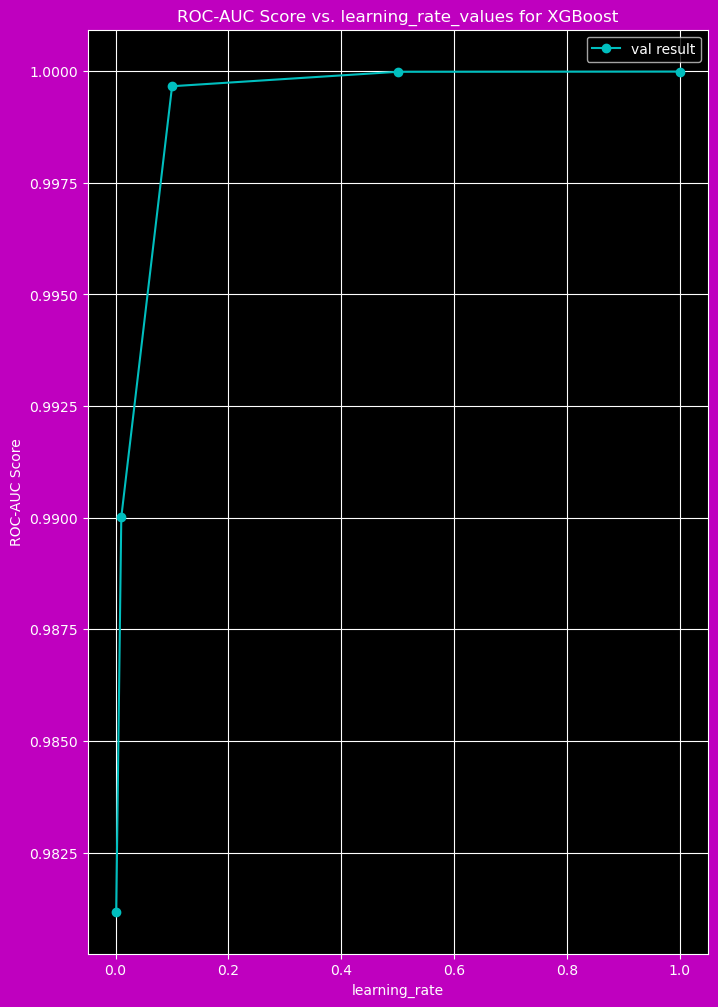





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of Learning Rate: 
 [0.9811782462928078, 0.9900083706337531, 0.9996582280790361, 0.9999815579930876, 0.9999861256989401]
Best Learning Rate : 1
Best Mean ROC-AUC score for val data: 0.9999861256989401
Mean precision val score for best Learning Rate: 0.9996396128699897
Mean recall val score for best Learning Rate: 1.0
Mean f1 val score for best Learning Rate: 0.9998197739207971




In [85]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
import xgboost as xgb

print("============================================================================================================")

print("============================================XGBoost Classifier:=============================================")


# Define your values of C
learning_rate_values = [0.001, 0.01, 0.1, 0.5, 1]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for val data
mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Set facecolor to black for dark background
# Set background color for subplots
ax2.set_facecolor('black')

# Loop through each value of C
for learning_rate in learning_rate_values:
    print("Learning Rate =", learning_rate)
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Perform cross-validation
    for train_index, val_index in skf.split(X_ros_train_pt, y_ros_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_ros_train_pt[train_index], X_ros_train_pt[val_index]
        y_train_cv, y_val_cv = y_ros_train_pt.iloc[train_index], y_ros_train_pt.iloc[val_index]


        xgb_classifier = xgb.XGBClassifier(learning_rate = learning_rate, n_estimators=100, max_depth=3, gamma=0, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', reg_alpha=0.005, reg_lambda=1, random_state=42)
        xgb_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = xgb_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)

        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")
        
    # Calculate mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of C
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='Learning Rate = ' + str(learning_rate) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("=====================================XGBoost Has Run Successfully:==========================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plot ROC curve for random classifier
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Set labels and title for ROC curves
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(learning_rate_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('learning_rate')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. learning_rate_values for XGBoost')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for val data for all values of learning_rate_values
print("Mean ROC-AUC scores for val data for all values of Learning Rate: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_learning_rate = learning_rate_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best Learning Rate :", best_learning_rate)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("Mean precision val score for best Learning Rate:", mean_precision_scores_val[best_index])
print("Mean recall val score for best Learning Rate:", mean_recall_scores_val[best_index])
print("Mean f1 val score for best Learning Rate:", mean_f1_scores_val[best_index])


print("============================================================================================================")
print("\n")
print("============================================================================================================")

B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score

In [86]:
import time
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold

params = {
    'learning_rate': [0.5, 0.6, 0.7],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 0.9],
}

# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc') # As the number of classes are 2

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(xgb_classifier, 
                        param_grid=params, 
                        scoring='roc_auc', 
                        cv=skf, 
                        n_jobs=-1, 
                        verbose=1, 
                        return_train_score=True)

# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_ros_train_pt, y_ros_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# print the evaluation result by choosing an evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Time taken: 60.94 seconds
Best ROC AUC score:  0.9999940388186891
Best hyperparameters:  {'learning_rate': 0.5, 'max_depth': 5, 'subsample': 0.7}


In [87]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'learning_rate': 0.5, 'max_depth': 3, 'subsample': 0.5} 0.9999823992973718
{'learning_rate': 0.5, 'max_depth': 3, 'subsample': 0.7} 0.9999804704675467
{'learning_rate': 0.5, 'max_depth': 3, 'subsample': 0.9} 0.9999820922166688
{'learning_rate': 0.5, 'max_depth': 5, 'subsample': 0.5} 0.9999907835776741
{'learning_rate': 0.5, 'max_depth': 5, 'subsample': 0.7} 0.9999940388186891
{'learning_rate': 0.5, 'max_depth': 5, 'subsample': 0.9} 0.9999919618849805
{'learning_rate': 0.5, 'max_depth': 7, 'subsample': 0.5} 0.9999891158432819
{'learning_rate': 0.5, 'max_depth': 7, 'subsample': 0.7} 0.9999927088121816
{'learning_rate': 0.5, 'max_depth': 7, 'subsample': 0.9} 0.9999870588867809
{'learning_rate': 0.6, 'max_depth': 3, 'subsample': 0.5} 0.9999854569698936
{'learning_rate': 0.6, 'max_depth': 3, 'subsample': 0.7} 0.9999861053737987
{'learning_rate': 0.6, 'max_depth': 3, 'subsample': 0.9} 0.9999876620882673
{'learning_rate': 0.6, 'max_depth': 5, 'subsample': 0.5} 0.99999142279

# Observation

A. CROSS VALIDATION -  ROC-AUC Score of the models and best hyperparameters on Imbalanced data

DecisionTreeClassifier {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2} =

Best Mean ROC-AUC score for val data: 0.9981460788751075 [Before Oversampling {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = 0.9337472016466822]
Mean precision val score for best Max Depth: 0.9736125554386047 [Before Oversampling {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = 0.8480952241800844]
Mean recall val score for best Max Depth: 0.9558410382895657 [Before Oversampling {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = 0.71578379211967]
Mean f1 val score for best Max Depth: 0.964631942249586 [Before Oversampling {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = 0.7752315571186218]
RandomForestClassifier {'min_samples_split': 5, 'n_estimators': 500} =

1.0 [Before Oversampling {'min_samples_split': 5, 'n_estimators': 500} = 0.9646808744238831]
XGBClassifier {'learning_rate': 0.6, 'max_depth': 5, 'subsample': 0.7} =

Best Mean ROC-AUC score for val data: 0.9999960678244962 [Before Oversampling {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = 0.9848866713890976]
Mean precision val score for best Learning Rate: 0.9995517600748944 [Before Oversampling {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = 0.9233400094242072]
Mean recall val score for best Learning Rate: 1.0 [Before Oversampling {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = 0.779204256303493]
Mean f1 val score for best Learning Rate: 0.9997758279719619 [Before Oversampling {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = 0.8448234879500908]

Proceed with the model which shows the best result

- Apply the best hyperparameter on the model
- Predict on the test dataset

In [88]:
X_test_saved.head()

V1        V2        V3        V4        V5        V6        V7  \
263020 -0.674466  1.408105 -1.110622 -1.328366  1.388996 -1.308439  1.885879   
11378  -2.829816 -2.765149  2.537793 -1.074580  2.842559 -2.153536 -1.795519   
147283 -3.576495  2.318422  1.306985  3.263665  1.127818  2.865246  1.444125   
219439  2.060386 -0.015382 -1.082544  0.386019 -0.024331 -1.074935  0.207792   
36939   1.209965  1.384303 -1.343531  1.763636  0.662351 -2.113384  0.854039   

              V8        V9       V10  ...       V20       V21       V22  \
263020 -0.614233  0.311652  0.650757  ...  0.394322  0.080084  0.810034   
11378  -0.250020  3.073504 -1.000418  ... -0.515765 -0.295555  0.109305   
147283 -0.718922  1.874046  7.398491  ...  2.034786 -1.060151  0.016867   
219439 -0.338140  0.455091  0.047859  ... -0.192024 -0.281684 -0.639426   
36939  -0.475963 -0.629658 -1.579654  ...  0.009083 -0.164015 -0.328294   

             V23       V24       V25       V26       V27       V28    Amount  
263020 -0.224327  0.707899 -0.135837  0.045102  0.533837  0.291319  0.014079  
11378  -0.813272  0.042996 -0.027660 -0.910247  0.110802 -0.511938 -0.142897  
147283 -0.132058 -1.483996 -0.296011  0.062823  0.552411  0.509764  0.761228  
219439  0.331818 -0.067584 -0.283675  0.203529 -0.063621 -0.060077 -0.295791  
36939  -0.154631  0.619449  0.818998 -0.330525  0.046884  0.104527 -0.288610  

[5 rows x 29 columns]

In [89]:
y_test_saved.head()

263020    0
11378     0
147283    0
219439    0
36939     0
Name: Class, dtype: int64

In [90]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field
scaler = RobustScaler()

# Transforming the test data
X_test_saved[["Amount"]] = scaler.fit_transform(X_test_saved[["Amount"]])

In [91]:
X_test_saved.head()

V1        V2        V3        V4        V5        V6        V7  \
263020 -0.674466  1.408105 -1.110622 -1.328366  1.388996 -1.308439  1.885879   
11378  -2.829816 -2.765149  2.537793 -1.074580  2.842559 -2.153536 -1.795519   
147283 -3.576495  2.318422  1.306985  3.263665  1.127818  2.865246  1.444125   
219439  2.060386 -0.015382 -1.082544  0.386019 -0.024331 -1.074935  0.207792   
36939   1.209965  1.384303 -1.343531  1.763636  0.662351 -2.113384  0.854039   

              V8        V9       V10  ...       V20       V21       V22  \
263020 -0.614233  0.311652  0.650757  ...  0.394322  0.080084  0.810034   
11378  -0.250020  3.073504 -1.000418  ... -0.515765 -0.295555  0.109305   
147283 -0.718922  1.874046  7.398491  ...  2.034786 -1.060151  0.016867   
219439 -0.338140  0.455091  0.047859  ... -0.192024 -0.281684 -0.639426   
36939  -0.475963 -0.629658 -1.579654  ...  0.009083 -0.164015 -0.328294   

             V23       V24       V25       V26       V27       V28    Amount  
263020 -0.224327  0.707899 -0.135837  0.045102  0.533837  0.291319  0.014079  
11378  -0.813272  0.042996 -0.027660 -0.910247  0.110802 -0.511938 -0.142897  
147283 -0.132058 -1.483996 -0.296011  0.062823  0.552411  0.509764  0.761228  
219439  0.331818 -0.067584 -0.283675  0.203529 -0.063621 -0.060077 -0.295791  
36939  -0.154631  0.619449  0.818998 -0.330525  0.046884  0.104527 -0.288610  

[5 rows x 29 columns]

In [92]:
ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_test_saved_ros, y_test_saved_ros = ros.fit_resample(X_test_saved,y_test_saved)

In [93]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=1, min_samples_split=2)   
clf.fit(X_ros_train_pt, y_ros_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_ros)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_ros, y_score=y_pred_proba[:, 1])
print("Decision Tree Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_ros)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_ros, y_pred)
preci_sion = precision_score(y_test_saved_ros, y_pred)
re_call = recall_score(y_test_saved_ros, y_pred)
# print the results
print("Decision Tree Classifier F1-Score on Test Set =", f1)
print("Decision Tree Classifier Precision on Test Set =", preci_sion)
print("Decision Tree Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

print("============================================================================================================")

Decision Tree Classifier ROC-AUC Score on Test Set = 0.9356105342166989
Decision Tree Classifier F1-Score on Test Set = 0.9189785371841284
Decision Tree Classifier Precision on Test Set = 0.929737415186365
Decision Tree Classifier Recall on Test Set = 0.9084658131682611
Time taken: 4.05 seconds


In [94]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = XGBClassifier(learning_rate=0.1, max_depth=3, subsample=0.5, objective='binary:logistic', eval_metric='auc') 
clf.fit(X_ros_train_pt, y_ros_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_ros)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_ros, y_score=y_pred_proba[:, 1])
print("XGBOOST Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_ros)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_ros, y_pred)
preci_sion = precision_score(y_test_saved_ros, y_pred)
re_call = recall_score(y_test_saved_ros, y_pred)
# print the results
print("XGBOOST Classifier F1-Score on Test Set =", f1)
print("XGBOOST Classifier Precision on Test Set =", preci_sion)
print("XGBOOST Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

XGBOOST Classifier ROC-AUC Score on Test Set = 0.9761486314363503
XGBOOST Classifier F1-Score on Test Set = 0.9371487821361453
XGBOOST Classifier Precision on Test Set = 0.9894629835982249
XGBOOST Classifier Recall on Test Set = 0.8900886325267304
Time taken: 1.32 seconds


In [95]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = RandomForestClassifier(min_samples_split=5, n_estimators=500)  
clf.fit(X_ros_train_pt, y_ros_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_ros)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_ros, y_score=y_pred_proba[:, 1])
print("Random Forest Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_ros)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_ros, y_pred)
preci_sion = precision_score(y_test_saved_ros, y_pred)
re_call = recall_score(y_test_saved_ros, y_pred)
# print the results
print("Random Forest Classifier F1-Score on Test Set =", f1)
print("Random Forest Classifier Precision on Test Set =", preci_sion)
print("Random Forest Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

print("============================================================================================================")

Random Forest Classifier ROC-AUC Score on Test Set = 0.9696867052486534
Random Forest Classifier F1-Score on Test Set = 0.8054149425528786
Random Forest Classifier Precision on Test Set = 0.9997653439015487
Random Forest Classifier Recall on Test Set = 0.6743282217220034
Time taken: 702.48 seconds


- Based on ROC-AUC Scores-

KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier & XGBClassifier models scores increase after Oversampling.
LogisticRegression score decreased. But, the best model is XGBClassifier

- Based on F1 Scores-

LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier & XGBClassifier models scores increase after Oversampling.
RandomForestClassifier score decreased. But, the best model is XGBClassifier


Print the important features of the best model to understand the dataset
This will not give much explanation on the already transformed dataset
But it will help us in understanding if the dataset is not PCA transformed

Top var = 14
2nd Top var = 10
3rd Top var = 4


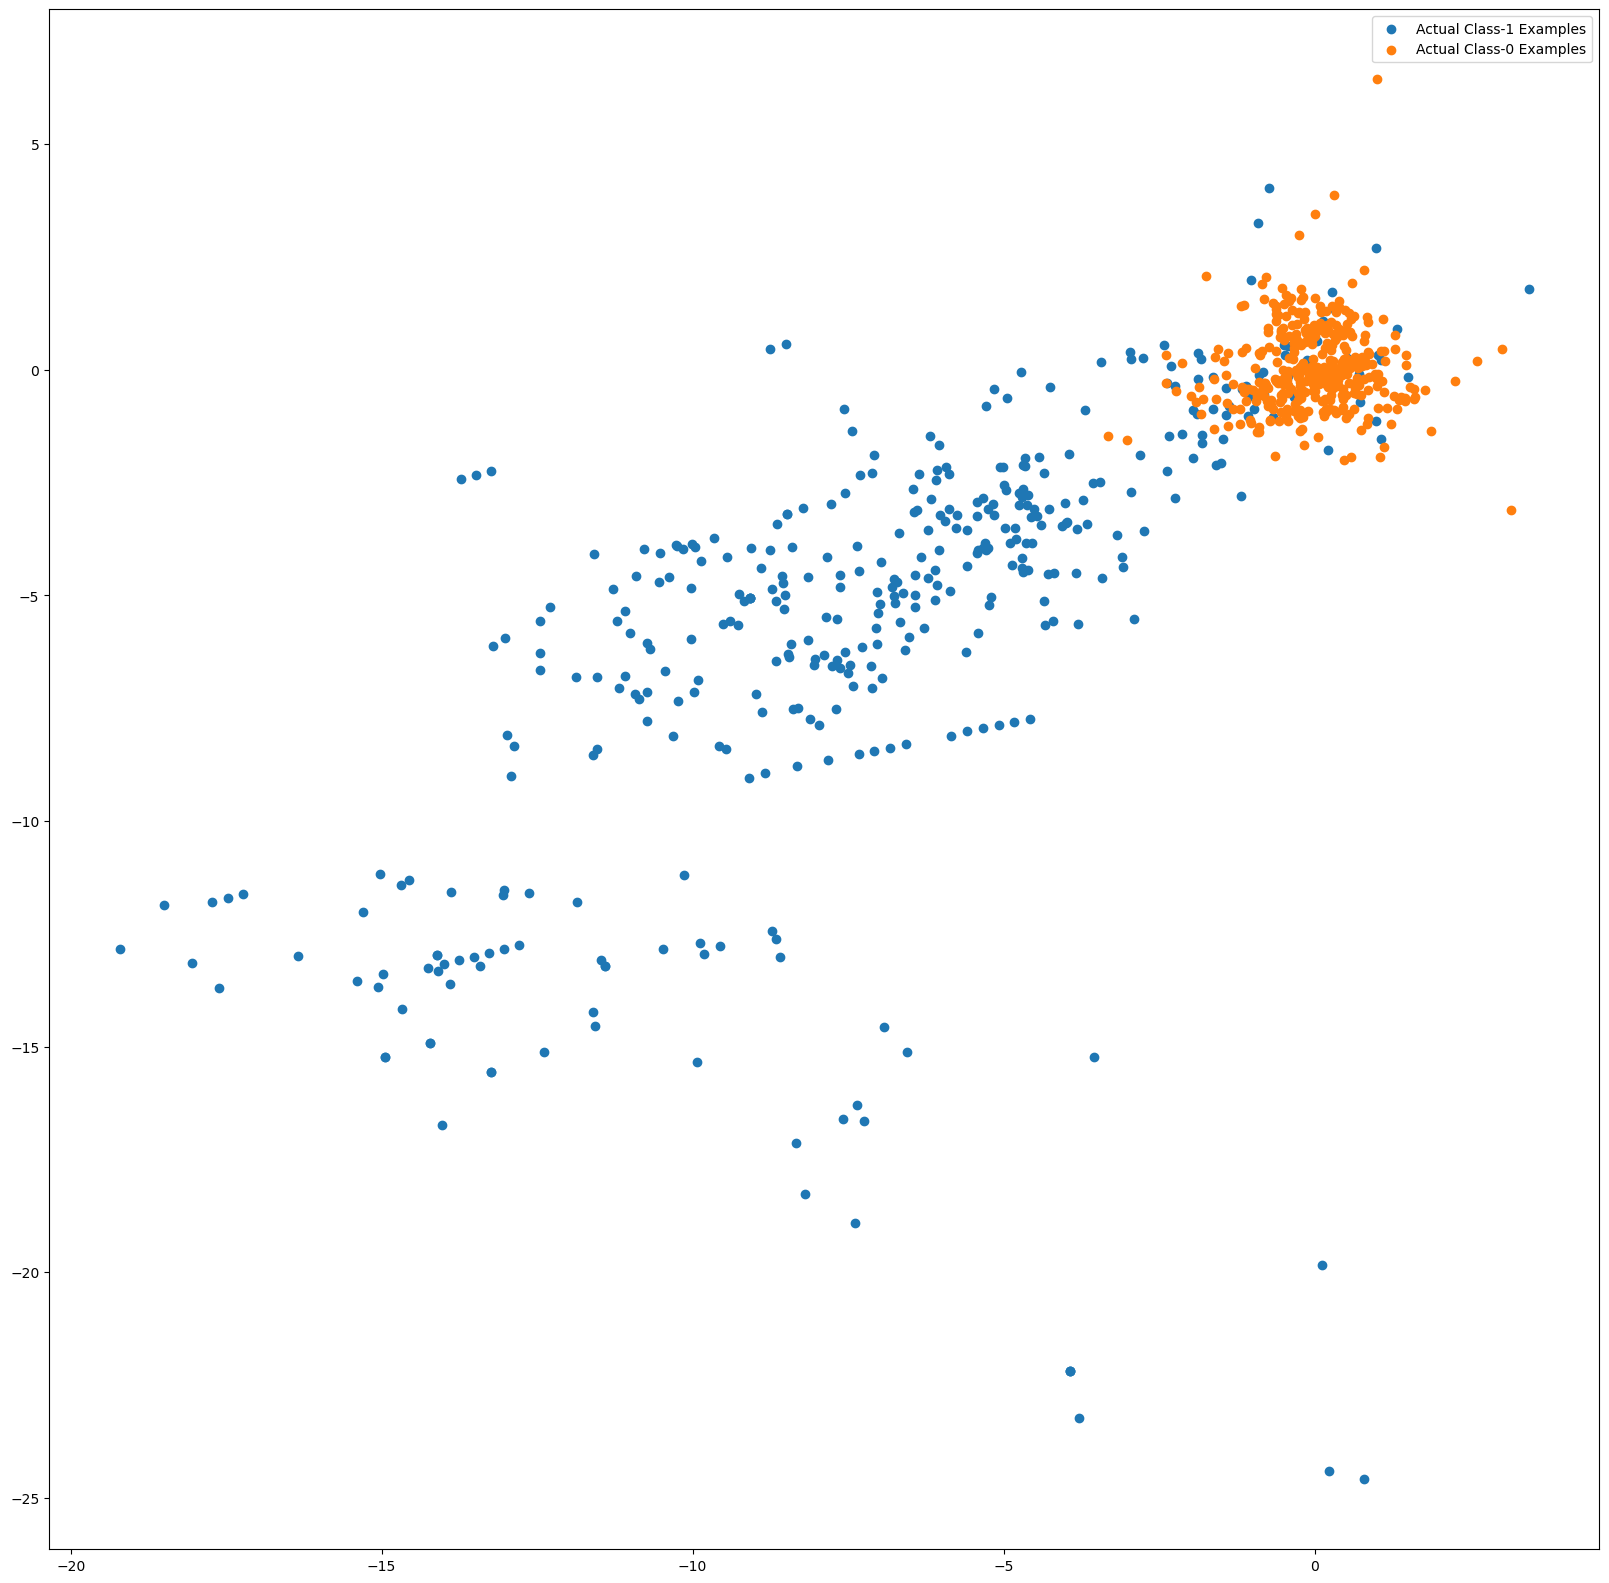

In [96]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

II. SMOTE¶
Synthetic Minority Over-sampling Technique

Build different models on the balanced dataset and see the result

In [97]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

By setting a fixed random_state value, the SMOTE algorithm will use the same randomly generated numbers each time the code is run, which will produce the same synthetic samples for each minority class observation. This ensures that the training and validation process is consistent and can be repeated, which is important when developing and testing machine learning models.

Therefore, using random_state=0 in the SMOTE constructor helps ensure that the model performance will be consistent and reproducible when the code is re-run. However, it is important to note that changing the random seed will produce a different set of synthetic samples and may result in different performance metrics.

In [98]:
from imblearn.over_sampling import SMOTE

# Define the SMOTE
smote = over_sampling.SMOTE(random_state=0)

# Resample the training data using SMOTE
X_smote_train_pt, y_smote_train_pt = smote.fit_resample(X_train_pt, y_train_pt)

Print the class distribution after applying SMOTE

NameError: name 'S' is not defined

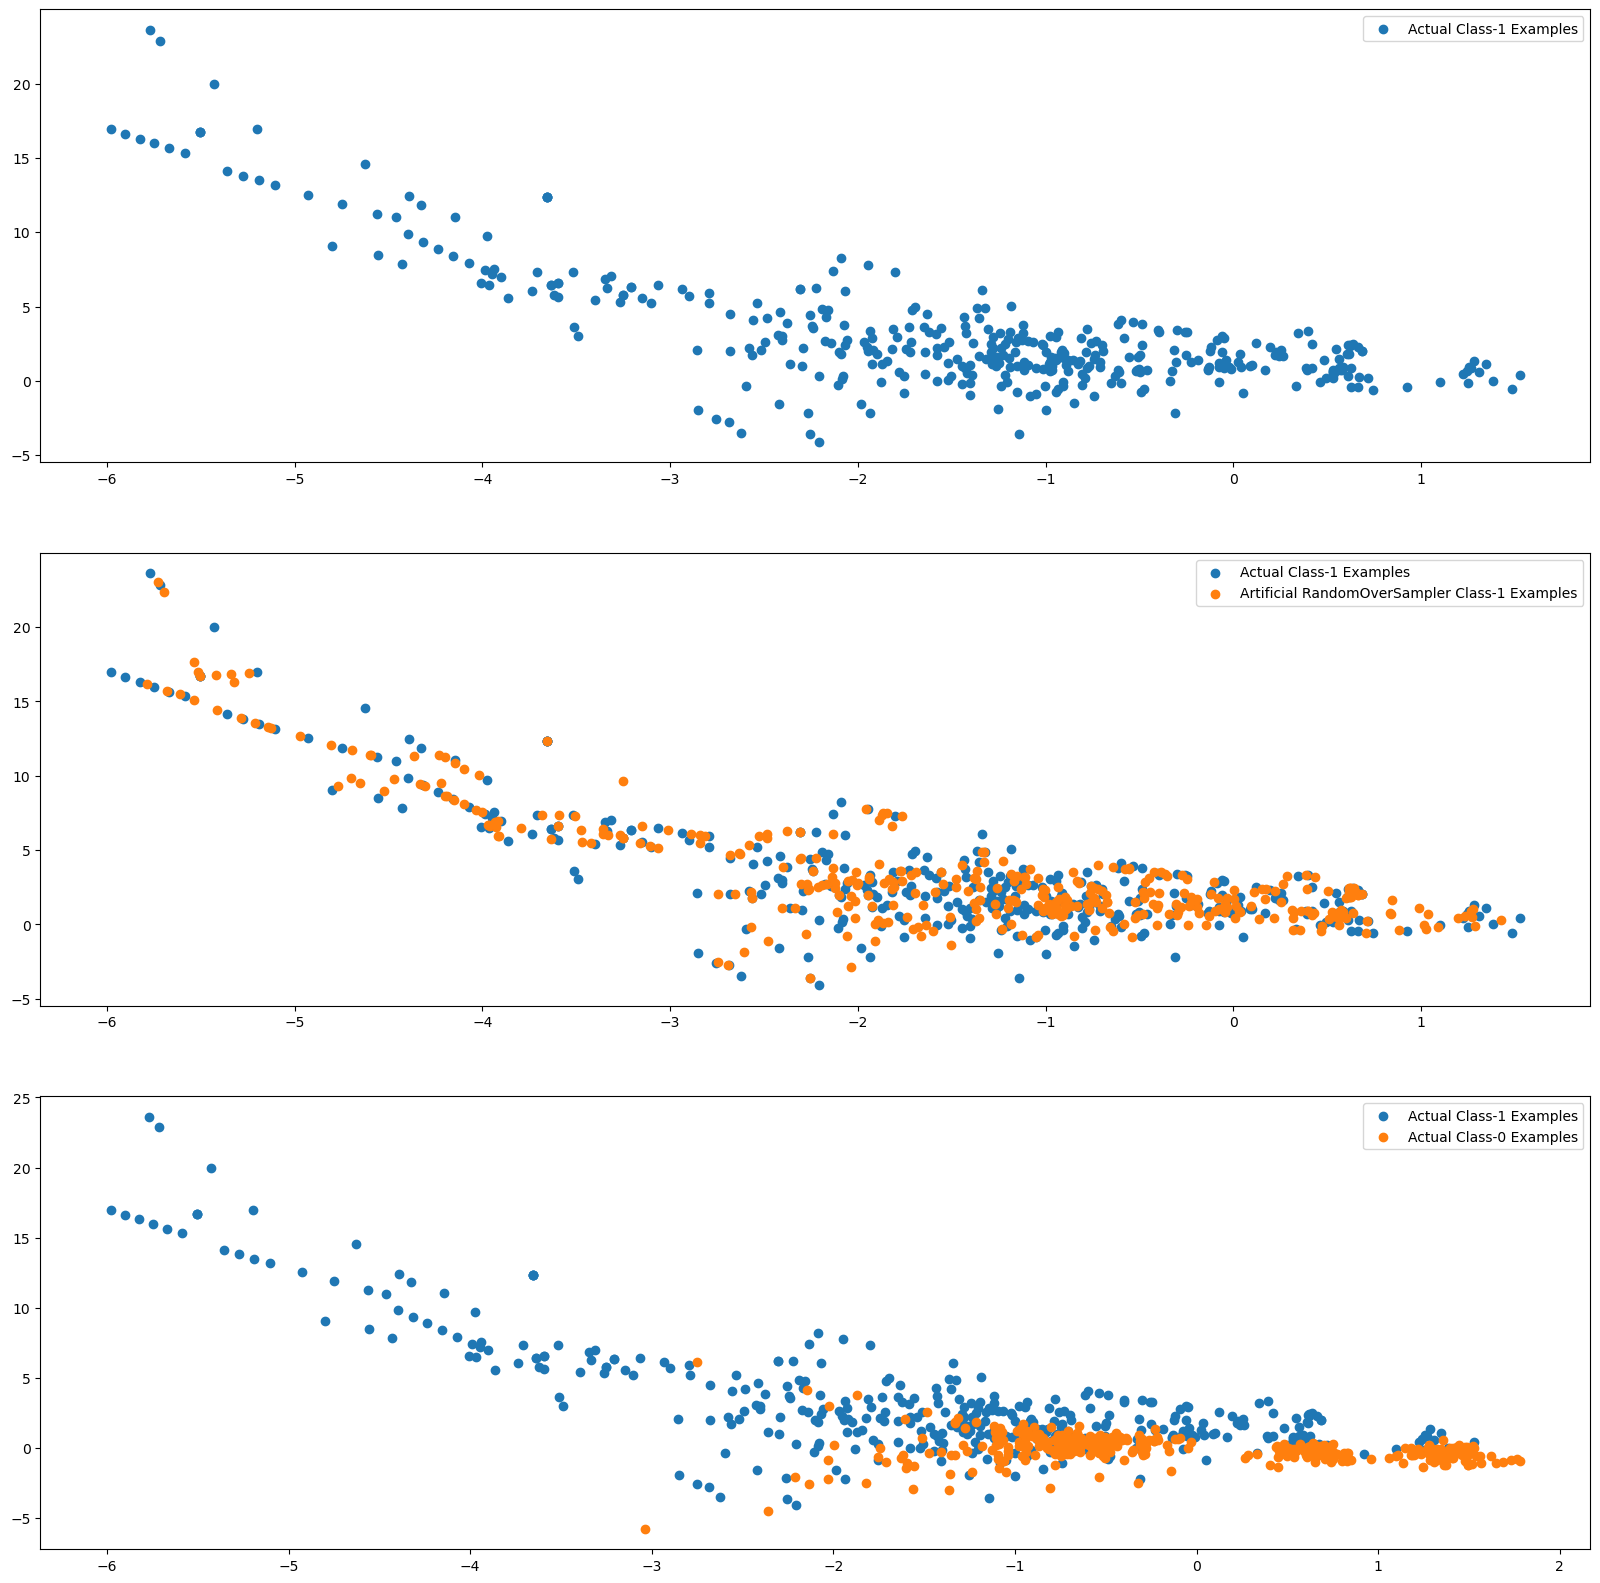

In [99]:
import warnings
warnings.filterwarnings("ignore")

# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train_pt and y_train_pt respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_smote_train_pt_1 = X_smote_train_pt[X_train_pt.shape[0]:]

X_train_pt_1 = np.array(X_train_pt)[np.where(y_train_pt==1.0)]
X_train_pt_0 = np.array(X_train_pt)[np.where(y_train_pt==0.0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_smote_train_pt_1[:X_train_pt_1.shape[0], 0], X_smote_train_pt_1[:X_train_pt_1.shape[0], 1],
            label='Artificial RandomOverSampler Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_pt_0[:X_train_pt_1.shape[0], 0], X_train_pt_0[:X_train_pt_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()
S

SOME MORE VISUALIZATION

- Check the distribution of your target variable: We use value_counts() method to check the distribution of your target variable.
- y_ros_train_pt is your target variable, we can use the following code to check the distribution of its values:

In [100]:
print(y_smote_train_pt.value_counts())

0    227451
1    227451
Name: Class, dtype: int64


<Axes: xlabel='Class', ylabel='count'>

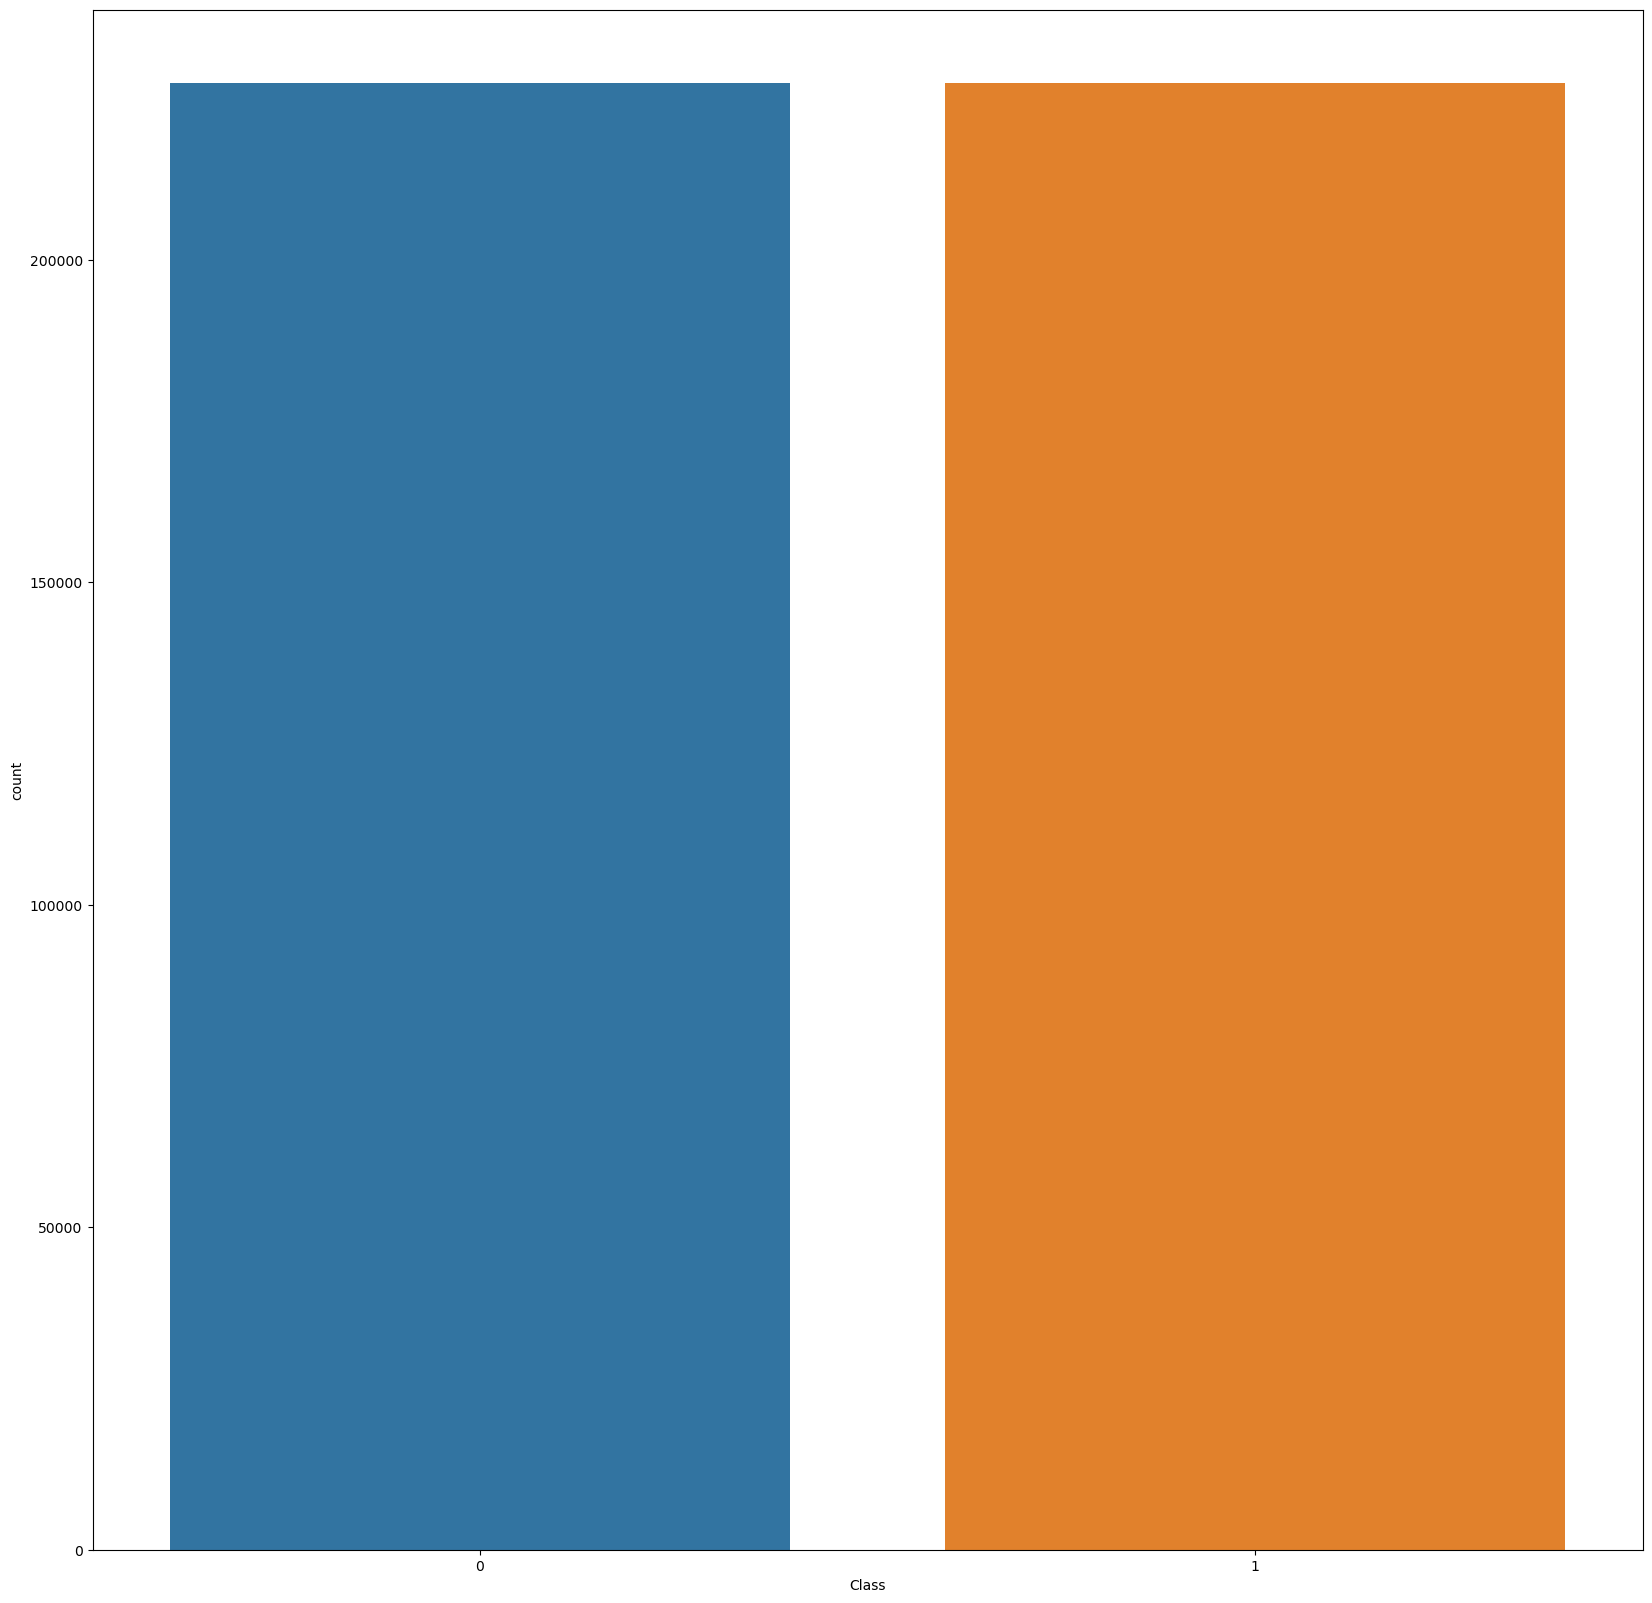

In [101]:
import seaborn as sns

sns.countplot(x=y_smote_train_pt)

(array([2.00000e+00, 1.20000e+01, 6.48400e+03, 8.61800e+03, 1.85730e+04,
        2.23130e+04, 6.63820e+04, 1.69144e+05, 1.04130e+05, 5.92440e+04]),
 array([-8.47181275, -7.43814201, -6.40447126, -5.37080052, -4.33712977,
        -3.30345903, -2.26978828, -1.23611754, -0.20244679,  0.83122396,
         1.8648947 ]),
 <BarContainer object of 10 artists>)

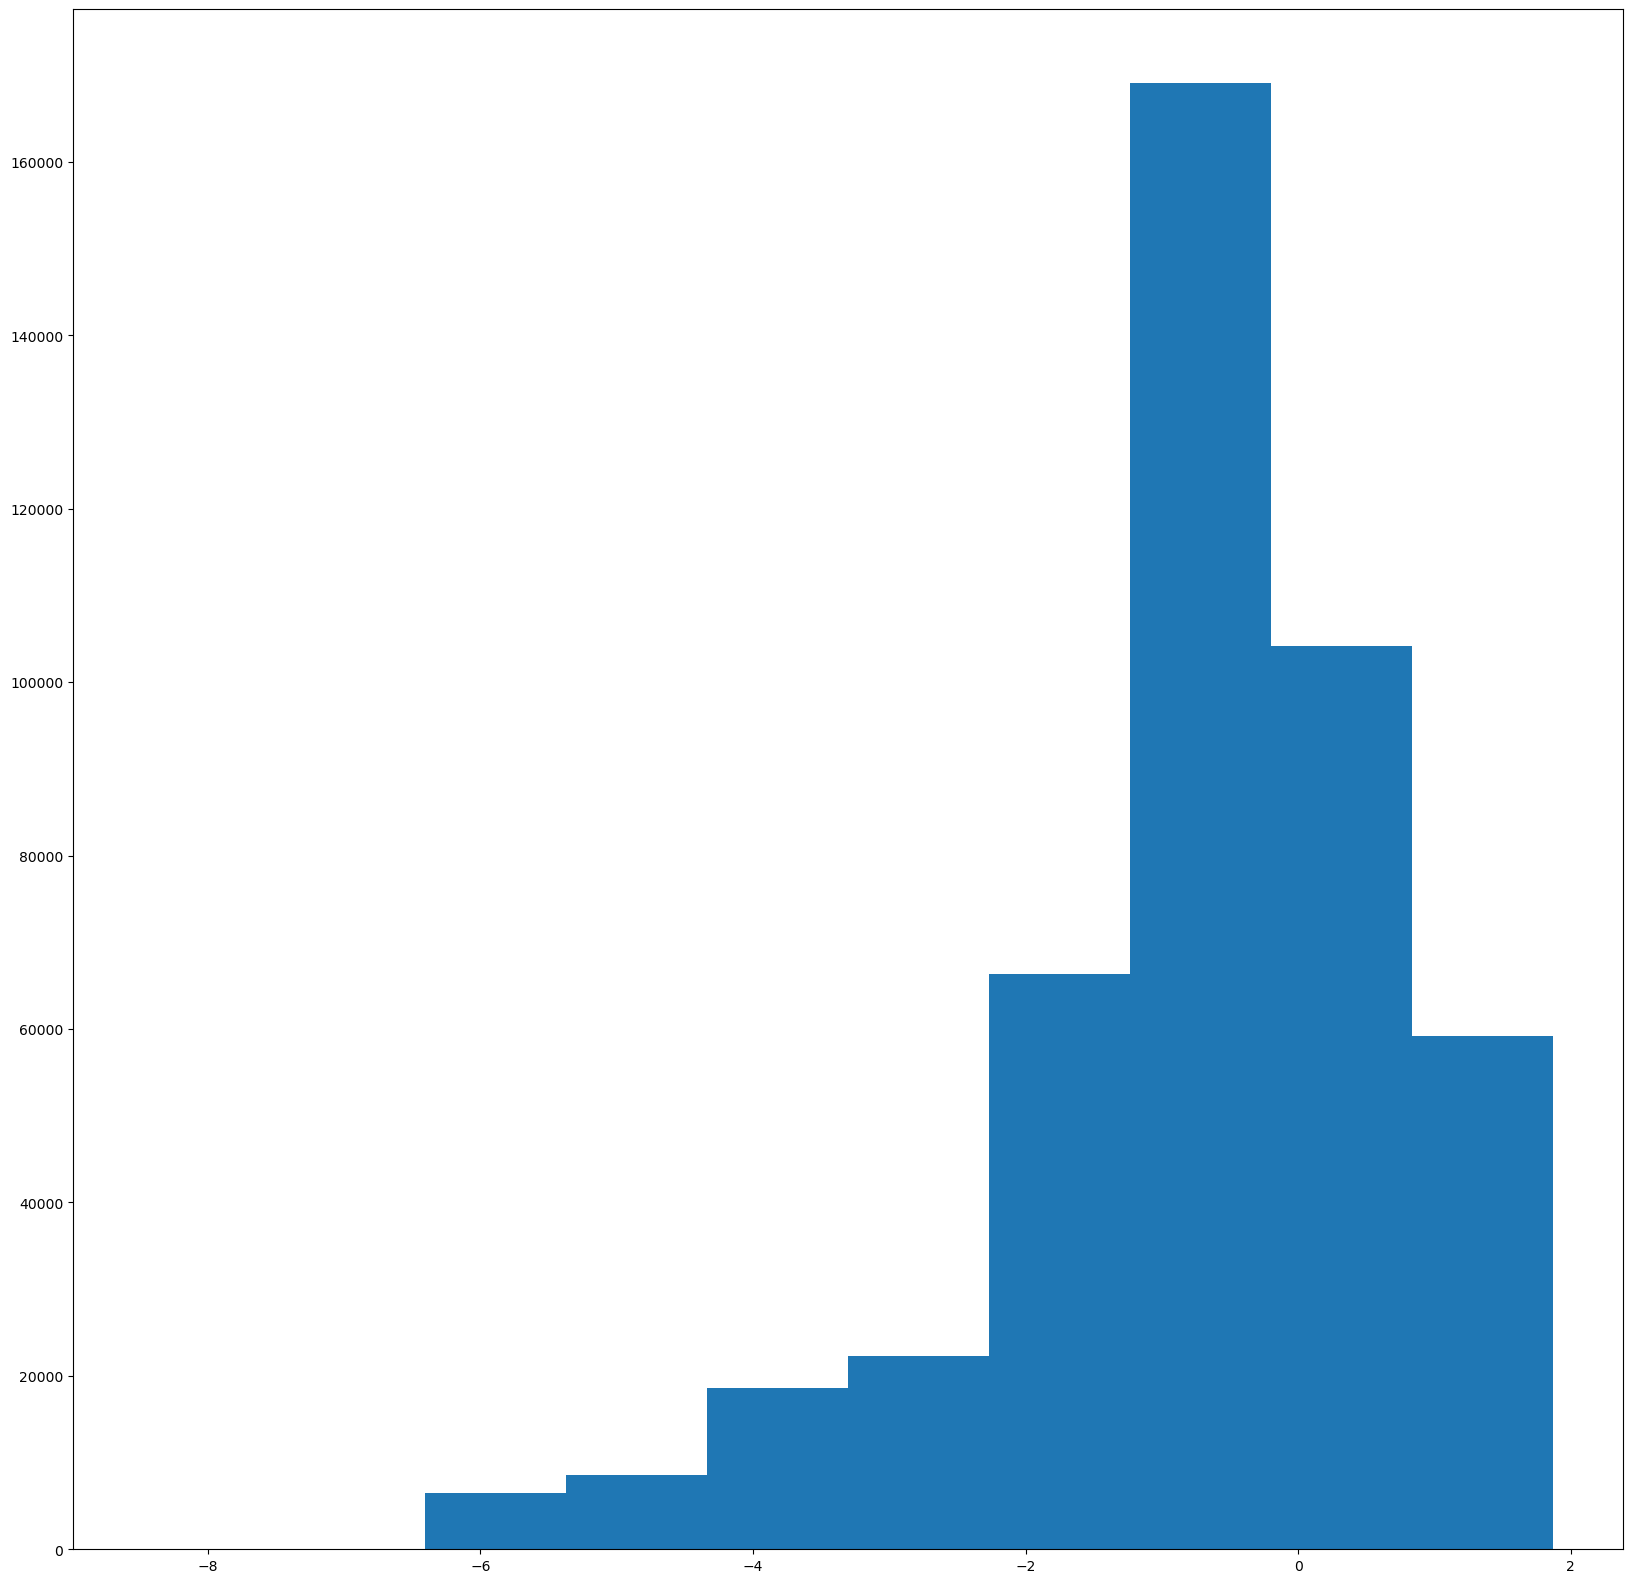

In [102]:
import matplotlib.pyplot as plt

plt.hist(X_smote_train_pt[:,0])

#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters

Build models on other algorithms to see the better performing on SMOTE

# 4. Decision Tree

A. Finidng a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization

==============================================Decision Tree:================================================
Max Depth = 1
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 1.3132498264312744 seconds
Train: [     0      1      2 ... 454899 454900 454901] val: [ 75936  75937  75938 ... 379082 379083 379084]
Time elapsed: 1.258683681488037 seconds
Train: [     0      1      2 ... 379082 379083 379084] val: [151894 151895 151896 ... 454899 454900 454901]
Time elapsed: 1.2733383178710938 seconds
ROC-AUC Score for val data = 0.9236033255514374
Mean precision val score: 0.9678815927340984
Mean recall val score: 0.8762854416995308
Mean f1 val score: 0.9198087736064844
------------------------------------------------------------------------------------------------------------
Max Depth = 2
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 2.36029648780

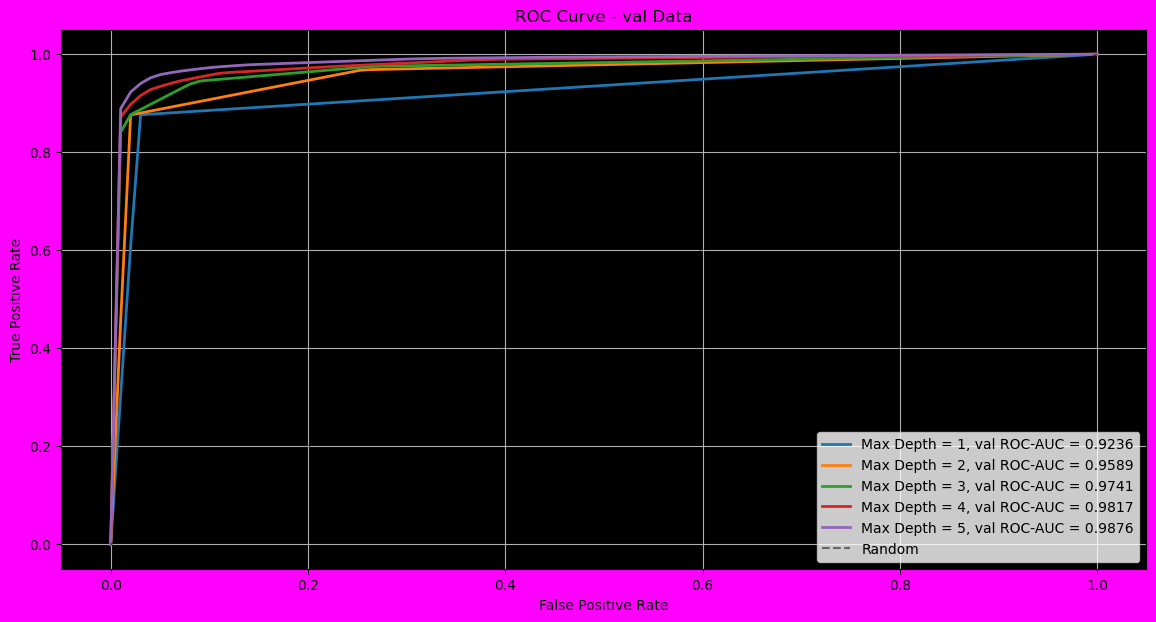

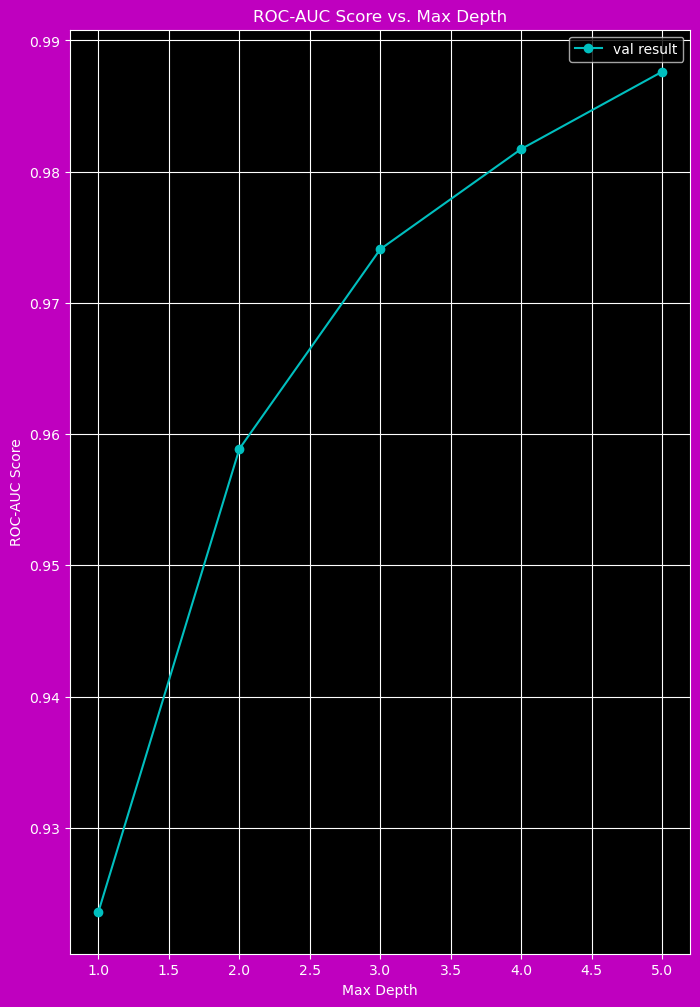





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of Max Depth: 
 [0.9236033255514374, 0.9588771035915595, 0.9740918136010585, 0.9817271492943679, 0.9876182390507088]
Best Max Depth: 5
Best Mean ROC-AUC score for val data: 0.9876182390507088
Mean precision val score for best Max Depth: 0.9559803470320745
Mean recall val score for best Max Depth: 0.956135607229689
Mean f1 val score for best Max Depth: 0.9560475733357633




In [103]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp

print("============================================================================================================")

print("==============================================Decision Tree:================================================")


# Define your values of max_depth
max_depth_values = [1, 2, 3, 4, 5]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for val data
mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2= plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Set facecolor to black for dark background
# Set background color for subplots
ax2.set_facecolor('black')

# Loop through each value of max_depth
for max_depth in max_depth_values:
    print("Max Depth =", max_depth)
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []


    # Perform cross-validation
    for train_index, val_index in skf.split(X_smote_train_pt, y_smote_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_smote_train_pt[train_index], X_smote_train_pt[val_index]
        y_train_cv, y_val_cv = y_smote_train_pt.iloc[train_index], y_smote_train_pt.iloc[val_index]

        # Create a decision tree classifier with the specified max_depth value
        dt_classifier = DecisionTreeClassifier(max_depth=max_depth)
        dt_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = dt_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)
        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculate mean ROC-AUC scores for val data
    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of C
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='Max Depth = ' + str(max_depth) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("==================================Decision Tree Has Run Successfully:======================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plot ROC curve for random classifier
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Set labels and title for ROC curves
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(max_depth_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('Max Depth')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. Max Depth')
    # plt.xscale('log')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for val data for all values of Max Depth
print("Mean ROC-AUC scores for val data for all values of Max Depth: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_max_depth = max_depth_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best Max Depth:", best_max_depth)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("Mean precision val score for best Max Depth:", mean_precision_scores_val[best_index])
print("Mean recall val score for best Max Depth:", mean_recall_scores_val[best_index])
print("Mean f1 val score for best Max Depth:", mean_f1_scores_val[best_index])


print("============================================================================================================")
print("\n")
print("============================================================================================================")

B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import time

# Define the parameters to be tuned
params = {'max_depth': [4, 5, 6],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4],
          'criterion': ['gini', 'entropy']}

# Define the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

start_time = time.time()

# Create a GridSearchCV object with stratified cross-validation
start_time = time.time()
model_GridSearch = GridSearchCV(dt_classifier,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        return_train_score=True) 
 
# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_smote_train_pt, y_smote_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Time taken: 143.27 seconds
Best ROC AUC score:  0.9947661967283646
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [105]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)


Mean test scores:
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2} 0.9817271492943679
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5} 0.9817271492943679
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 10} 0.9817271492943679
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2} 0.9817271492943679
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5} 0.9817271492943679
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 10} 0.9817271492943679
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2} 0.9817271492943679
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 5} 0.9817271492943679
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 10} 0.9817271492943679
{'criterion': 'gini', 'max_depth': 5, 'min_

# 5. Random Forest

A. Finidng a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization

================================================Random Forest:==============================================
n_estimators = 100
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 183.63735389709473 seconds
Train: [     0      1      2 ... 454899 454900 454901] val: [ 75936  75937  75938 ... 379082 379083 379084]
Time elapsed: 177.6781325340271 seconds
Train: [     0      1      2 ... 379082 379083 379084] val: [151894 151895 151896 ... 454899 454900 454901]
Time elapsed: 185.17056441307068 seconds
ROC-AUC Score for val data = 0.9999940186385201
------------------------------------------------------------------------------------------------------------
n_estimators = 200
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 369.1720824241638 seconds
Train: [     0      1      2 ... 454899 454900 454901] val: [ 75936  75937  75938 ... 379082 379083 37

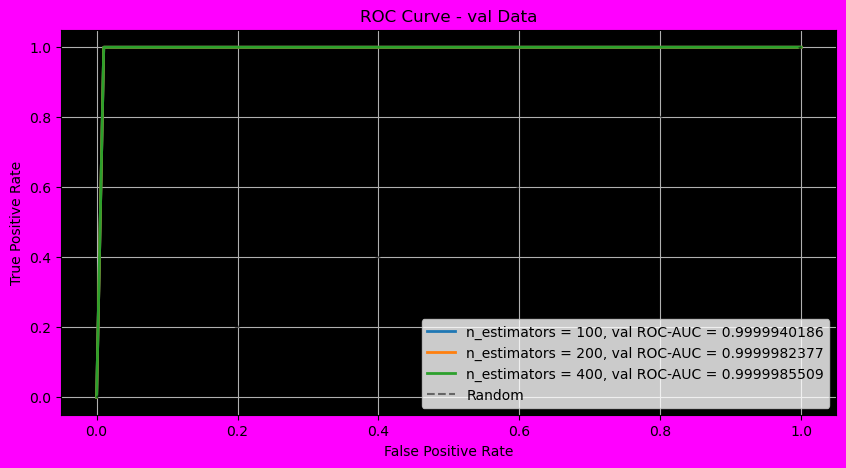

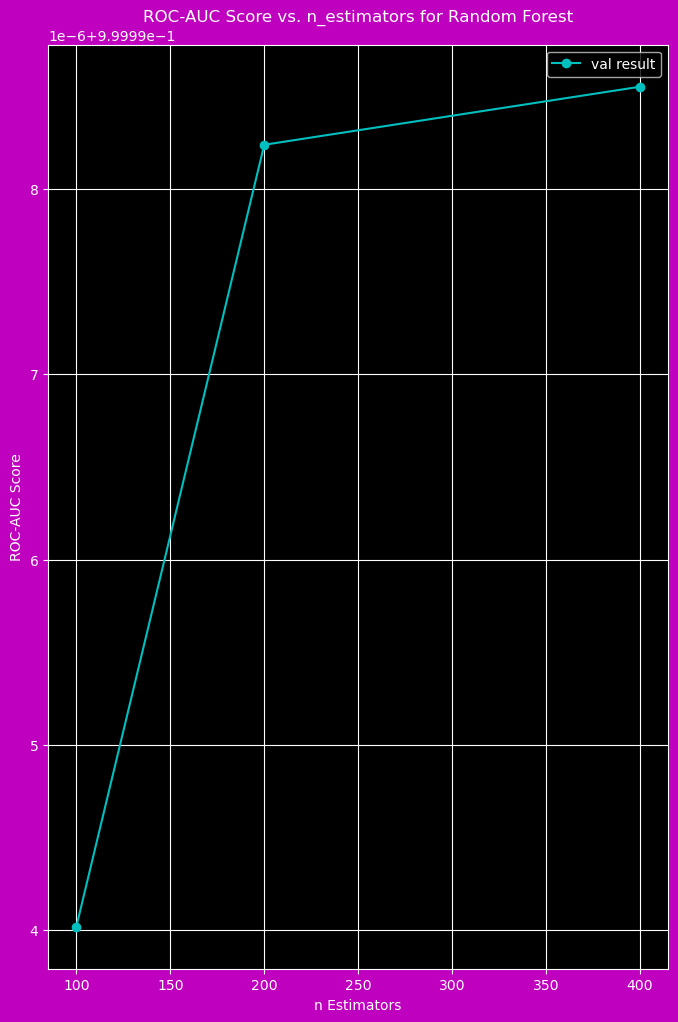





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of n Estimators: 
 [0.9999940186385201, 0.9999982376855633, 0.9999985509420938]
Best n Estimators: 400
Best Mean ROC-AUC score for val data: 0.9999985509420938
------------------------------------------------------------------------------------------------------------
=======================================Hyperparameter Tuning over:==========================================
------------------------------------------------------------------------------------------------------------




In [106]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
from sklearn.ensemble import RandomForestClassifier

print("============================================================================================================")

print("================================================Random Forest:==============================================")

# Define your values of n_estimators
n_values = [100, 200, 400]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for val data
mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='fuchsia')  # Set facecolor to black for dark background
ax2.set_facecolor('black')

# Loop through each value of n_estimators
for n in n_values:
    print("n_estimators =", n)
    cv_scores_val = []
    fprs_val = []
    tprs_val = []
        
    # Perform cross-validation
    for train_index, val_index in skf.split(X_smote_train_pt, y_smote_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_smote_train_pt[train_index], X_smote_train_pt[val_index]
        y_train_cv, y_val_cv = y_smote_train_pt.iloc[train_index], y_smote_train_pt.iloc[val_index]

        rf_classifier = RandomForestClassifier(n_estimators=n)
        rf_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = rf_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculate mean ROC-AUC scores for val data
    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of n_estimators
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='n_estimators = ' + str(n) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 10)))


print("=================================Random Forest Has Run Successfully:========================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plot ROC curve for random classifier
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs n_estimators
    plt.plot(n_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('n Estimators')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. n_estimators for Random Forest')
    # plt.xscale('log')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for val data for all values of n Estimators
print("Mean ROC-AUC scores for val data for all values of n Estimators: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
if 1 in np.unique(mean_roc_auc_scores_val):
    best_n_estimators = n_values[-1]
else:
    best_index = np.argmax(mean_roc_auc_scores_val)
    best_n_estimators = n_values[best_index]
    best_mean_roc_auc = mean_roc_auc_scores_val[best_index]


print("Best n Estimators:", best_n_estimators)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)


print("------------------------------------------------------------------------------------------------------------")
print("=======================================Hyperparameter Tuning over:==========================================")
print("------------------------------------------------------------------------------------------------------------")

print("\n")
print("============================================================================================================")

================================================Random Forest:==============================================
n_estimators = 10
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 19.500010013580322 seconds
Train: [     0      1      2 ... 454899 454900 454901] val: [ 75936  75937  75938 ... 379082 379083 379084]
Time elapsed: 17.585752725601196 seconds
Train: [     0      1      2 ... 379082 379083 379084] val: [151894 151895 151896 ... 454899 454900 454901]
Time elapsed: 18.217658519744873 seconds
ROC-AUC Score for val data = 0.9999681620722104
------------------------------------------------------------------------------------------------------------
n_estimators = 50
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 93.19793963432312 seconds
Train: [     0      1      2 ... 454899 454900 454901] val: [ 75936  75937  75938 ... 379082 379083 379

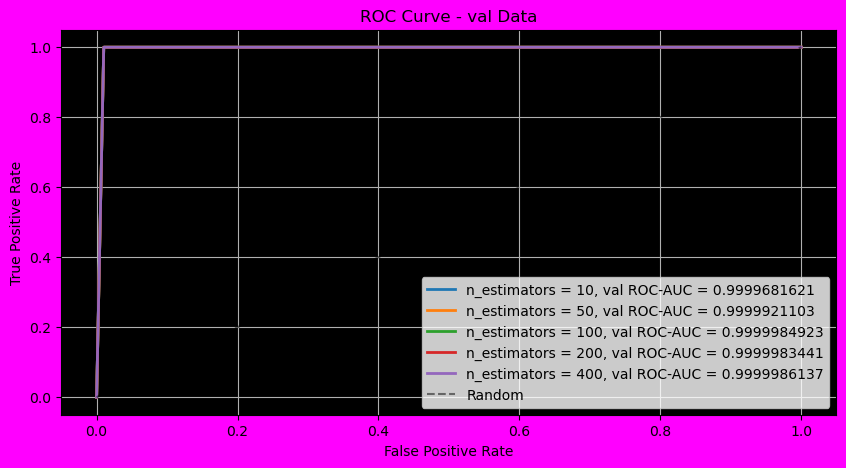

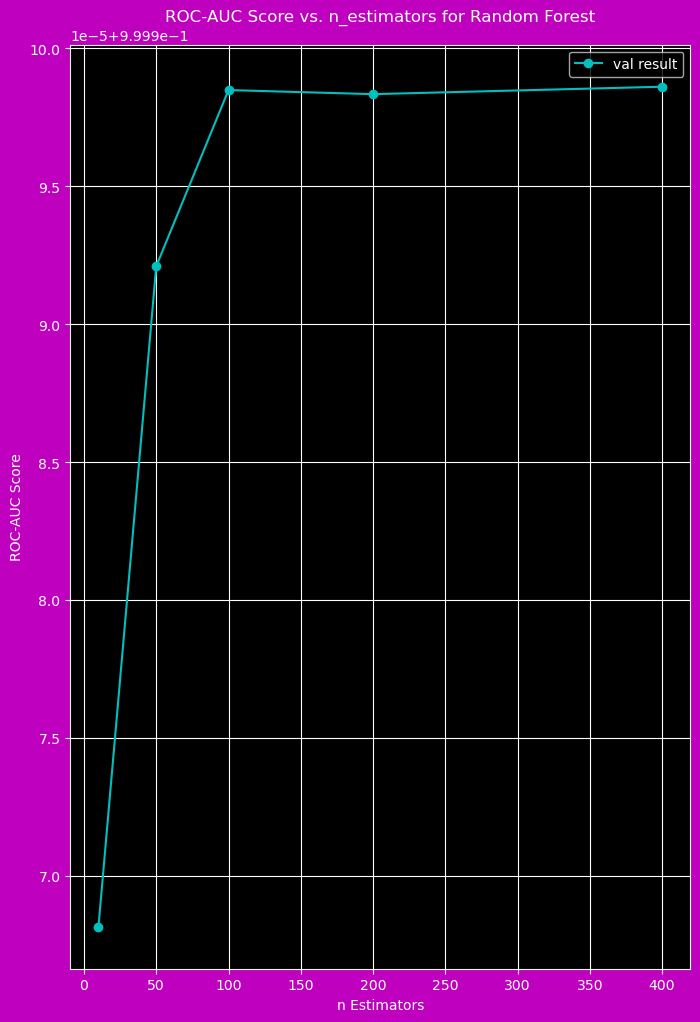





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of n Estimators: 
 [0.9999681620722104, 0.9999921102788091, 0.9999984923442181, 0.9999983441243566, 0.9999986137151766]
Best n Estimators: 400
Best Mean ROC-AUC score for val data: 0.9999986137151766
------------------------------------------------------------------------------------------------------------
=======================================Hyperparameter Tuning over:==========================================
------------------------------------------------------------------------------------------------------------




In [107]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
from sklearn.ensemble import RandomForestClassifier

print("============================================================================================================")

print("================================================Random Forest:==============================================")

# Define your values of n_estimators
n_values = [10, 50, 100, 200, 400]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for val data
mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='fuchsia')  # Set facecolor to black for dark background
ax2.set_facecolor('black')

# Loop through each value of n_estimators
for n in n_values:
    print("n_estimators =", n)
    cv_scores_val = []
    fprs_val = []
    tprs_val = []
        
    # Perform cross-validation
    for train_index, val_index in skf.split(X_smote_train_pt, y_smote_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_smote_train_pt[train_index], X_smote_train_pt[val_index]
        y_train_cv, y_val_cv = y_smote_train_pt.iloc[train_index], y_smote_train_pt.iloc[val_index]

        rf_classifier = RandomForestClassifier(n_estimators=n)
        rf_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = rf_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculate mean ROC-AUC scores for val data
    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of n_estimators
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='n_estimators = ' + str(n) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 10)))


print("=================================Random Forest Has Run Successfully:========================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plot ROC curve for random classifier
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs n_estimators
    plt.plot(n_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('n Estimators')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. n_estimators for Random Forest')
    # plt.xscale('log')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for val data for all values of n Estimators
print("Mean ROC-AUC scores for val data for all values of n Estimators: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
if 1 in np.unique(mean_roc_auc_scores_val):
    best_n_estimators = n_values[-1]
else:
    best_index = np.argmax(mean_roc_auc_scores_val)
    best_n_estimators = n_values[best_index]
    best_mean_roc_auc = mean_roc_auc_scores_val[best_index]


print("Best n Estimators:", best_n_estimators)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)


print("------------------------------------------------------------------------------------------------------------")
print("=======================================Hyperparameter Tuning over:==========================================")
print("------------------------------------------------------------------------------------------------------------")

print("\n")
print("============================================================================================================")

B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

# Define the parameters to be tuned
params = {
    "n_estimators": [500],
    "min_samples_split": [5, 7]
    }
# Define the Random Forest classifier
rf_classifier = RandomForestClassifier()

start_time = time.time()

# Create a GridSearchCV object with stratified cross-validation
start_time = time.time()
model_GridSearch = GridSearchCV(rf_classifier,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        return_train_score=True) 
 
# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_smote_train_pt, y_smote_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Time taken: 3032.68 seconds
Best ROC AUC score:  0.9999982590255122
Best hyperparameters:  {'min_samples_split': 5, 'n_estimators': 500}


In [109]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)


Mean test scores:
{'min_samples_split': 5, 'n_estimators': 500} 0.9999982590255122
{'min_samples_split': 7, 'n_estimators': 500} 0.9999977964763237

Rank of each hyperparameter combination:
1 {'min_samples_split': 5, 'n_estimators': 500}
2 {'min_samples_split': 7, 'n_estimators': 500}

Standard deviation of test scores:
{'min_samples_split': 5, 'n_estimators': 500} 1.0844684787403667e-06
{'min_samples_split': 7, 'n_estimators': 500} 1.386058456580007e-06


# 6. XGBoost

A. Finidng a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization

============================================XGBoost Classifier:=============================================
Learning Rate = 0.001
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 1.0823068618774414 seconds
Train: [     0      1      2 ... 454899 454900 454901] val: [ 75936  75937  75938 ... 379082 379083 379084]
Time elapsed: 1.108339548110962 seconds
Train: [     0      1      2 ... 379082 379083 379084] val: [151894 151895 151896 ... 454899 454900 454901]
Time elapsed: 1.0332610607147217 seconds
ROC-AUC Score for val data = 0.9837994918694583
Mean precision val score: 0.9819022091638513
Mean recall val score: 0.8929923368110054
Mean f1 val score: 0.9353384607979223
------------------------------------------------------------------------------------------------------------
Learning Rate = 0.01
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed

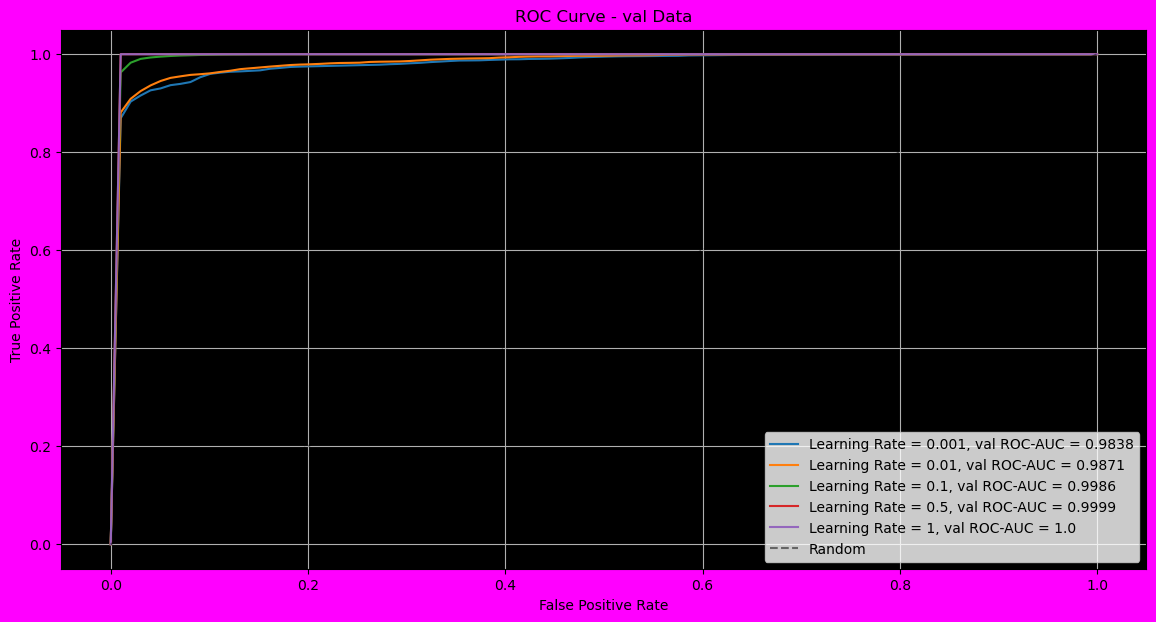

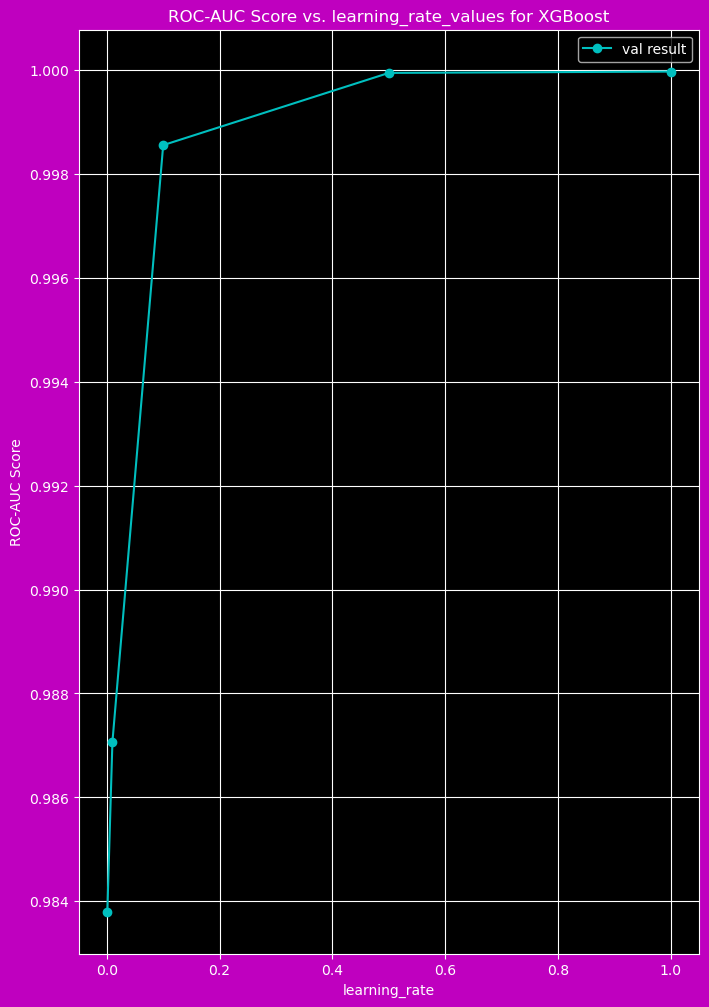





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of Learning Rate: 
 [0.9837994918694583, 0.9870648334939274, 0.9985566358297082, 0.9999472945597635, 0.9999728440163757]
Best Learning Rate : 1
Best Mean ROC-AUC score for val data: 0.9999728440163757
Mean precision val score for best Learning Rate: 0.9987047103283059
Mean recall val score for best Learning Rate: 0.9999780172432744
Mean f1 val score for best Learning Rate: 0.9993409464772158




In [110]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
import xgboost as xgb

print("============================================================================================================")

print("============================================XGBoost Classifier:=============================================")


# Define your values of C
learning_rate_values = [0.001, 0.01, 0.1, 0.5, 1]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for val data
mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Set facecolor to black for dark background
# Set background color for subplots
ax2.set_facecolor('black')

# Loop through each value of C
for learning_rate in learning_rate_values:
    print("Learning Rate =", learning_rate)
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Perform cross-validation
    for train_index, val_index in skf.split(X_smote_train_pt, y_smote_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_smote_train_pt[train_index], X_smote_train_pt[val_index]
        y_train_cv, y_val_cv = y_smote_train_pt.iloc[train_index], y_smote_train_pt.iloc[val_index]


        xgb_classifier = xgb.XGBClassifier(learning_rate = learning_rate, n_estimators=100, max_depth=3, gamma=0, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', reg_alpha=0.005, reg_lambda=1, random_state=42)
        xgb_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = xgb_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)

        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")
        
    # Calculate mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of C
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='Learning Rate = ' + str(learning_rate) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("=====================================XGBoost Has Run Successfully:==========================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plot ROC curve for random classifier
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Set labels and title for ROC curves
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(learning_rate_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('learning_rate')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. learning_rate_values for XGBoost')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for val data for all values of learning_rate_values
print("Mean ROC-AUC scores for val data for all values of Learning Rate: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_learning_rate = learning_rate_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best Learning Rate :", best_learning_rate)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("Mean precision val score for best Learning Rate:", mean_precision_scores_val[best_index])
print("Mean recall val score for best Learning Rate:", mean_recall_scores_val[best_index])
print("Mean f1 val score for best Learning Rate:", mean_f1_scores_val[best_index])


print("============================================================================================================")
print("\n")
print("============================================================================================================")

B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score

In [111]:
import time
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold

params = {
    'learning_rate': [0.8, 1, 1.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 0.9],
}

# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc') # As the number of classes are 2

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(xgb_classifier, 
                        param_grid=params, 
                        scoring='roc_auc', 
                        cv=skf, 
                        n_jobs=-1, 
                        verbose=1, 
                        return_train_score=True)

# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_smote_train_pt, y_smote_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# print the evaluation result by choosing an evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Time taken: 69.88 seconds
Best ROC AUC score:  0.9999914833018363
Best hyperparameters:  {'learning_rate': 0.8, 'max_depth': 7, 'subsample': 0.9}


In [112]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'learning_rate': 0.8, 'max_depth': 3, 'subsample': 0.5} 0.9999688637679984
{'learning_rate': 0.8, 'max_depth': 3, 'subsample': 0.7} 0.999974902857519
{'learning_rate': 0.8, 'max_depth': 3, 'subsample': 0.9} 0.9999728295481224
{'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.5} 0.9999900116862124
{'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.7} 0.9999896096485363
{'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.9} 0.9999867106628887
{'learning_rate': 0.8, 'max_depth': 7, 'subsample': 0.5} 0.9999854739316737
{'learning_rate': 0.8, 'max_depth': 7, 'subsample': 0.7} 0.9999839879637743
{'learning_rate': 0.8, 'max_depth': 7, 'subsample': 0.9} 0.9999914833018363
{'learning_rate': 1, 'max_depth': 3, 'subsample': 0.5} 0.9999677736039585
{'learning_rate': 1, 'max_depth': 3, 'subsample': 0.7} 0.9999762254704301
{'learning_rate': 1, 'max_depth': 3, 'subsample': 0.9} 0.9999709122581066
{'learning_rate': 1, 'max_depth': 5, 'subsample': 0.5} 0.9999869146391652
{'l

# Observation

Proceed with the model which shows the best result

Apply the best hyperparameter on the model
Predict on the test dataset

In [113]:
X_test_saved.head()

V1        V2        V3        V4        V5        V6        V7  \
263020 -0.674466  1.408105 -1.110622 -1.328366  1.388996 -1.308439  1.885879   
11378  -2.829816 -2.765149  2.537793 -1.074580  2.842559 -2.153536 -1.795519   
147283 -3.576495  2.318422  1.306985  3.263665  1.127818  2.865246  1.444125   
219439  2.060386 -0.015382 -1.082544  0.386019 -0.024331 -1.074935  0.207792   
36939   1.209965  1.384303 -1.343531  1.763636  0.662351 -2.113384  0.854039   

              V8        V9       V10  ...       V20       V21       V22  \
263020 -0.614233  0.311652  0.650757  ...  0.394322  0.080084  0.810034   
11378  -0.250020  3.073504 -1.000418  ... -0.515765 -0.295555  0.109305   
147283 -0.718922  1.874046  7.398491  ...  2.034786 -1.060151  0.016867   
219439 -0.338140  0.455091  0.047859  ... -0.192024 -0.281684 -0.639426   
36939  -0.475963 -0.629658 -1.579654  ...  0.009083 -0.164015 -0.328294   

             V23       V24       V25       V26       V27       V28    Amount  
263020 -0.224327  0.707899 -0.135837  0.045102  0.533837  0.291319  0.014079  
11378  -0.813272  0.042996 -0.027660 -0.910247  0.110802 -0.511938 -0.142897  
147283 -0.132058 -1.483996 -0.296011  0.062823  0.552411  0.509764  0.761228  
219439  0.331818 -0.067584 -0.283675  0.203529 -0.063621 -0.060077 -0.295791  
36939  -0.154631  0.619449  0.818998 -0.330525  0.046884  0.104527 -0.288610  

[5 rows x 29 columns]

In [114]:
y_test_saved.head()

263020    0
11378     0
147283    0
219439    0
36939     0
Name: Class, dtype: int64

In [115]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field
scaler = RobustScaler()

# Transforming the test data
X_test_saved[["Amount"]] = scaler.fit_transform(X_test_saved[["Amount"]])

In [116]:
X_test_saved.head()

V1        V2        V3        V4        V5        V6        V7  \
263020 -0.674466  1.408105 -1.110622 -1.328366  1.388996 -1.308439  1.885879   
11378  -2.829816 -2.765149  2.537793 -1.074580  2.842559 -2.153536 -1.795519   
147283 -3.576495  2.318422  1.306985  3.263665  1.127818  2.865246  1.444125   
219439  2.060386 -0.015382 -1.082544  0.386019 -0.024331 -1.074935  0.207792   
36939   1.209965  1.384303 -1.343531  1.763636  0.662351 -2.113384  0.854039   

              V8        V9       V10  ...       V20       V21       V22  \
263020 -0.614233  0.311652  0.650757  ...  0.394322  0.080084  0.810034   
11378  -0.250020  3.073504 -1.000418  ... -0.515765 -0.295555  0.109305   
147283 -0.718922  1.874046  7.398491  ...  2.034786 -1.060151  0.016867   
219439 -0.338140  0.455091  0.047859  ... -0.192024 -0.281684 -0.639426   
36939  -0.475963 -0.629658 -1.579654  ...  0.009083 -0.164015 -0.328294   

             V23       V24       V25       V26       V27       V28    Amount  
263020 -0.224327  0.707899 -0.135837  0.045102  0.533837  0.291319  0.014079  
11378  -0.813272  0.042996 -0.027660 -0.910247  0.110802 -0.511938 -0.142897  
147283 -0.132058 -1.483996 -0.296011  0.062823  0.552411  0.509764  0.761228  
219439  0.331818 -0.067584 -0.283675  0.203529 -0.063621 -0.060077 -0.295791  
36939  -0.154631  0.619449  0.818998 -0.330525  0.046884  0.104527 -0.288610  

[5 rows x 29 columns]

In [117]:
# Define the RandomOverSampler
smote = over_sampling.SMOTE(random_state=0)

# Resample the training data using RandomOverSampler
X_test_saved_smote, y_test_saved_smote = smote.fit_resample(X_test_saved,y_test_saved)

In [118]:

# initialise the model with optimum hyperparameters
start_time = time.time()
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=1, min_samples_split=2)   
clf.fit(X_smote_train_pt, y_smote_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_smote)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:, 1])
print("Decision Tree Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_smote)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_smote, y_pred)
preci_sion = precision_score(y_test_saved_smote, y_pred)
re_call = recall_score(y_test_saved_smote, y_pred)
# print the results
print("Decision Tree Classifier F1-Score on Test Set =", f1)
print("Decision Tree Classifier Precision on Test Set =", preci_sion)
print("Decision Tree Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

print("============================================================================================================")

Decision Tree Classifier ROC-AUC Score on Test Set = 0.9484931498819542
Decision Tree Classifier F1-Score on Test Set = 0.9285663540778629
Decision Tree Classifier Precision on Test Set = 0.9378946613088404
Decision Tree Classifier Recall on Test Set = 0.9194217782779966
Time taken: 7.16 seconds


In [119]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = XGBClassifier(learning_rate=0.8, max_depth=5, subsample=0.9, objective='binary:logistic', eval_metric='auc') 
clf.fit(X_smote_train_pt, y_smote_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_smote)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:, 1])
print("XGBOOST Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_smote)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_smote, y_pred)
preci_sion = precision_score(y_test_saved_smote, y_pred)
re_call = recall_score(y_test_saved_smote, y_pred)
# print the results
print("XGBOOST Classifier F1-Score on Test Set =", f1)
print("XGBOOST Classifier Precision on Test Set =", preci_sion)
print("XGBOOST Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

XGBOOST Classifier ROC-AUC Score on Test Set = 0.9860918146321493
XGBOOST Classifier F1-Score on Test Set = 0.9299305601232817
XGBOOST Classifier Precision on Test Set = 0.9984664743033556
XGBOOST Classifier Recall on Test Set = 0.8701990714687676
Time taken: 1.66 seconds


In [120]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = RandomForestClassifier(min_samples_split=5, n_estimators=500)  
clf.fit(X_smote_train_pt, y_smote_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_smote)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:, 1])
print("Random Forest Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_smote)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_smote, y_pred)
preci_sion = precision_score(y_test_saved_smote, y_pred)
re_call = recall_score(y_test_saved_smote, y_pred)
# print the results
print("Random Forest Classifier F1-Score on Test Set =", f1)
print("Random Forest Classifier Precision on Test Set =", preci_sion)
print("Random Forest Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

print("============================================================================================================")

Random Forest Classifier ROC-AUC Score on Test Set = 0.9797917584470912
Random Forest Classifier F1-Score on Test Set = 0.8573208096840624
Random Forest Classifier Precision on Test Set = 0.9997657037089103
Random Forest Classifier Recall on Test Set = 0.7504044738323016
Time taken: 1722.42 seconds


B. TEST SET - Metrics & Scores using best model and hyperparameters on Test Set

Print the important features of the best model to understand the dataset¶
This will not give much explanation on the already transformed dataset
But it will help us in understanding if the dataset is not PCA transformed

Top var = 14
2nd Top var = 10
3rd Top var = 12


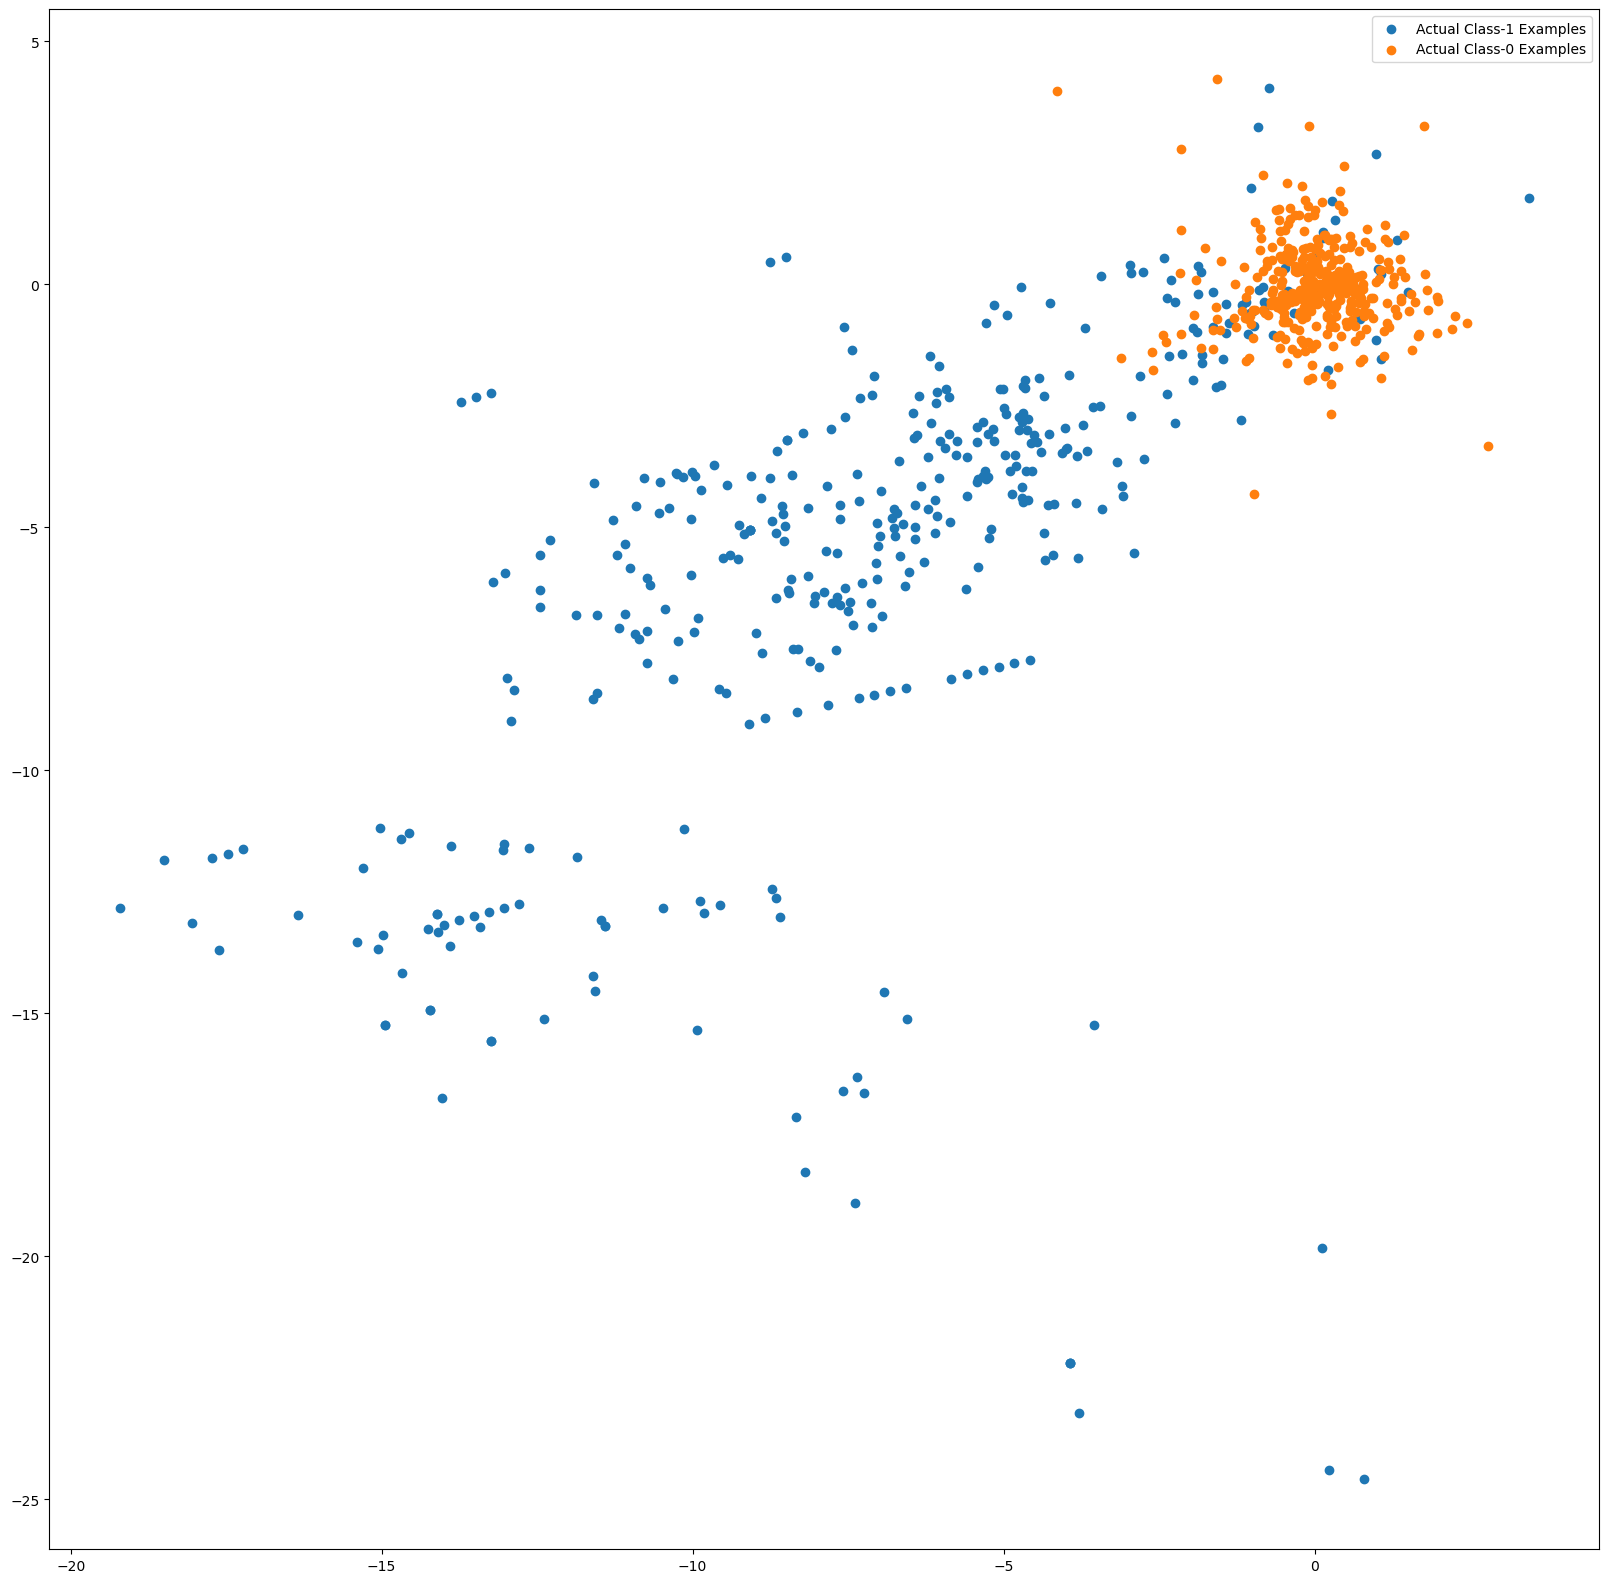

In [121]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
